# Install packages

In [3]:
import tensorflow as tf

In [10]:
from sklearn.cluster import KMeans

In [12]:
import pandas as pd

In [13]:
import numpy as np

# Plot distribution of USA universities CitationCounts

In [1112]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane"

C:\Users\jchen148\THE Rankings\Report to Jane


In [1113]:
citation = pd.read_csv('Updated_THE_Ranked_Universites_CitationCounts_2014_2018.csv')

citation.head()

,Country,CountryCode,Uid,UniversityName,metric,Citation2014,Citation2015,Citation2016,Citation2017,Citation2018
0,United States,USA,508076,Harvard University,CitationCount,837994.0,686576.0,529054.0,363995.0,172830.0
1,United States,USA,508219,Stanford University,CitationCount,404346.0,363567.0,282005.0,194136.0,95069.0
2,Canada,CAN,501048,University of Toronto,CitationCount,360177.0,344355.0,254462.0,172125.0,86219.0
3,United States,USA,508094,Johns Hopkins University,CitationCount,324631.0,289131.0,218379.0,147459.0,77682.0
4,United Kingdom,GBR,315091,University of Oxford,CitationCount,355751.0,313129.0,238271.0,149907.0,75747.0


In [1114]:
totalcitation=citation['Citation2014']+citation['Citation2015']+citation['Citation2016']+citation['Citation2017']+citation['Citation2018']

In [1115]:
citation['Total']=totalcitation

In [1116]:
citation.head()

citation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 11 columns):
Country           1002 non-null object
CountryCode       1002 non-null object
Uid               1002 non-null int64
UniversityName    1002 non-null object
metric            1002 non-null object
Citation2014      998 non-null float64
Citation2015      995 non-null float64
Citation2016      998 non-null float64
Citation2017      1000 non-null float64
Citation2018      1001 non-null float64
Total             993 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.2+ KB


In [1119]:
changedtype=lambda x: int(x)

In [31]:
#citation.fillna(0)

for i in range(0,len(citation)):
    if citation.loc[i]['Citation2014'] is np.nan:
        print("yes")

In [1117]:
citation['Citation2014'].isnull()

citation=citation.fillna(0)

# change all citationcount to int64

In [1120]:
citation['Citation2018']=citation['Citation2018'].apply(changedtype)

In [1121]:
citation['Citation2017']=citation['Citation2017'].apply(changedtype)

In [1122]:
citation['Citation2016']=citation['Citation2016'].apply(changedtype)

In [1123]:
citation['Citation2015']=citation['Citation2015'].apply(changedtype)

In [1124]:
citation['Citation2014']=citation['Citation2014'].apply(changedtype)

In [1125]:
citation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 11 columns):
Country           1002 non-null object
CountryCode       1002 non-null object
Uid               1002 non-null int64
UniversityName    1002 non-null object
metric            1002 non-null object
Citation2014      1002 non-null int64
Citation2015      1002 non-null int64
Citation2016      1002 non-null int64
Citation2017      1002 non-null int64
Citation2018      1002 non-null int64
Total             1002 non-null float64
dtypes: float64(1), int64(6), object(4)
memory usage: 86.2+ KB


In [1126]:
citation.head()

,Country,CountryCode,Uid,UniversityName,metric,Citation2014,Citation2015,Citation2016,Citation2017,Citation2018,Total
0,United States,USA,508076,Harvard University,CitationCount,837994,686576,529054,363995,172830,2590449.0
1,United States,USA,508219,Stanford University,CitationCount,404346,363567,282005,194136,95069,1339123.0
2,Canada,CAN,501048,University of Toronto,CitationCount,360177,344355,254462,172125,86219,1217338.0
3,United States,USA,508094,Johns Hopkins University,CitationCount,324631,289131,218379,147459,77682,1057282.0
4,United Kingdom,GBR,315091,University of Oxford,CitationCount,355751,313129,238271,149907,75747,1132805.0


In [1127]:
new=citation.sort_values(['CountryCode','Total'], ascending=False)
new.head()

,Country,CountryCode,Uid,UniversityName,metric,Citation2014,Citation2015,Citation2016,Citation2017,Citation2018,Total
334,South Africa,ZAF,115007,University of Pretoria,CitationCount,20169,20294,18564,12800,5918,77745.0
307,South Africa,ZAF,115005,University of Johannesburg,CitationCount,13732,17059,16450,12228,6622,66091.0
369,South Africa,ZAF,115001,North West University,CitationCount,9833,8025,14378,13220,5225,50681.0
575,South Africa,ZAF,115010,University of the Western Cape,CitationCount,9538,8008,7081,5315,2365,32307.0
586,South Africa,ZAF,115003,Tshwane University of Technology,CitationCount,3215,2665,2844,3173,2271,14168.0


# Filtered the universities in USA

In [1128]:
USdata=new[new['CountryCode']=='USA']

In [1129]:
USdata.head()

,Country,CountryCode,Uid,UniversityName,metric,Citation2014,Citation2015,Citation2016,Citation2017,Citation2018,Total
0,United States,USA,508076,Harvard University,CitationCount,837994,686576,529054,363995,172830,2590449.0
1,United States,USA,508219,Stanford University,CitationCount,404346,363567,282005,194136,95069,1339123.0
3,United States,USA,508094,Johns Hopkins University,CitationCount,324631,289131,218379,147459,77682,1057282.0
6,United States,USA,508358,University of Washington,CitationCount,314702,269985,218378,150820,70792,1024677.0
11,United States,USA,508111,Massachusetts Institute of Technology,CitationCount,285399,241655,186864,121031,57319,892268.0


# Use seaborn

In [1130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [1131]:
sns.set(color_codes=True)

In [1132]:
USpartial=USdata.loc[:][['UniversityName','Total']]

In [1133]:
USpartial.head()

USpartial2=USpartial.reset_index()

USpartial2=USpartial2.iloc[:,1:]

USpartial2.head()

,UniversityName,Total
0,Harvard University,2590449.0
1,Stanford University,1339123.0
2,Johns Hopkins University,1057282.0
3,University of Washington,1024677.0
4,Massachusetts Institute of Technology,892268.0


In [1134]:
target=USpartial2[USpartial2['UniversityName']=='University of Rochester']

target.head()

,UniversityName,Total
28,University of Rochester,254555.0


# Change datatype to int64

In [1135]:
target.loc[:]['Total']=target['Total'].astype(int)

In [1136]:
target.head()

,UniversityName,Total
28,University of Rochester,254555.0


In [1137]:
USpartial2.head()

USpartial2.set_index('UniversityName')

USpartial2.loc[:]['Total']=USpartial2['Total'].astype(int)


In [1138]:
USpartial2=USpartial2.set_index('UniversityName')

In [1139]:
USpartial2.head()

,Total
UniversityName,
Harvard University,2590449.0
Stanford University,1339123.0
Johns Hopkins University,1057282.0
University of Washington,1024677.0
Massachusetts Institute of Technology,892268.0


In [1140]:
target.head()

target.set_index('UniversityName')


,Total
UniversityName,
University of Rochester,254555.0


In [1141]:
target=target.set_index('UniversityName')

In [1142]:
target.head()

,Total
UniversityName,
University of Rochester,254555.0


In [1143]:
len(USpartial2)

153

# THE has 163 USA Universities ranking in top 300.
# Below is the distribution plot of the total CitationCount
# from 2014 to 2018.
# And we can see where UofR lies.

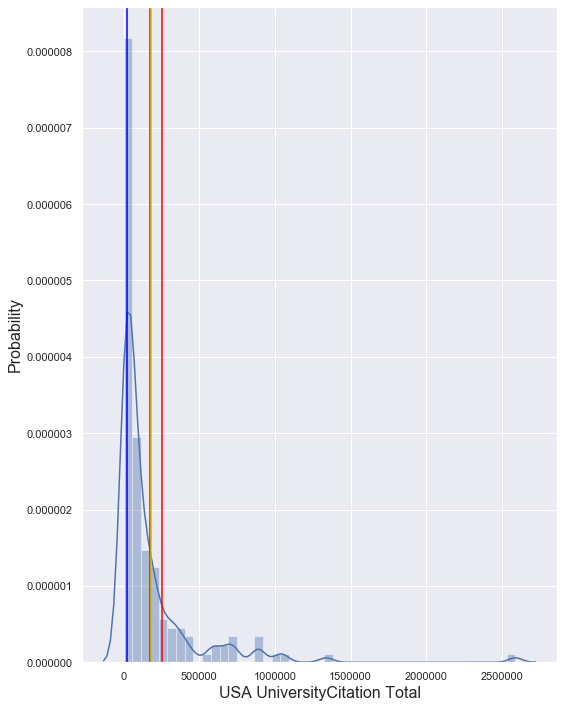

In [1144]:
import pandas as pd
fig, ax = plt.subplots(figsize=(8,10))
x = pd.Series(USpartial2['Total'], name="CitationCount Total")
ax = sns.distplot(x)

ax.set_xlabel("USA UniversityCitation Total",fontsize=16)
ax.set_ylabel("Probability",fontsize=16)
plt.axvline(254555, color='red') # this is where U of R
plt.axvline(np.mean(USpartial2['Total']), color='green') # this is the mean, 175882.56
plt.axvline(np.percentile(USpartial2['Total'], 25.0), color='blue') # Q1
plt.axvline(np.percentile(USpartial2['Total'], 75.0), color='orange') # Q3 
#plt.legend()
plt.tight_layout()

# We can see it is a highly right-skewed distribution,
# and the mean, which is the green line, and Q3,
# which is the orange line are very close.
# UofR has the CitationCounts much above Q3.

In [147]:
import matplotlib
from matplotlib import mlab
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [152]:
np.percentile(USpartial2['Total'], np.array([25.0,75.0]))

array([ 24316., 180027.])

In [122]:
target

,Total
UniversityName,
University of Rochester,254555


In [136]:
np.round(np.mean(USpartial2['Total']), 2)

175882.56

# The following are data cleaning process,
# and how to use Python Requests to retrieve
# data from Scopus and SciVal REST APIs

In [ ]:
school_list = open(r"C:\Users\jchen148\THE Rankings\Report to Jane\THE_School_List_OK.txt")

school_name=school_list.read()

In [ ]:
import pandas as pd
t = school_name

data=[]

for i in t.split("\n"):
    if i[:1].isdigit():
        data.append(" ".join(i.split(" ")[:20]))
        print(" ".join(i.split(" ")[:20]))
        
data_want = pd.DataFrame(data, columns=['Scool Name'])


data_want.to_csv("all_university_name.csv", index=False)  # all the university name

In [ ]:
# cleaned all the ranks and leadning and trailing whitespace

t = school_name

uni_name = []

for i in t.split("\n"):
    if i[:1].isdigit():
        uni_name.append(" ".join(i.split(" ")[-5:]))
        print(" ".join(i.split(" ")[-5:]))
        uni_name.append(" ".join(i.split(" ")[-5:]))

In [ ]:
# remove trailing whitespace

import re
import string

cleaned=[]

for line in uni_name:
    line=str(line)
#    print(line.strip(' \t\n\r'))
#    print(line.rstrip(string.digits))
#    print(re.sub('^\d+[\W_]+', '', line))
    want_data = re.sub('^\d+[\W_]+', '', line)
    print(want_data.strip())
    cleaned.append(want_data.strip())

In [ ]:
# remove existing numbers

import string
import re

want_3=[]

for name in cleaned:
    print(name)
    print(re.sub('^\d+[\W_]+','',name))
    want_3.append(re.sub('^\d+[\W_]+','',name))

In [11]:
want_3.append('University of Rochester')

In [15]:
DF={}

DF=pd.DataFrame({'UniName':want_3})

In [17]:
DF=DF.drop_duplicates()

In [19]:
DF=DF.reset_index()

In [21]:
DF=DF.iloc[:,1]

In [25]:
DF=pd.DataFrame(DF)

In [26]:
DF.to_csv("UniNameList_OK.csv", index=False)

# Use APIs

In [ ]:
for line in want_3:
    url= "https://api.elsevier.com/metrics/institution/search?query=name("+line+")"
#    print(url)

# Combine all the Uids to retrieve data from APIs

In [11]:
import requests
import json

In [14]:
# add "Emory University" country code and university id

UniversityName=[]
Universityid=[]
Country=[]
CountryCode=[]

url='https://api.elsevier.com/analytics/scival/institution/search?query=name(Emory%20University)&limit=100&offset=0'

resp = requests.get(url, headers={'Accept':'application/json',
                             'X-ELS-APIKey': "d3794058e2b24417b5dfd0ef8990e2dc"})
parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    with open("THE_UNI_ID_METRIC_ALL.json", 'w') as jsonfile:
#        json.dump(resp.json(), jsonfile)
#    print(parsed)
#    data.update(a_dict)
result=json.loads(parsed)
UniversityName.append(result['results'][0]['name'])
Universityid.append(result['results'][0]['id'])
Country.append(result['results'][0]['country'])
CountryCode.append(result['results'][0]['countryCode'])

ELmory=pd.DataFrame({'University Name':UniversityName, 'University id':Universityid, 'Country': Country,
                    'Country Code': CountryCode})

In [34]:
filename='THE_CountryCode_Result_1202_{}'

for i in range(1,14):
    print(filename.format(i))

THE_CountryCode_Result_1202_1
THE_CountryCode_Result_1202_2
THE_CountryCode_Result_1202_3
THE_CountryCode_Result_1202_4
THE_CountryCode_Result_1202_5
THE_CountryCode_Result_1202_6
THE_CountryCode_Result_1202_7
THE_CountryCode_Result_1202_8
THE_CountryCode_Result_1202_9
THE_CountryCode_Result_1202_10
THE_CountryCode_Result_1202_11
THE_CountryCode_Result_1202_12
THE_CountryCode_Result_1202_13


In [47]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane"

C:\Users\jchen148\THE Rankings\Report to Jane


In [48]:
filename='THE_CountryCode_Result_1202_{}.csv'

chucks=[]

for i in range(1,14):
#    print(filename.format(i))
    chucks.append(pd.read_csv(filename.format(i)))

data=pd.concat(chucks, ignore_index=True)
    
data.head()


,Unnamed: 0,University Name,University id,Country,Country Code
0,0,University of Oxford,315091,United Kingdom,GBR
1,1,"Jet Propulsion Laboratory, California Institut...",508092,United States,USA
2,2,California Institute of Technology,508021,United States,USA
3,3,University of Cambridge,315068,United Kingdom,GBR
4,4,Stanford University,508219,United States,USA


In [49]:
len(data)

1272

In [50]:
del data['Unnamed: 0']

In [26]:
ELmory

,University Name,University id,Country,Country Code
0,Emory University,508059,United States,USA


In [51]:
data=pd.concat([data, ELmory]).drop_duplicates()

In [52]:
data.head()


,University Name,University id,Country,Country Code
0,University of Oxford,315091,United Kingdom,GBR
1,"Jet Propulsion Laboratory, California Institut...",508092,United States,USA
2,California Institute of Technology,508021,United States,USA
3,University of Cambridge,315068,United Kingdom,GBR
4,Stanford University,508219,United States,USA


In [31]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\Input Data"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\Input Data


In [32]:
data.to_csv("THE_Universities_SciVal_Uids_1008.csv", index=False)

# Use SciVal institution metrics API

In [42]:
# https://api.elsevier.com/analytics/scival/institution/metrics

In [53]:
data.tail()

,University Name,University id,Country,Country Code
1268,Imam Abdulrahman Bin Faisal University,703099,Saudi Arabia,SAU
1269,Istanbul Medipol University,705124,Turkey,TUR
1270,Ivane Javakhishvili Tbilisi State University,204001,Georgia,GEO
1271,University of Rochester,508335,United States,USA
0,Emory University,508059,United States,USA


In [54]:
data.reset_index(inplace=True)

In [57]:
data=data.iloc[:,1:]

In [58]:
data.tail()

,University Name,University id,Country,Country Code
1003,Imam Abdulrahman Bin Faisal University,703099,Saudi Arabia,SAU
1004,Istanbul Medipol University,705124,Turkey,TUR
1005,Ivane Javakhishvili Tbilisi State University,204001,Georgia,GEO
1006,University of Rochester,508335,United States,USA
1007,Emory University,508059,United States,USA


In [64]:
for line in data['University id'][:2]:
    print(line)

315091
508092


# ScholarlyOutput

In [59]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ScholarlyOutput"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ScholarlyOutput


In [60]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(2)

inst_country=[]
inst_cc=[]
inst_id=[]
inst_link=[]
inst_name=[]
metricType=[]
value2014=[]
value2015=[]
value2016=[]
value2017=[]
value2018=[]


for line in data['University id'][1000:]:
    url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=CitationCount&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'
 #   print(url.format(line))
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "d3794058e2b24417b5dfd0ef8990e2dc"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    with open("THE_UNI_ID_METRIC_ALL.json", 'w') as jsonfile:
#        json.dump(resp.json(), jsonfile)
#    print(parsed)
#    data.update(a_dict)
    result=json.loads(parsed)
    if result['results'] is not None:
        if len(result['results'])>=1:
            if 'institution' in result['results'][0]:
#                if 'country' in result['results'][0]['institution']:
                inst_country.append(result['results'][0]['institution']['country'])
#            if 'countryCode' in result['results'][0]['institution']:
                inst_cc.append(result['results'][0]['institution']['countryCode'])
#            if 'id' in result['results'][0]['institution']:
                inst_id.append(result['results'][0]['institution']['id'])
#            if 'link' in result['results'][0]['institution']:
                inst_link.append(result['results'][0]['institution']['link'])
#            if 'name' in result['results'][0]['institution']:
                inst_name.append(result['results'][0]['institution']['name'])
            if 'metrics' in result['results'][0]:
#            if len(result['results'][0]['metrics'])>=1:
                if 'metricType' in result['results'][0]['metrics'][0]:
                    metricType.append(result['results'][0]['metrics'][0]['metricType'])
                if 'valueByYear' in result['results'][0]['metrics'][0]:
                    if '2014' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2014.append(result['results'][0]['metrics'][0]['valueByYear']['2014'])
                    if '2015' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2015.append(result['results'][0]['metrics'][0]['valueByYear']['2015'])
                    if '2016' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2016.append(result['results'][0]['metrics'][0]['valueByYear']['2016'])
                    if '2017' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2017.append(result['results'][0]['metrics'][0]['valueByYear']['2017'])
                    if '2018' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2018.append(result['results'][0]['metrics'][0]['valueByYear']['2018'])

s1=pd.Series(inst_country, name='country')
s2=pd.Series(inst_cc, name='countryCode')
s3=pd.Series(inst_id, name='institution_id')
s4=pd.Series(inst_link, name='link')
s5=pd.Series(inst_name, name='institution_name')
s6=pd.Series(metricType, name='metricType')
s7=pd.Series(value2014, name='2014')
s8=pd.Series(value2015, name='2015')
s9=pd.Series(value2016, name='2016')
s10=pd.Series(value2017, name='2017')
s11=pd.Series(value2018, name='2018')


DF=pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11], axis=1)
DF.to_csv("THE_UNI_CitationCount_ALL_12.csv", index=False)

# CitationCount, CitedPublications, FWCI, and PublicationinTopJournal Percentile

In [122]:
# FWCI

In [61]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\FNCI"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\FNCI


In [63]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(2)

inst_country=[]
inst_cc=[]
inst_id=[]
inst_link=[]
inst_name=[]
metricType=[]
value2014=[]
value2015=[]
value2016=[]
value2017=[]
value2018=[]
percentage2014=[]
percentage2015=[]
percentage2016=[]
percentage2017=[]
percentage2018=[]


for line in data['University id'][1000:]:
    url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=FieldWeightedCitationImpact&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'
 #   print(url.format(line))
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "d3794058e2b24417b5dfd0ef8990e2dc"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    with open("THE_UNI_ID_METRIC_ALL.json", 'w') as jsonfile:
#        json.dump(resp.json(), jsonfile)
#    print(parsed)
#    data.update(a_dict)
    result=json.loads(parsed)
    if result['results'] is not None:
        if len(result['results'])>=1:
            if 'institution' in result['results'][0]:
#                if 'country' in result['results'][0]['institution']:
                inst_country.append(result['results'][0]['institution']['country'])
#            if 'countryCode' in result['results'][0]['institution']:
                inst_cc.append(result['results'][0]['institution']['countryCode'])
#            if 'id' in result['results'][0]['institution']:
                inst_id.append(result['results'][0]['institution']['id'])
#            if 'link' in result['results'][0]['institution']:
                inst_link.append(result['results'][0]['institution']['link'])
#            if 'name' in result['results'][0]['institution']:
                inst_name.append(result['results'][0]['institution']['name'])
            if 'metrics' in result['results'][0]:
#            if len(result['results'][0]['metrics'])>=1:
                if 'metricType' in result['results'][0]['metrics'][0]:
                    metricType.append(result['results'][0]['metrics'][0]['metricType'])
                if 'valueByYear' in result['results'][0]['metrics'][0]:
                    if '2014' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2014.append(result['results'][0]['metrics'][0]['valueByYear']['2014'])
                    if '2015' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2015.append(result['results'][0]['metrics'][0]['valueByYear']['2015'])
                    if '2016' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2016.append(result['results'][0]['metrics'][0]['valueByYear']['2016'])
                    if '2017' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2017.append(result['results'][0]['metrics'][0]['valueByYear']['2017'])
                    if '2018' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2018.append(result['results'][0]['metrics'][0]['valueByYear']['2018'])
                if 'percentageByYear' in result['results'][0]['metrics'][0]:
                    if '2014' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2014.append(result['results'][0]['metrics'][0]['percentageByYear']['2014'])
                    if '2015' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2015.append(result['results'][0]['metrics'][0]['percentageByYear']['2015'])
                    if '2016' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2016.append(result['results'][0]['metrics'][0]['percentageByYear']['2016'])
                    if '2017' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2017.append(result['results'][0]['metrics'][0]['percentageByYear']['2017'])
                    if '2018' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2018.append(result['results'][0]['metrics'][0]['percentageByYear']['2018'])
                else:
                    percentage2014.append('')
                    percentage2015.append('')
                    percentage2016.append('')
                    percentage2017.append('')
                    percentage2018.append('')
                    

s1=pd.Series(inst_country, name='country')
s2=pd.Series(inst_cc, name='countryCode')
s3=pd.Series(inst_id, name='institution_id')
s4=pd.Series(inst_link, name='link')
s5=pd.Series(inst_name, name='institution_name')
s6=pd.Series(metricType, name='metricType')
s7=pd.Series(value2014, name='2014')
s8=pd.Series(value2015, name='2015')
s9=pd.Series(value2016, name='2016')
s10=pd.Series(value2017, name='2017')
s11=pd.Series(value2018, name='2018')
#s12=pd.Series(percentage2014, name='percent2014')
#s13=pd.Series(percentage2015, name='percent2015')
#s14=pd.Series(percentage2016, name='percent2016')
#s15=pd.Series(percentage2017, name='percent2017')
#s16=pd.Series(percentage2018, name='percent2018')


DF=pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11], axis=1)
DF.to_csv("THE_UNI_FWCI_12.csv", index=False)

In [134]:
# CitationCount

In [133]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(2)

inst_country=[]
inst_cc=[]
inst_id=[]
inst_link=[]
inst_name=[]
metricType=[]
value2014=[]
value2015=[]
value2016=[]
value2017=[]
value2018=[]
percentage2014=[]
percentage2015=[]
percentage2016=[]
percentage2017=[]
percentage2018=[]


for line in data['University id'][1000:]:
    url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=FieldWeightedCitationImpact&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'
 #   print(url.format(line))
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "a464321ef5063d696ada17f8c159a44c"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    with open("THE_UNI_ID_METRIC_ALL.json", 'w') as jsonfile:
#        json.dump(resp.json(), jsonfile)
#    print(parsed)
#    data.update(a_dict)
    result=json.loads(parsed)
    if result['results'] is not None:
        if len(result['results'])>=1:
            if 'institution' in result['results'][0]:
#                if 'country' in result['results'][0]['institution']:
                inst_country.append(result['results'][0]['institution']['country'])
#            if 'countryCode' in result['results'][0]['institution']:
                inst_cc.append(result['results'][0]['institution']['countryCode'])
#            if 'id' in result['results'][0]['institution']:
                inst_id.append(result['results'][0]['institution']['id'])
#            if 'link' in result['results'][0]['institution']:
                inst_link.append(result['results'][0]['institution']['link'])
#            if 'name' in result['results'][0]['institution']:
                inst_name.append(result['results'][0]['institution']['name'])
            if 'metrics' in result['results'][0]:
#            if len(result['results'][0]['metrics'])>=1:
                if 'metricType' in result['results'][0]['metrics'][0]:
                    metricType.append(result['results'][0]['metrics'][0]['metricType'])
                if 'valueByYear' in result['results'][0]['metrics'][0]:
                    if '2014' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2014.append(result['results'][0]['metrics'][0]['valueByYear']['2014'])
                    if '2015' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2015.append(result['results'][0]['metrics'][0]['valueByYear']['2015'])
                    if '2016' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2016.append(result['results'][0]['metrics'][0]['valueByYear']['2016'])
                    if '2017' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2017.append(result['results'][0]['metrics'][0]['valueByYear']['2017'])
                    if '2018' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2018.append(result['results'][0]['metrics'][0]['valueByYear']['2018'])
                if 'percentageByYear' in result['results'][0]['metrics'][0]:
                    if '2014' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2014.append(result['results'][0]['metrics'][0]['percentageByYear']['2014'])
                    if '2015' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2015.append(result['results'][0]['metrics'][0]['percentageByYear']['2015'])
                    if '2016' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2016.append(result['results'][0]['metrics'][0]['percentageByYear']['2016'])
                    if '2017' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2017.append(result['results'][0]['metrics'][0]['percentageByYear']['2017'])
                    if '2018' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2018.append(result['results'][0]['metrics'][0]['percentageByYear']['2018'])
                else:
                    percentage2014.append('')
                    percentage2015.append('')
                    percentage2016.append('')
                    percentage2017.append('')
                    percentage2018.append('')
                    

s1=pd.Series(inst_country, name='country')
s2=pd.Series(inst_cc, name='countryCode')
s3=pd.Series(inst_id, name='institution_id')
s4=pd.Series(inst_link, name='link')
s5=pd.Series(inst_name, name='institution_name')
s6=pd.Series(metricType, name='metricType')
s7=pd.Series(value2014, name='2014')
s8=pd.Series(value2015, name='2015')
s9=pd.Series(value2016, name='2016')
s10=pd.Series(value2017, name='2017')
s11=pd.Series(value2018, name='2018')
#s12=pd.Series(percentage2014, name='percent2014')
#s13=pd.Series(percentage2015, name='percent2015')
#s14=pd.Series(percentage2016, name='percent2016')
#s15=pd.Series(percentage2017, name='percent2017')
#s16=pd.Series(percentage2018, name='percent2018')


DF=pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11], axis=1)
DF.to_csv("THE_UNI_FWCI_11.csv", index=False)

In [146]:
# CitedPublications

In [64]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PercPublsCited"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PercPublsCited


In [65]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(2)

inst_country=[]
inst_cc=[]
inst_id=[]
inst_link=[]
inst_name=[]
metricType=[]
value2014=[]
value2015=[]
value2016=[]
value2017=[]
value2018=[]
percentage2014=[]
percentage2015=[]
percentage2016=[]
percentage2017=[]
percentage2018=[]


for line in data['University id'][1000:]:
    url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=CitedPublications&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'
 #   print(url.format(line))
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "d3794058e2b24417b5dfd0ef8990e2dc"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    with open("THE_UNI_ID_METRIC_ALL.json", 'w') as jsonfile:
#        json.dump(resp.json(), jsonfile)
#    print(parsed)
#    data.update(a_dict)
    result=json.loads(parsed)
    if 'results' in result:
        if len(result['results'])>=1:
            if 'institution' in result['results'][0]:
#                if 'country' in result['results'][0]['institution']:
                inst_country.append(result['results'][0]['institution']['country'])
#            if 'countryCode' in result['results'][0]['institution']:
                inst_cc.append(result['results'][0]['institution']['countryCode'])
#            if 'id' in result['results'][0]['institution']:
                inst_id.append(result['results'][0]['institution']['id'])
#            if 'link' in result['results'][0]['institution']:
                inst_link.append(result['results'][0]['institution']['link'])
#            if 'name' in result['results'][0]['institution']:
                inst_name.append(result['results'][0]['institution']['name'])
            if 'metrics' in result['results'][0]:
#            if len(result['results'][0]['metrics'])>=1:
                if 'metricType' in result['results'][0]['metrics'][0]:
                    metricType.append(result['results'][0]['metrics'][0]['metricType'])
                if 'valueByYear' in result['results'][0]['metrics'][0]:
                    if '2014' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2014.append(result['results'][0]['metrics'][0]['valueByYear']['2014'])
                    if '2015' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2015.append(result['results'][0]['metrics'][0]['valueByYear']['2015'])
                    if '2016' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2016.append(result['results'][0]['metrics'][0]['valueByYear']['2016'])
                    if '2017' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2017.append(result['results'][0]['metrics'][0]['valueByYear']['2017'])
                    if '2018' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2018.append(result['results'][0]['metrics'][0]['valueByYear']['2018'])
                if 'percentageByYear' in result['results'][0]['metrics'][0]:
                    if '2014' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2014.append(result['results'][0]['metrics'][0]['percentageByYear']['2014'])
                    if '2015' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2015.append(result['results'][0]['metrics'][0]['percentageByYear']['2015'])
                    if '2016' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2016.append(result['results'][0]['metrics'][0]['percentageByYear']['2016'])
                    if '2017' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2017.append(result['results'][0]['metrics'][0]['percentageByYear']['2017'])
                    if '2018' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2018.append(result['results'][0]['metrics'][0]['percentageByYear']['2018'])
                else:
                    percentage2014.append('')
                    percentage2015.append('')
                    percentage2016.append('')
                    percentage2017.append('')
                    percentage2018.append('')
                    

s1=pd.Series(inst_country, name='country')
s2=pd.Series(inst_cc, name='countryCode')
s3=pd.Series(inst_id, name='institution_id')
s4=pd.Series(inst_link, name='link')
s5=pd.Series(inst_name, name='institution_name')
s6=pd.Series(metricType, name='metricType')
s7=pd.Series(value2014, name='2014')
s8=pd.Series(value2015, name='2015')
s9=pd.Series(value2016, name='2016')
s10=pd.Series(value2017, name='2017')
s11=pd.Series(value2018, name='2018')
s12=pd.Series(percentage2014, name='percent2014')
s13=pd.Series(percentage2015, name='percent2015')
s14=pd.Series(percentage2016, name='percent2016')
s15=pd.Series(percentage2017, name='percent2017')
s16=pd.Series(percentage2018, name='percent2018')


DF=pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16], axis=1)
DF.to_csv("THE_UNI_CitedPublications_12.csv", index=False)

In [160]:
#PublicationsInTopJournalPercentiles

In [186]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(2)

inst_country=[]
inst_cc=[]
inst_id=[]
inst_link=[]
inst_name=[]
metricType=[]
threshold=[]
t1_value2014=[]
t1_value2015=[]
t1_value2016=[]
t1_value2017=[]
t1_value2018=[]
t1_percentage2014=[]
t1_percentage2015=[]
t1_percentage2016=[]
t1_percentage2017=[]
t1_percentage2018=[]
t5_value2014=[]
t5_value2015=[]
t5_value2016=[]
t5_value2017=[]
t5_value2018=[]
t5_percentage2014=[]
t5_percentage2015=[]
t5_percentage2016=[]
t5_percentage2017=[]
t5_percentage2018=[]
t10_value2014=[]
t10_value2015=[]
t10_value2016=[]
t10_value2017=[]
t10_value2018=[]
t10_percentage2014=[]
t10_percentage2015=[]
t10_percentage2016=[]
t10_percentage2017=[]
t10_percentage2018=[]
t25_value2014=[]
t25_value2015=[]
t25_value2016=[]
t25_value2017=[]
t25_value2018=[]
t25_percentage2014=[]
t25_percentage2015=[]
t25_percentage2016=[]
t25_percentage2017=[]
t25_percentage2018=[]



for line in data['University id'][:2]:
    url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=PublicationsInTopJournalPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'
 #   print(url.format(line))
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "d3794058e2b24417b5dfd0ef8990e2dc"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    with open("THE_UNI_ID_METRIC_ALL.json", 'w') as jsonfile:
#        json.dump(resp.json(), jsonfile)
#    print(parsed)
#    data.update(a_dict)
    result=json.loads(parsed)
    if 'results' in result:
        if len(result['results'])>=1:
            if 'institution' in result['results'][0]:
#                if 'country' in result['results'][0]['institution']:
                inst_country.append(result['results'][0]['institution']['country'])
#            if 'countryCode' in result['results'][0]['institution']:
                inst_cc.append(result['results'][0]['institution']['countryCode'])
#            if 'id' in result['results'][0]['institution']:
                inst_id.append(result['results'][0]['institution']['id'])
#            if 'link' in result['results'][0]['institution']:
                inst_link.append(result['results'][0]['institution']['link'])
#            if 'name' in result['results'][0]['institution']:
                inst_name.append(result['results'][0]['institution']['name'])
            if 'metrics' in result['results'][0]:
#            if len(result['results'][0]['metrics'])>=1:
                if 'metricType' in result['results'][0]['metrics'][0]:
                    metricType.append(result['results'][0]['metrics'][0]['metricType'])
                if 'values' in result['results'][0]['metrics'][0]:
                    if 'threshold' in result['results'][0]['metrics'][0]['values']:
                        threshold.append(result['results'][0]['metrics'][0]['values'][0]['threshold'])
                    if 'valueByYear' in result['results'][0]['metrics'][0]['values']:
                        if '2014' in result['results'][0]['metrics'][0]['values']['valueByYear']:
                            t1_value2014.append(result['results'][0]['metrics'][0]['values']['valueByYear']['2014'])
                        if '2015' in result['results'][0]['metrics'][0]['values']['valueByYear']:
                            t1_value2015.append(result['results'][0]['metrics'][0]['values']['valueByYear']['2015'])
                        if '2016' in result['results'][0]['metrics'][0]['values']['valueByYear']:
                            t1_value2016.append(result['results'][0]['metrics'][0]['values']['valueByYear']['2016'])
                        if '2017' in result['results'][0]['metrics'][0]['values']['valueByYear']:
                            t1_value2017.append(result['results'][0]['metrics'][0]['values']['valueByYear']['2017'])
                        if '2018' in result['results'][0]['metrics'][0]['values']['valueByYear']:
                            t1_value2018.append(result['results'][0]['metrics'][0]['values']['valueByYear']['2018'])
                    if 'percentageByYear' in result['results'][0]['metrics'][0]['values']:
                        if '2014' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                            t1_percentage2014.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2014'])
                        if '2015' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                            t1_percentage2015.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2015'])
                        if '2016' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                            t1_percentage2016.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2016'])
                        if '2017' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                            t1_percentage2017.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2017'])
                        if '2018' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                            t1_percentage2018.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2018'])
#                    else:
#                        t1_value2014.append('')
#                        t1_value2015.append('')
#                        t1_value2016.append('')
#                        t1_value2017.append('')
#                        t1_value2018.append('')
#                        t1_percentage2014.append('')
#                        t1_percentage2015.append('')
#                        t1_percentage2016.append('')
#                        t1_percentage2017.append('')
#                        t1_percentage2018.append('')

s1=pd.Series(inst_country, name='country')
s2=pd.Series(inst_cc, name='countryCode')
s3=pd.Series(inst_id, name='institution_id')
s4=pd.Series(inst_link, name='link')
s5=pd.Series(inst_name, name='institution_name')
s6=pd.Series(metricType, name='metricType')
s7=pd.Series(threshold, name='threshold')
s8=pd.Series(t1_value2014, name='2014')
s9=pd.Series(t1_value2015, name='2015')
s10=pd.Series(t1_value2016, name='2016')
s11=pd.Series(t1_value2017, name='2017')
s12=pd.Series(t1_value2018, name='2018')
s13=pd.Series(t1_percentage2014, name='percent2014')
s14=pd.Series(t1_percentage2015, name='percent2015')
s15=pd.Series(t1_percentage2016, name='percent2016')
s16=pd.Series(t1_percentage2017, name='percent2017')
s17=pd.Series(t1_percentage2018, name='percent2018')


DF=pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16, s17], axis=1)
DF.to_csv("THE_UNI_PublicationsInTopJournalPercentiles_TEST_1.csv", index=False)

In [206]:
metricType=[]
threshold=[]
value2014=[]
value2015=[]
value2016=[]
value2017=[]
value2018=[]
percent2014=[]
percent2015=[]
percent2016=[]
percent2017=[]
percent2018=[]


for line in data['University id'][:2]:
    url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=PublicationsInTopJournalPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'
 #   print(url.format(line))
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "d3794058e2b24417b5dfd0ef8990e2dc"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    with open("THE_UNI_ID_METRIC_ALL.json", 'w') as jsonfile:
#        json.dump(resp.json(), jsonfile)
#    print(parsed)
#    data.update(a_dict)
    result=json.loads(parsed)
print(result['results'][0]['metrics'][0]['values'][3]['percentageByYear'])

{'2014': 67.55675, '2015': 73.333336, '2016': 67.42509, '2017': 66.53675, '2018': 64.18532}


In [214]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(2)

inst_country=[]
inst_cc=[]
inst_id=[]
inst_link=[]
inst_name=[]
metricType=[]
threshold=[]
t1_value2014=[]
t1_value2015=[]
t1_value2016=[]
t1_value2017=[]
t1_value2018=[]
t1_percentage2014=[]
t1_percentage2015=[]
t1_percentage2016=[]
t1_percentage2017=[]
t1_percentage2018=[]
t5_value2014=[]
t5_value2015=[]
t5_value2016=[]
t5_value2017=[]
t5_value2018=[]
t5_percentage2014=[]
t5_percentage2015=[]
t5_percentage2016=[]
t5_percentage2017=[]
t5_percentage2018=[]
t10_value2014=[]
t10_value2015=[]
t10_value2016=[]
t10_value2017=[]
t10_value2018=[]
t10_percentage2014=[]
t10_percentage2015=[]
t10_percentage2016=[]
t10_percentage2017=[]
t10_percentage2018=[]
t25_value2014=[]
t25_value2015=[]
t25_value2016=[]
t25_value2017=[]
t25_value2018=[]
t25_percentage2014=[]
t25_percentage2015=[]
t25_percentage2016=[]
t25_percentage2017=[]
t25_percentage2018=[]



for line in data['University id'][50:75]:
    url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=PublicationsInTopJournalPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'
 #   print(url.format(line))
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "d3794058e2b24417b5dfd0ef8990e2dc"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    with open("THE_UNI_ID_METRIC_ALL.json", 'w') as jsonfile:
#        json.dump(resp.json(), jsonfile)
#    print(parsed)
#    data.update(a_dict)
    result=json.loads(parsed)
    if 'results' in result:
        if len(result['results'])>=1:
            if 'institution' in result['results'][0]:
#                if 'country' in result['results'][0]['institution']:
                inst_country.append(result['results'][0]['institution']['country'])
#            if 'countryCode' in result['results'][0]['institution']:
                inst_cc.append(result['results'][0]['institution']['countryCode'])
#            if 'id' in result['results'][0]['institution']:
                inst_id.append(result['results'][0]['institution']['id'])
#            if 'link' in result['results'][0]['institution']:
                inst_link.append(result['results'][0]['institution']['link'])
#            if 'name' in result['results'][0]['institution']:
                inst_name.append(result['results'][0]['institution']['name'])
            if 'metrics' in result['results'][0]:
#            if len(result['results'][0]['metrics'])>=1:
                if 'metricType' in result['results'][0]['metrics'][0]:
                    metricType.append(result['results'][0]['metrics'][0]['metricType'])
                if 'values' in result['results'][0]['metrics'][0]:
#                    print(result['results'][0]['metrics'][0]['values'][1]['threshold'])
                    for i in range(0, len(result['results'][0]['metrics'][0]['values'])):
                        threshold.append(result['results'][0]['metrics'][0]['values'][i]['threshold'])
                        if 'valueByYear' in result['results'][0]['metrics'][0]['values'][i]:
#                        if i ==0:
                            if '2014' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                                t1_value2014.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                                t1_value2015.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                                t1_value2016.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                                t1_value2017.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                                t1_value2018.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2018'])
#                        if i ==1:
                            if '2014' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_value2014.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_value2015.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_value2016.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_value2017.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_value2018.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2018'])
                                
#                        if i ==2:
                            if '2014' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                                t10_value2014.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                                t10_value2015.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                                t10_value2016.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                                t10_value2017.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                                t10_value2018.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2018'])
                                
#                        if i ==3:
                            if '2014' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                                t25_value2014.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                                t25_value2015.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                                t25_value2016.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                                t25_value2017.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                                t25_value2018.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2018'])
                                
                        if 'percentageByYear' in result['results'][0]['metrics'][0]['values'][i]:
#                        if i ==0:
                            if '2014' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                                t1_percentage2014.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                                t1_percentage2015.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                                t1_percentage2016.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                                t1_percentage2017.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                                t1_percentage2018.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2018'])
                                
#                        if i ==1:
                            if '2014' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_percentage2014.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_percentage2015.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_percentage2016.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_percentage2017.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_percentage2018.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2018'])
                                
#                        if i ==2:                                
                            if '2014' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                                t10_percentage2014.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                                t10_percentage2015.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                                t10_percentage2016.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                                t10_percentage2017.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                                t10_percentage2018.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2018'])
                                
#                        if i ==3:                                
                            if '2014' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                                t25_percentage2014.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                                t25_percentage2015.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                                t25_percentage2016.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                                t25_percentage2017.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                                t25_percentage2018.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2018'])
#                    else:
#                        t1_value2014.append('')
#                        t1_value2015.append('')
#                        t1_value2016.append('')
#                        t1_value2017.append('')
#                        t1_value2018.append('')
#                        t1_percentage2014.append('')
#                        t1_percentage2015.append('')
#                        t1_percentage2016.append('')
#                        t1_percentage2017.append('')
#                        t1_percentage2018.append('')

#                    else:
#                        t1_value2014.append('')
#                        t1_value2015.append('')
#                        t1_value2016.append('')
#                        t1_value2017.append('')
#                        t1_value2018.append('')
#                        t1_percentage2014.append('')
#                        t1_percentage2015.append('')
#                        t1_percentage2016.append('')
#                        t1_percentage2017.append('')
#                        t1_percentage2018.append('')

#                    if 'threshold' in result['results'][0]['metrics'][0]['values']:
#                        threshold.append(result['results'][0]['metrics'][0]['values'][0]['threshold'])


s1=pd.Series(inst_country, name='country')
s2=pd.Series(inst_cc, name='countryCode')
s3=pd.Series(inst_id, name='institution_id')
s4=pd.Series(inst_link, name='link')
s5=pd.Series(inst_name, name='institution_name')
s6=pd.Series(metricType, name='metricType')
s7=pd.Series(threshold, name='threshold')
s8=pd.Series(t1_value2014, name='t1_2014')
s9=pd.Series(t1_value2015, name='t1_2015')
s10=pd.Series(t1_value2016, name='t1_2016')
s11=pd.Series(t1_value2017, name='t1_2017')
s12=pd.Series(t1_value2018, name='t1_2018')
s13=pd.Series(t1_percentage2014, name='t1_percent2014')
s14=pd.Series(t1_percentage2015, name='t1_percent2015')
s15=pd.Series(t1_percentage2016, name='t1_percent2016')
s16=pd.Series(t1_percentage2017, name='t1_percent2017')
s17=pd.Series(t1_percentage2018, name='t1_percent2018')
s18=pd.Series(t5_value2014, name='t5_2014')
s19=pd.Series(t5_value2015, name='t5_2015')
s20=pd.Series(t5_value2016, name='t5_2016')
s21=pd.Series(t5_value2017, name='t5_2017')
s22=pd.Series(t5_value2018, name='t5_2018')
s23=pd.Series(t5_percentage2014, name='t5_percent2014')
s24=pd.Series(t5_percentage2015, name='t5_percent2015')
s25=pd.Series(t5_percentage2016, name='t5_percent2016')
s26=pd.Series(t5_percentage2017, name='t5_percent2017')
s27=pd.Series(t5_percentage2018, name='t5_percent2018')
s28=pd.Series(t10_value2014, name='t10_2014')
s29=pd.Series(t10_value2015, name='t10_2015')
s30=pd.Series(t10_value2016, name='t10_2016')
s31=pd.Series(t10_value2017, name='t10_2017')
s32=pd.Series(t10_value2018, name='t10_2018')
s33=pd.Series(t10_percentage2014, name='t10_percent2014')
s34=pd.Series(t10_percentage2015, name='t10_percent2015')
s35=pd.Series(t10_percentage2016, name='t10_percent2016')
s36=pd.Series(t10_percentage2017, name='t10_percent2017')
s37=pd.Series(t10_percentage2018, name='t10_percent2018')
s38=pd.Series(t25_value2014, name='t25_2014')
s39=pd.Series(t25_value2015, name='t25_2015')
s40=pd.Series(t25_value2016, name='t25_2016')
s41=pd.Series(t25_value2017, name='t25_2017')
s42=pd.Series(t25_value2018, name='t25_2018')
s43=pd.Series(t25_percentage2014, name='t25_percent2014')
s44=pd.Series(t25_percentage2015, name='t25_percent2015')
s45=pd.Series(t25_percentage2016, name='t25_percent2016')
s46=pd.Series(t25_percentage2017, name='t25_percent2017')
s47=pd.Series(t25_percentage2018, name='t25_percent2018')


DF=pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16, s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,
             s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40, s41,s42,s43,s44,s45,s46,s47], axis=1)


DF.to_csv("THE_UNI_PublicationsInTopJournalPercentiles_ALL_3.csv", index=False)  # OK



#print(threshold)

In [66]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PubTopJournalPercentile"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PubTopJournalPercentile


In [67]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(2)

inst_country=[]
inst_cc=[]
inst_id=[]
inst_link=[]
inst_name=[]
metricType=[]
#threshold=[]
t1_value2014=[]
t1_value2015=[]
t1_value2016=[]
t1_value2017=[]
t1_value2018=[]
t1_percentage2014=[]
t1_percentage2015=[]
t1_percentage2016=[]
t1_percentage2017=[]
t1_percentage2018=[]
t5_value2014=[]
t5_value2015=[]
t5_value2016=[]
t5_value2017=[]
t5_value2018=[]
t5_percentage2014=[]
t5_percentage2015=[]
t5_percentage2016=[]
t5_percentage2017=[]
t5_percentage2018=[]
t10_value2014=[]
t10_value2015=[]
t10_value2016=[]
t10_value2017=[]
t10_value2018=[]
t10_percentage2014=[]
t10_percentage2015=[]
t10_percentage2016=[]
t10_percentage2017=[]
t10_percentage2018=[]
t25_value2014=[]
t25_value2015=[]
t25_value2016=[]
t25_value2017=[]
t25_value2018=[]
t25_percentage2014=[]
t25_percentage2015=[]
t25_percentage2016=[]
t25_percentage2017=[]
t25_percentage2018=[]



for line in data['University id'][1000:]:
    url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=PublicationsInTopJournalPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'
 #   print(url.format(line))
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "d3794058e2b24417b5dfd0ef8990e2dc"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    with open("THE_UNI_ID_METRIC_ALL.json", 'w') as jsonfile:
#        json.dump(resp.json(), jsonfile)
#    print(parsed)
#    data.update(a_dict)
    result=json.loads(parsed)
    if 'results' in result:
        if len(result['results'])>=1:
            if 'institution' in result['results'][0]:
#                if 'country' in result['results'][0]['institution']:
                inst_country.append(result['results'][0]['institution']['country'])
#            if 'countryCode' in result['results'][0]['institution']:
                inst_cc.append(result['results'][0]['institution']['countryCode'])
#            if 'id' in result['results'][0]['institution']:
                inst_id.append(result['results'][0]['institution']['id'])
#            if 'link' in result['results'][0]['institution']:
                inst_link.append(result['results'][0]['institution']['link'])
#            if 'name' in result['results'][0]['institution']:
                inst_name.append(result['results'][0]['institution']['name'])
            if 'metrics' in result['results'][0]:
#            if len(result['results'][0]['metrics'])>=1:
                if 'metricType' in result['results'][0]['metrics'][0]:
                    metricType.append(result['results'][0]['metrics'][0]['metricType'])
                if 'values' in result['results'][0]['metrics'][0]:
#                    print(result['results'][0]['metrics'][0]['values'][1]['threshold'])
#                    for i in range(0, len(result['results'][0]['metrics'][0]['values'])):
#                        threshold.append(result['results'][0]['metrics'][0]['values'][i]['threshold'])
                    if 'valueByYear' in result['results'][0]['metrics'][0]['values'][0]:
#                        if i ==0:
                        if '2014' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                            t1_value2014.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2014'])
                        if '2015' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                            t1_value2015.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2015'])
                        if '2016' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                            t1_value2016.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2016'])
                        if '2017' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                            t1_value2017.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2017'])
                        if '2018' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                            t1_value2018.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2018'])
#                        if i ==1:
                    if 'valueByYear' in result['results'][0]['metrics'][0]['values'][1]:
                        if '2014' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                            t5_value2014.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2014'])
                        if '2015' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                            t5_value2015.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2015'])
                        if '2016' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                            t5_value2016.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2016'])
                        if '2017' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                            t5_value2017.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2017'])
                        if '2018' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                            t5_value2018.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2018'])
                                
#                        if i ==2:
                    if 'valueByYear' in result['results'][0]['metrics'][0]['values'][2]:
                        if '2014' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                            t10_value2014.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2014'])
                        if '2015' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                            t10_value2015.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2015'])
                        if '2016' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                            t10_value2016.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2016'])
                        if '2017' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                            t10_value2017.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2017'])
                        if '2018' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                            t10_value2018.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2018'])
                                
#                        if i ==3:
                    if 'valueByYear' in result['results'][0]['metrics'][0]['values'][3]:
                        if '2014' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                            t25_value2014.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2014'])
                        if '2015' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                            t25_value2015.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2015'])
                        if '2016' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                            t25_value2016.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2016'])
                        if '2017' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                            t25_value2017.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2017'])
                        if '2018' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                            t25_value2018.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2018'])
                                
                    if 'percentageByYear' in result['results'][0]['metrics'][0]['values'][0]:
#                        if i ==0:
                        if '2014' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                            t1_percentage2014.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2014'])
                        if '2015' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                            t1_percentage2015.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2015'])
                        if '2016' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                            t1_percentage2016.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2016'])
                        if '2017' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                            t1_percentage2017.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2017'])
                        if '2018' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                            t1_percentage2018.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2018'])
                                
#                        if i ==1:
                    if 'percentageByYear' in result['results'][0]['metrics'][0]['values'][1]:
                        if '2014' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                            t5_percentage2014.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2014'])
                        if '2015' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                            t5_percentage2015.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2015'])
                        if '2016' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                            t5_percentage2016.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2016'])
                        if '2017' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                            t5_percentage2017.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2017'])
                        if '2018' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                            t5_percentage2018.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2018'])
                                
#                        if i ==2:      
                    if 'percentageByYear' in result['results'][0]['metrics'][0]['values'][2]:
                        if '2014' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                            t10_percentage2014.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2014'])
                        if '2015' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                            t10_percentage2015.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2015'])
                        if '2016' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                            t10_percentage2016.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2016'])
                        if '2017' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                            t10_percentage2017.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2017'])
                        if '2018' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                            t10_percentage2018.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2018'])
                                
#                        if i ==3:
                    if 'percentageByYear' in result['results'][0]['metrics'][0]['values'][3]:
                        if '2014' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                            t25_percentage2014.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2014'])
                        if '2015' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                            t25_percentage2015.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2015'])
                        if '2016' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                            t25_percentage2016.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2016'])
                        if '2017' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                            t25_percentage2017.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2017'])
                        if '2018' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                            t25_percentage2018.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2018'])
#                    else:
#                        t1_value2014.append('')
#                        t1_value2015.append('')
#                        t1_value2016.append('')
#                        t1_value2017.append('')
#                        t1_value2018.append('')
#                        t1_percentage2014.append('')
#                        t1_percentage2015.append('')
#                        t1_percentage2016.append('')
#                        t1_percentage2017.append('')
#                        t1_percentage2018.append('')

#                    else:
#                        t1_value2014.append('')
#                        t1_value2015.append('')
#                        t1_value2016.append('')
#                        t1_value2017.append('')
#                        t1_value2018.append('')
#                        t1_percentage2014.append('')
#                        t1_percentage2015.append('')
#                        t1_percentage2016.append('')
#                        t1_percentage2017.append('')
#                        t1_percentage2018.append('')

#                    if 'threshold' in result['results'][0]['metrics'][0]['values']:
#                        threshold.append(result['results'][0]['metrics'][0]['values'][0]['threshold'])


s1=pd.Series(inst_country, name='country')
s2=pd.Series(inst_cc, name='countryCode')
s3=pd.Series(inst_id, name='institution_id')
s4=pd.Series(inst_link, name='link')
s5=pd.Series(inst_name, name='institution_name')
s6=pd.Series(metricType, name='metricType')
#s7=pd.Series(threshold, name='threshold')
s8=pd.Series(t1_value2014, name='t1_2014')
s9=pd.Series(t1_value2015, name='t1_2015')
s10=pd.Series(t1_value2016, name='t1_2016')
s11=pd.Series(t1_value2017, name='t1_2017')
s12=pd.Series(t1_value2018, name='t1_2018')
s13=pd.Series(t1_percentage2014, name='t1_percent2014')
s14=pd.Series(t1_percentage2015, name='t1_percent2015')
s15=pd.Series(t1_percentage2016, name='t1_percent2016')
s16=pd.Series(t1_percentage2017, name='t1_percent2017')
s17=pd.Series(t1_percentage2018, name='t1_percent2018')
s18=pd.Series(t5_value2014, name='t5_2014')
s19=pd.Series(t5_value2015, name='t5_2015')
s20=pd.Series(t5_value2016, name='t5_2016')
s21=pd.Series(t5_value2017, name='t5_2017')
s22=pd.Series(t5_value2018, name='t5_2018')
s23=pd.Series(t5_percentage2014, name='t5_percent2014')
s24=pd.Series(t5_percentage2015, name='t5_percent2015')
s25=pd.Series(t5_percentage2016, name='t5_percent2016')
s26=pd.Series(t5_percentage2017, name='t5_percent2017')
s27=pd.Series(t5_percentage2018, name='t5_percent2018')
s28=pd.Series(t10_value2014, name='t10_2014')
s29=pd.Series(t10_value2015, name='t10_2015')
s30=pd.Series(t10_value2016, name='t10_2016')
s31=pd.Series(t10_value2017, name='t10_2017')
s32=pd.Series(t10_value2018, name='t10_2018')
s33=pd.Series(t10_percentage2014, name='t10_percent2014')
s34=pd.Series(t10_percentage2015, name='t10_percent2015')
s35=pd.Series(t10_percentage2016, name='t10_percent2016')
s36=pd.Series(t10_percentage2017, name='t10_percent2017')
s37=pd.Series(t10_percentage2018, name='t10_percent2018')
s38=pd.Series(t25_value2014, name='t25_2014')
s39=pd.Series(t25_value2015, name='t25_2015')
s40=pd.Series(t25_value2016, name='t25_2016')
s41=pd.Series(t25_value2017, name='t25_2017')
s42=pd.Series(t25_value2018, name='t25_2018')
s43=pd.Series(t25_percentage2014, name='t25_percent2014')
s44=pd.Series(t25_percentage2015, name='t25_percent2015')
s45=pd.Series(t25_percentage2016, name='t25_percent2016')
s46=pd.Series(t25_percentage2017, name='t25_percent2017')
s47=pd.Series(t25_percentage2018, name='t25_percent2018')


DF=pd.concat([s1,s2,s3,s4,s5,s6,s8,s9,s10,s11,s12,s13,s14,s15,s16, s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,
             s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40, s41,s42,s43,s44,s45,s46,s47], axis=1)


DF.to_csv("THE_UNI_PubPercentile_All_18.csv", index=False)  # OK



#print(threshold)

# Combine all the subfiles and subset the USA universities

# CitationCount

In [68]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\CitationCount"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\CitationCount


In [69]:
filename='THE_UNI_CitationCount_ALL_{}.csv'

In [72]:
chucks=[]

for i in range(1, 13):
    chucks.append(pd.read_csv(filename.format(i)))

cc_data=pd.concat(chucks, ignore_index=True)

cc_data.head()

,country,countryCode,institution_id,link,institution_name,metricType,2014,2015,2016,2017,2018
0,United Kingdom,GBR,315091,{'@href': 'https://api.elsevier.com/analytics/...,University of Oxford,CitationCount,362631.0,320264.0,245401.0,157032.0,82250.0
1,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",CitationCount,40303.0,31088.0,33761.0,19335.0,9915.0
2,United States,USA,508021,{'@href': 'https://api.elsevier.com/analytics/...,California Institute of Technology,CitationCount,131650.0,99103.0,92609.0,60850.0,31739.0
3,United Kingdom,GBR,315068,{'@href': 'https://api.elsevier.com/analytics/...,University of Cambridge,CitationCount,264596.0,241231.0,203383.0,133380.0,70147.0
4,United States,USA,508219,{'@href': 'https://api.elsevier.com/analytics/...,Stanford University,CitationCount,411975.0,371956.0,290615.0,203160.0,103230.0


In [73]:
cc_data.tail()

,country,countryCode,institution_id,link,institution_name,metricType,2014,2015,2016,2017,2018
1263,Saudi Arabia,SAU,703099,{'@href': 'https://api.elsevier.com/analytics/...,Imam Abdulrahman Bin Faisal University,CitationCount,2412.0,2418.0,2644.0,2404.0,3054.0
1264,Turkey,TUR,705124,{'@href': 'https://api.elsevier.com/analytics/...,Istanbul Medipol University,CitationCount,2063.0,2211.0,1480.0,1227.0,629.0
1265,Georgia,GEO,204001,{'@href': 'https://api.elsevier.com/analytics/...,Ivane Javakhishvili Tbilisi State University,CitationCount,8208.0,8605.0,6183.0,4373.0,4073.0
1266,United States,USA,508335,{'@href': 'https://api.elsevier.com/analytics/...,University of Rochester,CitationCount,84957.0,73383.0,47472.0,35627.0,20159.0
1267,United States,USA,508059,{'@href': 'https://api.elsevier.com/analytics/...,Emory University,CitationCount,156631.0,136820.0,108550.0,70004.0,36505.0


In [74]:
cc_data.to_csv('THE_ALLUNI_CC.csv', index=True)

# FWCI

In [75]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\FNCI"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\FNCI


In [76]:
filename='THE_UNI_FWCI_{}.csv'

In [77]:
chucks=[]

for i in range(1, 13):
    chucks.append(pd.read_csv(filename.format(i)))

fwci_data=pd.concat(chucks, ignore_index=True)

fwci_data.head()

,country,countryCode,institution_id,link,institution_name,metricType,2014,2015,2016,2017,2018
0,United Kingdom,GBR,315091,{'@href': 'https://api.elsevier.com/analytics/...,University of Oxford,FieldWeightedCitationImpact,2.232452,2.178834,2.202485,1.966025,1.804821
1,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",FieldWeightedCitationImpact,1.611136,1.462793,1.656759,1.470790,1.346227
2,United States,USA,508021,{'@href': 'https://api.elsevier.com/analytics/...,California Institute of Technology,FieldWeightedCitationImpact,1.890797,1.740487,1.921985,1.847315,1.605074
3,United Kingdom,GBR,315068,{'@href': 'https://api.elsevier.com/analytics/...,University of Cambridge,FieldWeightedCitationImpact,1.904510,1.990053,2.050378,1.946377,1.763683
4,United States,USA,508219,{'@href': 'https://api.elsevier.com/analytics/...,Stanford University,FieldWeightedCitationImpact,2.445251,2.476393,2.568147,2.269981,2.244260


In [78]:
fwci_data.tail()

,country,countryCode,institution_id,link,institution_name,metricType,2014,2015,2016,2017,2018
1263,Saudi Arabia,SAU,703099,{'@href': 'https://api.elsevier.com/analytics/...,Imam Abdulrahman Bin Faisal University,FieldWeightedCitationImpact,0.698082,0.649441,0.772378,0.787842,0.880861
1264,Turkey,TUR,705124,{'@href': 'https://api.elsevier.com/analytics/...,Istanbul Medipol University,FieldWeightedCitationImpact,0.661692,0.577872,0.552237,0.635915,0.666751
1265,Georgia,GEO,204001,{'@href': 'https://api.elsevier.com/analytics/...,Ivane Javakhishvili Tbilisi State University,FieldWeightedCitationImpact,1.556471,1.550585,1.177011,1.246151,1.725649
1266,United States,USA,508335,{'@href': 'https://api.elsevier.com/analytics/...,University of Rochester,FieldWeightedCitationImpact,1.827581,2.117681,1.646356,1.700714,1.717541
1267,United States,USA,508059,{'@href': 'https://api.elsevier.com/analytics/...,Emory University,FieldWeightedCitationImpact,1.999690,2.186228,2.209265,1.948478,1.967104


In [79]:
fwci_data.to_csv("THE_ALLUNI_FWCI.csv", index=False)

# PercPublsCited

In [107]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PercPublsCited"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PercPublsCited


In [81]:
filename='THE_UNI_CitedPublications_{}.csv'

In [82]:
chucks=[]

for i in range(1, 13):
    chucks.append(pd.read_csv(filename.format(i)))

cp_data=pd.concat(chucks, ignore_index=True)

cp_data.head()

,country,countryCode,institution_id,link,institution_name,metricType,2014,2015,2016,2017,2018,percent2014,percent2015,percent2016,percent2017,percent2018
0,United Kingdom,GBR,315091,{'@href': 'https://api.elsevier.com/analytics/...,University of Oxford,CitedPublications,10893.0,11679.0,11798.0,11474.0,10570.0,86.555420,85.53537,84.115210,78.56213,70.69761
1,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",CitedPublications,1514.0,1451.0,1722.0,1588.0,1406.0,79.142710,80.61111,78.954605,77.38792,63.90909
2,United States,USA,508021,{'@href': 'https://api.elsevier.com/analytics/...,California Institute of Technology,CitedPublications,3879.0,3770.0,3914.0,3779.0,3487.0,85.856575,86.72648,85.965300,82.74578,71.39640
3,United Kingdom,GBR,315068,{'@href': 'https://api.elsevier.com/analytics/...,University of Cambridge,CitedPublications,9116.0,9238.0,9558.0,9125.0,8418.0,88.060280,86.17537,84.330330,79.49991,71.42372
4,United States,USA,508219,{'@href': 'https://api.elsevier.com/analytics/...,Stanford University,CitedPublications,11156.0,11846.0,11699.0,11642.0,10731.0,87.149445,86.74575,85.619150,81.79583,72.85627


In [83]:
cp_data.tail()

,country,countryCode,institution_id,link,institution_name,metricType,2014,2015,2016,2017,2018,percent2014,percent2015,percent2016,percent2017,percent2018
1263,Saudi Arabia,SAU,703099,{'@href': 'https://api.elsevier.com/analytics/...,Imam Abdulrahman Bin Faisal University,CitedPublications,296.0,305.0,364.0,384.0,560.0,79.78437,75.495056,79.302826,66.435990,59.447987
1264,Turkey,TUR,705124,{'@href': 'https://api.elsevier.com/analytics/...,Istanbul Medipol University,CitedPublications,203.0,293.0,295.0,262.0,207.0,78.07692,72.524750,70.743410,62.679430,47.260273
1265,Georgia,GEO,204001,{'@href': 'https://api.elsevier.com/analytics/...,Ivane Javakhishvili Tbilisi State University,CitedPublications,295.0,347.0,383.0,342.0,366.0,65.84821,68.441810,66.034485,65.391970,60.098522
1266,United States,USA,508335,{'@href': 'https://api.elsevier.com/analytics/...,University of Rochester,CitedPublications,3011.0,2939.0,2919.0,2795.0,2649.0,83.59245,83.022600,83.044090,76.912490,68.948460
1267,United States,USA,508059,{'@href': 'https://api.elsevier.com/analytics/...,Emory University,CitedPublications,5206.0,5230.0,5187.0,5126.0,4687.0,88.08799,87.810610,84.977066,80.992256,72.252200


In [84]:
cp_data.to_csv("THEUNI_CITEDPUBLS.csv",index=False)

# PubTopJournalPercentile

In [85]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PubTopJournalPercentile"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PubTopJournalPercentile


In [86]:
filename='THE_UNI_PubPercentile_All_{}.csv'

In [87]:
chucks=[]

for i in range(1, 19):
    chucks.append(pd.read_csv(filename.format(i)))

pp_data=pd.concat(chucks, ignore_index=True)

pp_data.head()

,country,countryCode,institution_id,link,institution_name,metricType,t1_2014,t1_2015,t1_2016,t1_2017,...,t25_2014,t25_2015,t25_2016,t25_2017,t25_2018,t25_percent2014,t25_percent2015,t25_percent2016,t25_percent2017,t25_percent2018
0,United Kingdom,GBR,315091,{'@href': 'https://api.elsevier.com/analytics/...,University of Oxford,PublicationsInTopJournalPercentiles,686.0,846.0,887.0,771.0,...,8098.0,8796.0,9089.0,9372.0,10096.0,73.77915,75.321110,73.55345,74.210150,74.923935
1,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",PublicationsInTopJournalPercentiles,74.0,82.0,83.0,71.0,...,1012.0,1056.0,1215.0,1195.0,1233.0,67.55675,73.333336,67.42509,66.536750,64.185320
2,United Kingdom,GBR,315091,{'@href': 'https://api.elsevier.com/analytics/...,University of Oxford,PublicationsInTopJournalPercentiles,686.0,846.0,887.0,771.0,...,8098.0,8796.0,9089.0,9372.0,10096.0,73.77915,75.321110,73.55345,74.210150,74.923935
3,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",PublicationsInTopJournalPercentiles,74.0,82.0,83.0,71.0,...,1012.0,1056.0,1215.0,1195.0,1233.0,67.55675,73.333336,67.42509,66.536750,64.185320
4,United States,USA,508021,{'@href': 'https://api.elsevier.com/analytics/...,California Institute of Technology,PublicationsInTopJournalPercentiles,305.0,245.0,259.0,253.0,...,2948.0,2945.0,3094.0,3108.0,3251.0,76.41265,79.102875,77.93451,76.835594,74.752820


In [88]:
pp_data.tail()

,country,countryCode,institution_id,link,institution_name,metricType,t1_2014,t1_2015,t1_2016,t1_2017,...,t25_2014,t25_2015,t25_2016,t25_2017,t25_2018,t25_percent2014,t25_percent2015,t25_percent2016,t25_percent2017,t25_percent2018
1265,Saudi Arabia,SAU,703099,{'@href': 'https://api.elsevier.com/analytics/...,Imam Abdulrahman Bin Faisal University,PublicationsInTopJournalPercentiles,1.0,2.0,5.0,6.0,...,87.0,103.0,140.0,198.0,353.0,26.605505,29.428572,34.567900,38.521400,40.762123
1266,Turkey,TUR,705124,{'@href': 'https://api.elsevier.com/analytics/...,Istanbul Medipol University,PublicationsInTopJournalPercentiles,3.0,2.0,2.0,5.0,...,67.0,106.0,77.0,99.0,90.0,27.800830,29.041096,20.810812,27.049181,25.210085
1267,Georgia,GEO,204001,{'@href': 'https://api.elsevier.com/analytics/...,Ivane Javakhishvili Tbilisi State University,PublicationsInTopJournalPercentiles,1.0,1.0,2.0,2.0,...,205.0,241.0,278.0,266.0,335.0,50.368546,53.200882,52.751423,55.416668,58.566433
1268,United States,USA,508335,{'@href': 'https://api.elsevier.com/analytics/...,University of Rochester,PublicationsInTopJournalPercentiles,162.0,164.0,143.0,138.0,...,2163.0,2125.0,2131.0,2130.0,2309.0,70.364340,69.331154,67.436710,66.645805,66.522610
1269,United States,USA,508059,{'@href': 'https://api.elsevier.com/analytics/...,Emory University,PublicationsInTopJournalPercentiles,277.0,348.0,318.0,348.0,...,3967.0,3923.0,3854.0,3975.0,4143.0,73.708660,72.246780,68.907560,67.407160,68.186310


In [89]:
pp_data.to_csv("THE_ALLUNI_PP.csv", index=False)

# ScholarlyOutput

In [106]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data" # needs to use double quote

[WinError 2] The system cannot find the file specified: 'C:\\Users\\jchen148\\THE Rankings\\Report to Jane\\OK Files\\OUtput Data # needs to use double quote'
C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PubTopJournalPercentile


In [94]:
data.tail()

,University Name,University id,Country,Country Code
1003,Imam Abdulrahman Bin Faisal University,703099,Saudi Arabia,SAU
1004,Istanbul Medipol University,705124,Turkey,TUR
1005,Ivane Javakhishvili Tbilisi State University,204001,Georgia,GEO
1006,University of Rochester,508335,United States,USA
1007,Emory University,508059,United States,USA


In [100]:
url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=ScholarlyOutput&institutionIds=508059&yearRange=5yrs&includeSelfCitations=true&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'

resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "d3794058e2b24417b5dfd0ef8990e2dc"})
parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    with open("THE_UNI_ID_METRIC_ALL.json", 'w') as jsonfile:
#        json.dump(resp.json(), jsonfile)
#    print(parsed)
#    data.update(a_dict)
result=json.loads(parsed)
result['results']

[{'institution': {'country': 'United States',
   'countryCode': 'USA',
   'id': 508059,
   'link': {'@href': 'https://api.elsevier.com/analytics/scival/institution/508059?apiKey=d3794058e2b24417b5dfd0ef8990e2dc&httpAccept=application/json',
    '@ref': 'self',
    '@type': 'application/json'},
   'name': 'Emory University',
   'uri': 'Institution/508059'},
  'metrics': [{'metricType': 'ScholarlyOutput',
    'valueByYear': {'2014': 5910,
     '2015': 5956,
     '2016': 6104,
     '2017': 6329,
     '2018': 6487}}]}]

In [108]:
country=[]
countryCode=[]
institution_id=[]
link=[]
institution_name=[]
metricType=[]
value2014=[]
value2015=[]
value2016=[]
value2017=[]
value2018=[]

url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=ScholarlyOutput&institutionIds=508059&yearRange=5yrs&includeSelfCitations=true&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'

resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "d3794058e2b24417b5dfd0ef8990e2dc"})
parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    with open("THE_UNI_ID_METRIC_ALL.json", 'w') as jsonfile:
#        json.dump(resp.json(), jsonfile)
#    print(parsed)
#    data.update(a_dict)
result=json.loads(parsed)
result['results']
country.append(result['results'][0]['institution']['country'])
countryCode.append(result['results'][0]['institution']['countryCode'])
institution_id.append(result['results'][0]['institution']['id'])
link.append(result['results'][0]['institution']['link'])
institution_name.append(result['results'][0]['institution']['name'])
metricType.append(result['results'][0]['metrics'][0]['metricType'])
value2014.append(result['results'][0]['metrics'][0]['valueByYear']['2014'])
value2015.append(result['results'][0]['metrics'][0]['valueByYear']['2015'])
value2016.append(result['results'][0]['metrics'][0]['valueByYear']['2016'])
value2017.append(result['results'][0]['metrics'][0]['valueByYear']['2017'])
value2018.append(result['results'][0]['metrics'][0]['valueByYear']['2018'])

DF=pd.DataFrame({'country':country, 'countryCode': countryCode, 'institution_id': institution_id, 'link':link,
                'institution_name':institution_name, 'metricType':metricType,
                '2014': value2014, '2015': value2015, '2016': value2016, '2017':value2017, '2018':value2018})

DF.to_csv("THE_UNI_SCHOLAROUTPUT_ALL_15.csv", index=False)

In [109]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ScholarlyOutput"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ScholarlyOutput


In [110]:
filename='THE_UNI_SCHOLAROUTPUT_ALL_{}.csv'

In [111]:
chucks=[]

for i in range(1, 16):
    chucks.append(pd.read_csv(filename.format(i)))

so_data=pd.concat(chucks, ignore_index=True)

so_data.head()

,country,countryCode,institution_id,link,institution_name,metricType,2014,2015,2016,2017,2018
0,United Kingdom,GBR,315091,{'@href': 'https://api.elsevier.com/analytics/...,University of Oxford,ScholarlyOutput,12585,13654,14026,14605,14951
1,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",ScholarlyOutput,1913,1800,2181,2052,2200
2,United States,USA,508021,{'@href': 'https://api.elsevier.com/analytics/...,California Institute of Technology,ScholarlyOutput,4518,4347,4553,4567,4884
3,United Kingdom,GBR,315068,{'@href': 'https://api.elsevier.com/analytics/...,University of Cambridge,ScholarlyOutput,10352,10720,11334,11478,11786
4,United States,USA,508219,{'@href': 'https://api.elsevier.com/analytics/...,Stanford University,ScholarlyOutput,12801,13656,13664,14233,14729


In [112]:
so_data.to_csv("THE_ALLUNI_SO.csv", index=False)

# USA University Publication Output

# Total

In [261]:
so_data.head()

,country,countryCode,institution_id,link,institution_name,metricType,2014,2015,2016,2017,2018
0,United Kingdom,GBR,315091,{'@href': 'https://api.elsevier.com/analytics/...,University of Oxford,ScholarlyOutput,12585,13654,14026,14605,14951
1,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",ScholarlyOutput,1913,1800,2181,2052,2200
2,United States,USA,508021,{'@href': 'https://api.elsevier.com/analytics/...,California Institute of Technology,ScholarlyOutput,4518,4347,4553,4567,4884
3,United Kingdom,GBR,315068,{'@href': 'https://api.elsevier.com/analytics/...,University of Cambridge,ScholarlyOutput,10352,10720,11334,11478,11786
4,United States,USA,508219,{'@href': 'https://api.elsevier.com/analytics/...,Stanford University,ScholarlyOutput,12801,13656,13664,14233,14729


In [113]:
so_data[so_data.countryCode=='USA'].head()
so_data_USA=so_data[so_data.countryCode=='USA']

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
so_data_USA=so_data_USA.iloc[:,-7:]

In [116]:
so_data_USA.head()

,institution_name,metricType,2014,2015,2016,2017,2018
1,"Jet Propulsion Laboratory, California Institut...",ScholarlyOutput,1913,1800,2181,2052,2200
2,California Institute of Technology,ScholarlyOutput,4518,4347,4553,4567,4884
4,Stanford University,ScholarlyOutput,12801,13656,13664,14233,14729
5,Massachusetts Institute of Technology,ScholarlyOutput,9645,9957,10023,10191,10458
6,Princeton University,ScholarlyOutput,4335,4629,4544,4635,4891


In [117]:
del so_data_USA['metricType']

In [118]:
so_data_USA.head()

,institution_name,2014,2015,2016,2017,2018
1,"Jet Propulsion Laboratory, California Institut...",1913,1800,2181,2052,2200
2,California Institute of Technology,4518,4347,4553,4567,4884
4,Stanford University,12801,13656,13664,14233,14729
5,Massachusetts Institute of Technology,9645,9957,10023,10191,10458
6,Princeton University,4335,4629,4544,4635,4891


In [119]:
so_data_USA=so_data_USA.set_index('institution_name')

In [120]:
so_data_USA.agg('sum')

2014    412305
2015    424108
2016    433662
2017    450239
2018    467010
dtype: int64

# THE 163 USA Universities ranked before top 300,
# The total ScholarlyOutput presents a Bell-shaped
# Distribution.

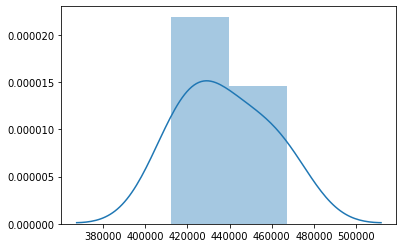

In [121]:
sns.distplot(so_data_USA.agg('sum'))


In [122]:
len(so_data_USA) # 164 USA universities

164

In [124]:
so_data_USA.agg('sum')

2014    412305
2015    424108
2016    433662
2017    450239
2018    467010
dtype: int64

In [125]:
so_data_USA=so_data_USA.reset_index()

In [412]:
so_data_USA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
institution_name    163 non-null object
2014                163 non-null int64
2015                163 non-null int64
2016                163 non-null int64
2017                163 non-null int64
2018                163 non-null int64
Total               0 non-null float64
dtypes: float64(1), int64(5), object(1)
memory usage: 9.0+ KB


In [391]:
sep_sum=lambda x: x.agg('sum')

In [126]:
so_data_USA['Total']=so_data_USA.sum(axis=1)

In [127]:
so_data_USA['Total']=so_data_USA.Total.astype(int)
so_data_USA.head()

,institution_name,2014,2015,2016,2017,2018,Total
0,"Jet Propulsion Laboratory, California Institut...",1913,1800,2181,2052,2200,10146
1,California Institute of Technology,4518,4347,4553,4567,4884,22869
2,Stanford University,12801,13656,13664,14233,14729,69083
3,Massachusetts Institute of Technology,9645,9957,10023,10191,10458,50274
4,Princeton University,4335,4629,4544,4635,4891,23034


In [128]:
URpp=so_data_USA[so_data_USA.institution_name=='University of Rochester']

In [129]:
URpp=URpp.reset_index()

In [130]:
URpp['Total']=URpp.sum(axis=1)

In [131]:
URpp

,index,institution_name,2014,2015,2016,2017,2018,Total
0,162,University of Rochester,3602,3540,3515,3633,3842,36426


# UofR's ScholarlyOutput from 2014 to 2018.
# It seems more like a Bi-modal distribution.

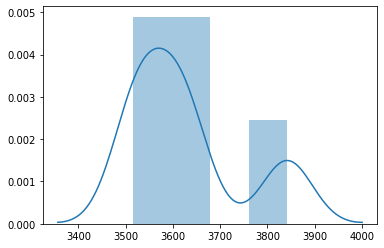

In [132]:
# UR Publs Distribution
inputdata=URpp[['2014','2015','2016','2017','2018']]
sns.distplot(inputdata)

# seems a bi-modal distribution but the overall trend is downward

# Top 1% and top 10% highly cited publications 

In [135]:
pp_data.tail()

,country,countryCode,institution_id,link,institution_name,metricType,t1_2014,t1_2015,t1_2016,t1_2017,...,t25_2014,t25_2015,t25_2016,t25_2017,t25_2018,t25_percent2014,t25_percent2015,t25_percent2016,t25_percent2017,t25_percent2018
1265,Saudi Arabia,SAU,703099,{'@href': 'https://api.elsevier.com/analytics/...,Imam Abdulrahman Bin Faisal University,PublicationsInTopJournalPercentiles,1.0,2.0,5.0,6.0,...,87.0,103.0,140.0,198.0,353.0,26.605505,29.428572,34.567900,38.521400,40.762123
1266,Turkey,TUR,705124,{'@href': 'https://api.elsevier.com/analytics/...,Istanbul Medipol University,PublicationsInTopJournalPercentiles,3.0,2.0,2.0,5.0,...,67.0,106.0,77.0,99.0,90.0,27.800830,29.041096,20.810812,27.049181,25.210085
1267,Georgia,GEO,204001,{'@href': 'https://api.elsevier.com/analytics/...,Ivane Javakhishvili Tbilisi State University,PublicationsInTopJournalPercentiles,1.0,1.0,2.0,2.0,...,205.0,241.0,278.0,266.0,335.0,50.368546,53.200882,52.751423,55.416668,58.566433
1268,United States,USA,508335,{'@href': 'https://api.elsevier.com/analytics/...,University of Rochester,PublicationsInTopJournalPercentiles,162.0,164.0,143.0,138.0,...,2163.0,2125.0,2131.0,2130.0,2309.0,70.364340,69.331154,67.436710,66.645805,66.522610
1269,United States,USA,508059,{'@href': 'https://api.elsevier.com/analytics/...,Emory University,PublicationsInTopJournalPercentiles,277.0,348.0,318.0,348.0,...,3967.0,3923.0,3854.0,3975.0,4143.0,73.708660,72.246780,68.907560,67.407160,68.186310


In [436]:
pp_data.head()

,country,countryCode,institution_id,link,institution_name,metricType,t1_2014,t1_2015,t1_2016,t1_2017,...,t25_2014,t25_2015,t25_2016,t25_2017,t25_2018,t25_percent2014,t25_percent2015,t25_percent2016,t25_percent2017,t25_percent2018
0,United Kingdom,GBR,315091,{'@href': 'https://api.elsevier.com/analytics/...,University of Oxford,PublicationsInTopJournalPercentiles,686.0,846.0,887.0,771.0,...,8098.0,8796.0,9089.0,9372.0,10096.0,73.77915,75.321110,73.55345,74.210150,74.923935
1,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",PublicationsInTopJournalPercentiles,74.0,82.0,83.0,71.0,...,1012.0,1056.0,1215.0,1195.0,1233.0,67.55675,73.333336,67.42509,66.536750,64.185320
2,United Kingdom,GBR,315091,{'@href': 'https://api.elsevier.com/analytics/...,University of Oxford,PublicationsInTopJournalPercentiles,686.0,846.0,887.0,771.0,...,8098.0,8796.0,9089.0,9372.0,10096.0,73.77915,75.321110,73.55345,74.210150,74.923935
3,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",PublicationsInTopJournalPercentiles,74.0,82.0,83.0,71.0,...,1012.0,1056.0,1215.0,1195.0,1233.0,67.55675,73.333336,67.42509,66.536750,64.185320
4,United States,USA,508021,{'@href': 'https://api.elsevier.com/analytics/...,California Institute of Technology,PublicationsInTopJournalPercentiles,305.0,245.0,259.0,253.0,...,2948.0,2945.0,3094.0,3108.0,3251.0,76.41265,79.102875,77.93451,76.835594,74.752820


In [136]:
USA_pp=pp_data[pp_data.countryCode=='USA']

In [137]:
len(USA_pp)

166

In [138]:
# we want t1 and t10 values

USA_pp.head()

,country,countryCode,institution_id,link,institution_name,metricType,t1_2014,t1_2015,t1_2016,t1_2017,...,t25_2014,t25_2015,t25_2016,t25_2017,t25_2018,t25_percent2014,t25_percent2015,t25_percent2016,t25_percent2017,t25_percent2018
1,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",PublicationsInTopJournalPercentiles,74.0,82.0,83.0,71.0,...,1012.0,1056.0,1215.0,1195.0,1233.0,67.55675,73.333336,67.425090,66.536750,64.18532
3,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",PublicationsInTopJournalPercentiles,74.0,82.0,83.0,71.0,...,1012.0,1056.0,1215.0,1195.0,1233.0,67.55675,73.333336,67.425090,66.536750,64.18532
4,United States,USA,508021,{'@href': 'https://api.elsevier.com/analytics/...,California Institute of Technology,PublicationsInTopJournalPercentiles,305.0,245.0,259.0,253.0,...,2948.0,2945.0,3094.0,3108.0,3251.0,76.41265,79.102875,77.934510,76.835594,74.75282
6,United States,USA,508219,{'@href': 'https://api.elsevier.com/analytics/...,Stanford University,PublicationsInTopJournalPercentiles,954.0,1016.0,1073.0,1027.0,...,8211.0,8963.0,8819.0,9276.0,9716.0,75.16478,76.541420,74.535164,75.279980,74.75571
7,United States,USA,508111,{'@href': 'https://api.elsevier.com/analytics/...,Massachusetts Institute of Technology,PublicationsInTopJournalPercentiles,820.0,818.0,918.0,822.0,...,5930.0,6190.0,6450.0,6475.0,6957.0,75.70535,75.839260,76.813150,77.120056,78.15975


In [442]:
USA_pp.columns

Index(['country', 'countryCode', 'institution_id', 'link', 'institution_name',
       'metricType', 't1_2014', 't1_2015', 't1_2016', 't1_2017', 't1_2018',
       't1_percent2014', 't1_percent2015', 't1_percent2016', 't1_percent2017',
       't1_percent2018', 't5_2014', 't5_2015', 't5_2016', 't5_2017', 't5_2018',
       't5_percent2014', 't5_percent2015', 't5_percent2016', 't5_percent2017',
       't5_percent2018', 't10_2014', 't10_2015', 't10_2016', 't10_2017',
       't10_2018', 't10_percent2014', 't10_percent2015', 't10_percent2016',
       't10_percent2017', 't10_percent2018', 't25_2014', 't25_2015',
       't25_2016', 't25_2017', 't25_2018', 't25_percent2014',
       't25_percent2015', 't25_percent2016', 't25_percent2017',
       't25_percent2018'],
      dtype='object')

In [139]:
USA_pp=USA_pp.loc[:][['institution_name','t1_2014','t1_2015','t1_2016','t1_2017','t1_2018','t10_2014','t10_2015','t10_2016','t10_2017','t10_2018']]

In [140]:
USA_pp=USA_pp.drop_duplicates()

In [141]:
USA_pp=USA_pp.reset_index()

In [142]:
USA_pp=USA_pp.iloc[:,1:]

In [143]:
USA_pp.head()

,institution_name,t1_2014,t1_2015,t1_2016,t1_2017,t1_2018,t10_2014,t10_2015,t10_2016,t10_2017,t10_2018
0,"Jet Propulsion Laboratory, California Institut...",74.0,82.0,83.0,71.0,123.0,455.0,483.0,694.0,687.0,679.0
1,California Institute of Technology,305.0,245.0,259.0,253.0,293.0,1709.0,1579.0,2051.0,1906.0,1967.0
2,Stanford University,954.0,1016.0,1073.0,1027.0,1025.0,5558.0,6068.0,5974.0,6233.0,6307.0
3,Massachusetts Institute of Technology,820.0,818.0,918.0,822.0,869.0,4401.0,4418.0,4689.0,4613.0,4781.0
4,Princeton University,271.0,269.0,227.0,241.0,253.0,1810.0,1740.0,1916.0,1871.0,1990.0


In [144]:
USA_pp.tail()

,institution_name,t1_2014,t1_2015,t1_2016,t1_2017,t1_2018,t10_2014,t10_2015,t10_2016,t10_2017,t10_2018
149,University of Texas at El Paso,15.0,11.0,13.0,20.0,30.0,164.0,238.0,254.0,257.0,246.0
150,Susquehanna University,3.0,2.0,0.0,1.0,1.0,14.0,10.0,9.0,14.0,10.0
151,California State University Long Beach,14.0,4.0,14.0,13.0,12.0,91.0,93.0,110.0,113.0,119.0
152,University of Rochester,162.0,164.0,143.0,138.0,133.0,1404.0,1308.0,1310.0,1309.0,1318.0
153,Emory University,277.0,348.0,318.0,348.0,274.0,2411.0,2494.0,2348.0,2464.0,2390.0


In [145]:
USA_pp['2014_Total']=USA_pp.loc[:][['t1_2014','t10_2014']].sum(axis=1)

In [146]:
USA_pp.head()

,institution_name,t1_2014,t1_2015,t1_2016,t1_2017,t1_2018,t10_2014,t10_2015,t10_2016,t10_2017,t10_2018,2014_Total
0,"Jet Propulsion Laboratory, California Institut...",74.0,82.0,83.0,71.0,123.0,455.0,483.0,694.0,687.0,679.0,529.0
1,California Institute of Technology,305.0,245.0,259.0,253.0,293.0,1709.0,1579.0,2051.0,1906.0,1967.0,2014.0
2,Stanford University,954.0,1016.0,1073.0,1027.0,1025.0,5558.0,6068.0,5974.0,6233.0,6307.0,6512.0
3,Massachusetts Institute of Technology,820.0,818.0,918.0,822.0,869.0,4401.0,4418.0,4689.0,4613.0,4781.0,5221.0
4,Princeton University,271.0,269.0,227.0,241.0,253.0,1810.0,1740.0,1916.0,1871.0,1990.0,2081.0


In [147]:
USA_pp['2015_Total']=USA_pp.loc[:][['t1_2015','t10_2015']].sum(axis=1)
USA_pp['2016_Total']=USA_pp.loc[:][['t1_2016','t10_2016']].sum(axis=1)
USA_pp['2017_Total']=USA_pp.loc[:][['t1_2017','t10_2017']].sum(axis=1)
USA_pp['2018_Total']=USA_pp.loc[:][['t1_2018','t10_2018']].sum(axis=1)

In [148]:
USA_pp.head()

,institution_name,t1_2014,t1_2015,t1_2016,t1_2017,t1_2018,t10_2014,t10_2015,t10_2016,t10_2017,t10_2018,2014_Total,2015_Total,2016_Total,2017_Total,2018_Total
0,"Jet Propulsion Laboratory, California Institut...",74.0,82.0,83.0,71.0,123.0,455.0,483.0,694.0,687.0,679.0,529.0,565.0,777.0,758.0,802.0
1,California Institute of Technology,305.0,245.0,259.0,253.0,293.0,1709.0,1579.0,2051.0,1906.0,1967.0,2014.0,1824.0,2310.0,2159.0,2260.0
2,Stanford University,954.0,1016.0,1073.0,1027.0,1025.0,5558.0,6068.0,5974.0,6233.0,6307.0,6512.0,7084.0,7047.0,7260.0,7332.0
3,Massachusetts Institute of Technology,820.0,818.0,918.0,822.0,869.0,4401.0,4418.0,4689.0,4613.0,4781.0,5221.0,5236.0,5607.0,5435.0,5650.0
4,Princeton University,271.0,269.0,227.0,241.0,253.0,1810.0,1740.0,1916.0,1871.0,1990.0,2081.0,2009.0,2143.0,2112.0,2243.0


In [149]:
UR_percentile=USA_pp[USA_pp.institution_name=='University of Rochester']

In [150]:
UR_percentile=UR_percentile.set_index('institution_name')

In [151]:
UR_percentile

,t1_2014,t1_2015,t1_2016,t1_2017,t1_2018,t10_2014,t10_2015,t10_2016,t10_2017,t10_2018,2014_Total,2015_Total,2016_Total,2017_Total,2018_Total
institution_name,,,,,,,,,,,,,,,
University of Rochester,162.0,164.0,143.0,138.0,133.0,1404.0,1308.0,1310.0,1309.0,1318.0,1566.0,1472.0,1453.0,1447.0,1451.0


In [152]:
basedata=UR_percentile[['2014_Total','2015_Total','2016_Total','2017_Total','2018_Total']]

In [153]:
basedata

,2014_Total,2015_Total,2016_Total,2017_Total,2018_Total
institution_name,,,,,
University of Rochester,1566.0,1472.0,1453.0,1447.0,1451.0


In [154]:
smalldata=UR_percentile.iloc[:,:10]

In [155]:
smalldata1=smalldata.loc[:][['t1_2014','t1_2015','t1_2016','t1_2017','t1_2018']]

In [156]:
smalldata1

,t1_2014,t1_2015,t1_2016,t1_2017,t1_2018
institution_name,,,,,
University of Rochester,162.0,164.0,143.0,138.0,133.0


In [157]:
smalldata2=smalldata.loc[:][['t10_2014','t10_2015','t10_2016','t10_2017','t10_2018']]

In [158]:
smalldata2

,t10_2014,t10_2015,t10_2016,t10_2017,t10_2018
institution_name,,,,,
University of Rochester,1404.0,1308.0,1310.0,1309.0,1318.0


In [478]:
# UR's ScholarlyOutput

so_data_USA.head()

,institution_name,2014,2015,2016,2017,2018,Total
0,"Jet Propulsion Laboratory, California Institut...",1913,1800,2181,2052,2200,10146
1,California Institute of Technology,4518,4347,4553,4567,4884,22869
2,Stanford University,12801,13656,13664,14233,14729,69083
3,Massachusetts Institute of Technology,9645,9957,10023,10191,10458,50274
4,Princeton University,4335,4629,4544,4635,4891,23034


In [479]:
UR_so=so_data_USA[so_data_USA.institution_name=='University of Rochester']

In [486]:
UR_so
del UR_so['Total']

In [513]:
UR_so

,2014,2015,2016,2017,2018
institution_name,,,,,
University of Rochester,3602,3540,3515,3633,3842


In [514]:
combinedata=pd.DataFrame({'2014':[int(162.0),int(1404.0),3602], '2015':[int(164.0),int(1308.0), 3540],
                         '2016':[int(143.0), int(1310.0),3515],
                         '2017':[int(138.0),int(1309.0),3633],
                         '2018':[int(133.0), int(1318.0),3842]})

In [515]:
combinedata

,2014,2015,2016,2017,2018
0,162,164,143,138,133
1,1404,1308,1310,1309,1318
2,3602,3540,3515,3633,3842


In [516]:
data_1=combinedata.iloc[2,:]
data_2=combinedata.iloc[1,:]
data_3=combinedata.iloc[0,:]

In [532]:
data_1

2014    3602
2015    3540
2016    3515
2017    3633
2018    3842
Name: 2, dtype: int64

In [908]:
A=pd.DataFrame(data=[data_1[:5]], columns=['2014','2015','2016','2017','2018'])

In [909]:
A

,2014,2015,2016,2017,2018
2,3602,3540,3515,3633,3842


In [911]:
A.reset_index(inplace=True, drop=True)

In [912]:
B=pd.DataFrame(data=[data_2[:5]], columns=['2014','2015','2016','2017','2018'])

In [914]:
B.reset_index(inplace=True, drop=True)

In [915]:
B

,2014,2015,2016,2017,2018
0,1404,1308,1310,1309,1318


In [918]:
C=pd.DataFrame(data=[data_3[:5]], columns=['2014','2015','2016','2017','2018'])

In [919]:
C.reset_index(inplace=True, drop=True)

In [920]:
C

,2014,2015,2016,2017,2018
0,162,164,143,138,133


In [166]:
def show_values_on_bars(axs, h_v="v", space=0.8):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center", color='red') 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left", color='black')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

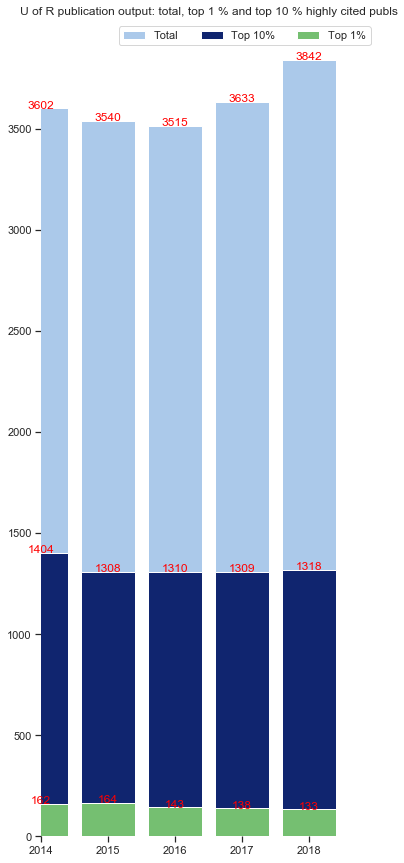

In [1024]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
sns.set_style("ticks", {"xtick.major.size": 10, "ytick.major.size": 8})

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
g=sns.barplot(data=A,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("dark")
g=sns.barplot(data=B,
            label="Top 10%", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
g=sns.barplot(data=C,
            label="Top 1%", color="g")

show_values_on_bars(g, "v", 0.8)

# Add a legend and informative axis label
plt.yticks(np.arange(0, 4000, step=500))
plt.xticks(np.arange(5), ('2014', '2015', '2016', '2017', '2018'))
ax.legend(ncol=3, loc="upper right", frameon=True)
ax.set(xlim=(0,5), ylabel="",
       title="U of R publication output: total, top 1 % and top 10 % highly cited publs")
sns.despine(left=True, bottom=True)

# From 2014-2018 ,our top 1% cited publs 
# and top10% cited pulbs slightly dropped.
# However, since our 2018 total publs increased a lot, 
# it would definitely influence our overall research performance.

# Trends in FWCI values of total U of R publication output

In [539]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\FNCI"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\FNCI


In [540]:
FWCI_all=pd.read_csv('THE_ALLUNI_FWCI.csv')

In [541]:
FWCI_all.head()

,country,countryCode,institution_id,link,institution_name,metricType,2014,2015,2016,2017,2018
0,United Kingdom,GBR,315091,{'@href': 'https://api.elsevier.com/analytics/...,University of Oxford,FieldWeightedCitationImpact,2.232452,2.178834,2.202485,1.966025,1.804821
1,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",FieldWeightedCitationImpact,1.611136,1.462793,1.656759,1.470790,1.346227
2,United States,USA,508021,{'@href': 'https://api.elsevier.com/analytics/...,California Institute of Technology,FieldWeightedCitationImpact,1.890797,1.740487,1.921985,1.847315,1.605074
3,United Kingdom,GBR,315068,{'@href': 'https://api.elsevier.com/analytics/...,University of Cambridge,FieldWeightedCitationImpact,1.904510,1.990053,2.050378,1.946377,1.763683
4,United States,USA,508219,{'@href': 'https://api.elsevier.com/analytics/...,Stanford University,FieldWeightedCitationImpact,2.445251,2.476393,2.568147,2.269981,2.244260


In [1064]:
UR_FWCI=FWCI_all[FWCI_all.institution_name=='University of Rochester']

In [1065]:
UR_FWCI=UR_FWCI.iloc[:, -7:]

In [1066]:
del UR_FWCI['metricType']

In [1067]:
UR_FWCI

,institution_name,2014,2015,2016,2017,2018
1259,University of Rochester,1.827581,2.117681,1.646356,1.700714,1.717541


In [1043]:
UR_FWCI.reset_index(inplace=True, drop=True)

In [1068]:
UR_FWCI.set_index('institution_name', inplace=True, drop=True)

In [1083]:
UR_FWCI.reset_index(inplace=True)

In [1084]:
UR_FWCI

,institution_name,2014,2015,2016,2017,2018
0,University of Rochester,1.827581,2.117681,1.646356,1.700714,1.717541


# UofR FWCI

In [103]:
def show_values_on_bars_1(axs, h_v="v", space=0.4):
    def _show_on_single_plot_1(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = round(p.get_height(),2)
                ax.text(_x, _y, value, ha="center", color='red') 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = round(p.get_width(),2)
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot_1(ax)
    else:
        _show_on_single_plot_1(axs)

# UofR FWCI have always been above global average which is 1.00

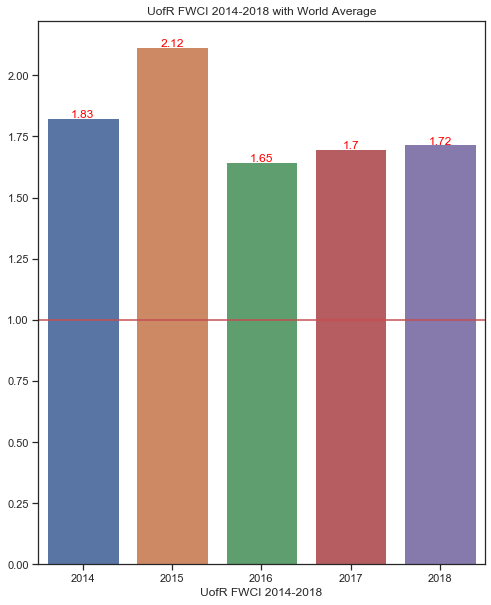

In [1094]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
sns.set_style("ticks", {"xtick.major.size": 10, "ytick.major.size": 8})

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))
g= sns.barplot(data=UR_FWCI)
plt.axhline(1.00, ls='-', color='r')
plt.title('UofR FWCI 2014-2018 with World Average')
plt.xlabel("UofR FWCI 2014-2018")
#plt.ylabel("Filed-weighted Cited Index")
show_values_on_bars_1(g, 'v', 0.3)

# Comparator analysis: top 10 % highly cited publications for USA universities

In [574]:
USA_pp.head()

,institution_name,t1_2014,t1_2015,t1_2016,t1_2017,t1_2018,t10_2014,t10_2015,t10_2016,t10_2017,t10_2018,2014_Total,2015_Total,2016_Total,2017_Total,2018_Total
0,"Jet Propulsion Laboratory, California Institut...",74.0,82.0,83.0,71.0,123.0,455.0,483.0,694.0,687.0,679.0,529.0,565.0,777.0,758.0,802.0
1,California Institute of Technology,305.0,245.0,259.0,253.0,293.0,1709.0,1579.0,2051.0,1906.0,1967.0,2014.0,1824.0,2310.0,2159.0,2260.0
2,Stanford University,954.0,1016.0,1073.0,1027.0,1025.0,5558.0,6068.0,5974.0,6233.0,6307.0,6512.0,7084.0,7047.0,7260.0,7332.0
3,Massachusetts Institute of Technology,820.0,818.0,918.0,822.0,869.0,4401.0,4418.0,4689.0,4613.0,4781.0,5221.0,5236.0,5607.0,5435.0,5650.0
4,Princeton University,271.0,269.0,227.0,241.0,253.0,1810.0,1740.0,1916.0,1871.0,1990.0,2081.0,2009.0,2143.0,2112.0,2243.0


In [159]:
UR_peer=['Boston University','Carnegie Mellon University','Case Western Reserve University','Duke University','Emory University',
        'Northwestern University','Vanderbilt University','Washington University','Johns Hopkins University','New York University',
        'Stanford University','Tulane University','University of Chicago','University of Pennsylvania','University of Southern California']

In [3]:
import pandas as pd

In [6]:
UR_peer_df=pd.DataFrame({'UR_Peer':UR_peer})

In [8]:
UR_peer_df=UR_peer_df.iloc[:14,:]

In [9]:
UR_peer_df['UR_Peer']

0                   Boston University
1          Carnegie Mellon University
2     Case Western Reserve University
3                     Duke University
4                    Emory University
5             Northwestern University
6               Vanderbilt University
7               Washington University
8            Johns Hopkins University
9                 New York University
10                Stanford University
11                  Tulane University
12              University of Chicago
13         University of Pennsylvania
Name: UR_Peer, dtype: object

# Get UofR's Global set's Publication in Top Journal Percentile

In [160]:
chuck=[]
for name in UR_peer_df['UR_Peer']: 
    chuck.append(USA_pp[USA_pp.institution_name==name])

In [161]:
DF=pd.concat(chuck, ignore_index=True)

In [162]:
DF.head()

,institution_name,t1_2014,t1_2015,t1_2016,t1_2017,t1_2018,t10_2014,t10_2015,t10_2016,t10_2017,t10_2018,2014_Total,2015_Total,2016_Total,2017_Total,2018_Total
0,Boston University,309.0,320.0,365.0,351.0,369.0,2219.0,2296.0,2421.0,2580.0,2564.0,2528.0,2616.0,2786.0,2931.0,2933.0
1,Case Western Reserve University,174.0,172.0,206.0,198.0,163.0,1516.0,1551.0,1572.0,1594.0,1513.0,1690.0,1723.0,1778.0,1792.0,1676.0
2,Duke University,541.0,508.0,563.0,543.0,478.0,3823.0,3910.0,3747.0,3828.0,3875.0,4364.0,4418.0,4310.0,4371.0,4353.0
3,Emory University,277.0,348.0,318.0,348.0,274.0,2411.0,2494.0,2348.0,2464.0,2390.0,2688.0,2842.0,2666.0,2812.0,2664.0
4,Northwestern University,511.0,526.0,621.0,527.0,603.0,3313.0,3412.0,3524.0,3682.0,3636.0,3824.0,3938.0,4145.0,4209.0,4239.0


In [178]:
UR_percentile=USA_pp[USA_pp.institution_name=='University of Rochester']

In [179]:
UR_percentile=UR_percentile.reset_index()

In [172]:
Global_top10=DF.loc[:][['institution_name','t10_2014','t10_2015','t10_2016','t10_2017','t10_2018']]

In [180]:
UR_pcer_top10=UR_percentile.loc[:][['institution_name','t10_2014','t10_2015','t10_2016','t10_2017','t10_2018']]

In [174]:
Global_top10.head()

,institution_name,t10_2014,t10_2015,t10_2016,t10_2017,t10_2018
0,Boston University,2219.0,2296.0,2421.0,2580.0,2564.0
1,Case Western Reserve University,1516.0,1551.0,1572.0,1594.0,1513.0
2,Duke University,3823.0,3910.0,3747.0,3828.0,3875.0
3,Emory University,2411.0,2494.0,2348.0,2464.0,2390.0
4,Northwestern University,3313.0,3412.0,3524.0,3682.0,3636.0


In [175]:
Global_top10['Top10_Total']=Global_top10.sum(axis=1)

In [176]:
Global_top10.head()

,institution_name,t10_2014,t10_2015,t10_2016,t10_2017,t10_2018,Top10_Total
0,Boston University,2219.0,2296.0,2421.0,2580.0,2564.0,12080.0
1,Case Western Reserve University,1516.0,1551.0,1572.0,1594.0,1513.0,7746.0
2,Duke University,3823.0,3910.0,3747.0,3828.0,3875.0,19183.0
3,Emory University,2411.0,2494.0,2348.0,2464.0,2390.0,12107.0
4,Northwestern University,3313.0,3412.0,3524.0,3682.0,3636.0,17567.0


In [169]:
len(Global_top10)

12

In [181]:
UR_pcer_top10

,institution_name,t10_2014,t10_2015,t10_2016,t10_2017,t10_2018
0,University of Rochester,1404.0,1308.0,1310.0,1309.0,1318.0


In [182]:
UR_pcer_top10['Top10_Total']=UR_pcer_top10.sum(axis=1)

In [183]:
UR_pcer_top10

,institution_name,t10_2014,t10_2015,t10_2016,t10_2017,t10_2018,Top10_Total
0,University of Rochester,1404.0,1308.0,1310.0,1309.0,1318.0,6649.0


In [184]:
Gall=pd.concat([Global_top10, UR_pcer_top10])

In [185]:
len(Gall)

13

In [647]:
import re

In [186]:
abb=[]
for i in Gall.institution_name:
    abb.append(i.split("\t")[0].strip(" "))
abb # not work

['Boston University',
 'Case Western Reserve University',
 'Duke University',
 'Emory University',
 'Northwestern University',
 'Vanderbilt University',
 'Johns Hopkins University',
 'New York University',
 'Stanford University',
 'Tulane University',
 'University of Chicago',
 'University of Pennsylvania',
 'University of Rochester']

In [187]:
Gall['UniAbbr']=['Boston','CWRU','Duke','Emory','Northwestern','Vanderbilt','JohnsHopkins','NYU','Stanford','Tulane','UofChicago','UofPenn','UofR']

In [188]:
Gall=Gall.sort_values(by='Top10_Total', ascending=False)

# Comparator analysis: top 10% highly cited publications UR and GlobalPeers

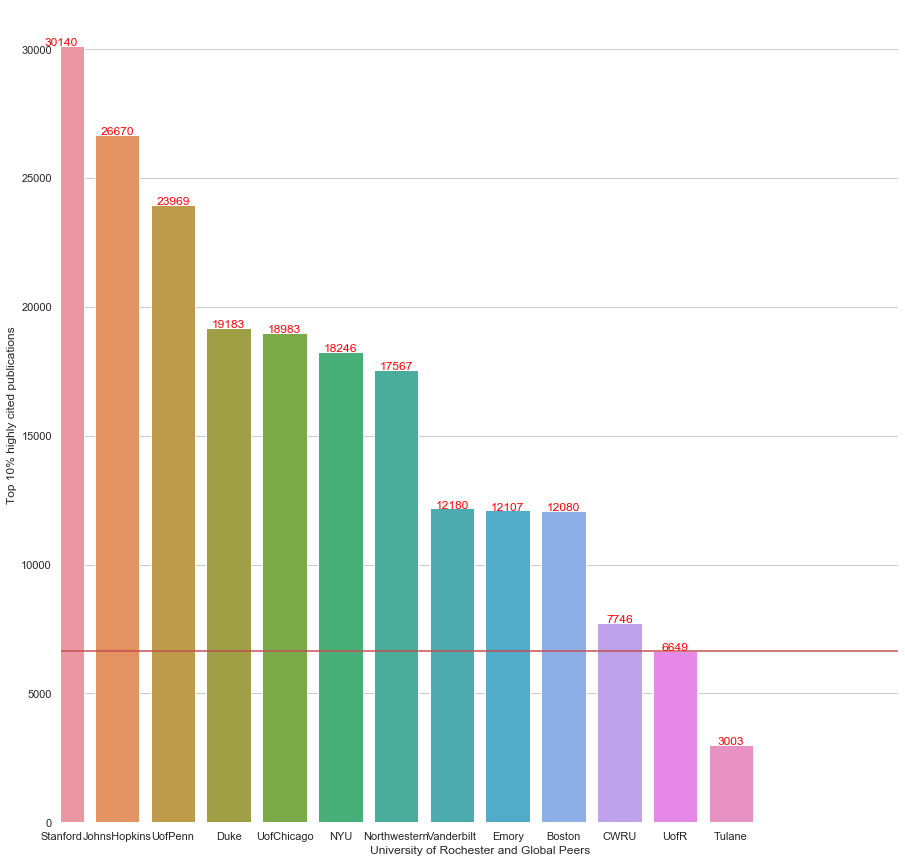

In [192]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))
g=sns.barplot(x=Gall.UniAbbr, y=Gall.Top10_Total, data=Gall)
plt.axhline(6649, ls='-', color='r') # can add a red base line for UofR value

#ax.text(Gall.UniAbbr, Gall.Top10_Total,color='black', ha="center")

# Add a legend and informative axis label
#ax.legend(ncol=12, loc="upper right", frameon=True)
ax.set(xlim=(0, 15),
       xlabel="University of Rochester and Global Peers", ylabel="Top 10% highly cited publications")
sns.despine(left=True, bottom=True)

show_values_on_bars(g,'v', 0.5)

# Among our other 12 USA peers,
# our top 10% highly-cited pulbs is relatively fewer

# Comparator analysis: Field-weighted Citation Impact

In [193]:
fwci_data.head()

,country,countryCode,institution_id,link,institution_name,metricType,2014,2015,2016,2017,2018
0,United Kingdom,GBR,315091,{'@href': 'https://api.elsevier.com/analytics/...,University of Oxford,FieldWeightedCitationImpact,2.232452,2.178834,2.202485,1.966025,1.804821
1,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",FieldWeightedCitationImpact,1.611136,1.462793,1.656759,1.470790,1.346227
2,United States,USA,508021,{'@href': 'https://api.elsevier.com/analytics/...,California Institute of Technology,FieldWeightedCitationImpact,1.890797,1.740487,1.921985,1.847315,1.605074
3,United Kingdom,GBR,315068,{'@href': 'https://api.elsevier.com/analytics/...,University of Cambridge,FieldWeightedCitationImpact,1.904510,1.990053,2.050378,1.946377,1.763683
4,United States,USA,508219,{'@href': 'https://api.elsevier.com/analytics/...,Stanford University,FieldWeightedCitationImpact,2.445251,2.476393,2.568147,2.269981,2.244260


In [194]:
fwci_data.tail()

,country,countryCode,institution_id,link,institution_name,metricType,2014,2015,2016,2017,2018
1263,Saudi Arabia,SAU,703099,{'@href': 'https://api.elsevier.com/analytics/...,Imam Abdulrahman Bin Faisal University,FieldWeightedCitationImpact,0.698082,0.649441,0.772378,0.787842,0.880861
1264,Turkey,TUR,705124,{'@href': 'https://api.elsevier.com/analytics/...,Istanbul Medipol University,FieldWeightedCitationImpact,0.661692,0.577872,0.552237,0.635915,0.666751
1265,Georgia,GEO,204001,{'@href': 'https://api.elsevier.com/analytics/...,Ivane Javakhishvili Tbilisi State University,FieldWeightedCitationImpact,1.556471,1.550585,1.177011,1.246151,1.725649
1266,United States,USA,508335,{'@href': 'https://api.elsevier.com/analytics/...,University of Rochester,FieldWeightedCitationImpact,1.827581,2.117681,1.646356,1.700714,1.717541
1267,United States,USA,508059,{'@href': 'https://api.elsevier.com/analytics/...,Emory University,FieldWeightedCitationImpact,1.999690,2.186228,2.209265,1.948478,1.967104


In [195]:
US_fwci=fwci_data[fwci_data.countryCode=='USA']

In [196]:
US_fwci.head()

,country,countryCode,institution_id,link,institution_name,metricType,2014,2015,2016,2017,2018
1,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",FieldWeightedCitationImpact,1.611136,1.462793,1.656759,1.470790,1.346227
2,United States,USA,508021,{'@href': 'https://api.elsevier.com/analytics/...,California Institute of Technology,FieldWeightedCitationImpact,1.890797,1.740487,1.921985,1.847315,1.605074
4,United States,USA,508219,{'@href': 'https://api.elsevier.com/analytics/...,Stanford University,FieldWeightedCitationImpact,2.445251,2.476393,2.568147,2.269981,2.244260
5,United States,USA,508111,{'@href': 'https://api.elsevier.com/analytics/...,Massachusetts Institute of Technology,FieldWeightedCitationImpact,2.271606,2.301666,2.355942,2.132760,1.971292
6,United States,USA,508191,{'@href': 'https://api.elsevier.com/analytics/...,Princeton University,FieldWeightedCitationImpact,2.111493,2.144071,2.101741,1.906495,1.919808


In [200]:
UR_peer_df

,UR_Peer
0,Boston University
1,Carnegie Mellon University
2,Case Western Reserve University
3,Duke University
4,Emory University
5,Northwestern University
6,Vanderbilt University
7,Washington University
8,Johns Hopkins University
9,New York University


In [212]:
UR=pd.DataFrame({'UR_Peer':['University of Rochester']})

In [214]:
UR_peer_df=pd.concat([UR_peer_df, UR])

In [215]:
UR_peer_df.reset_index(inplace=True)

In [198]:
len(Gall.institution_name) # Global peers and UofR

13

In [216]:
chuck=[]

for name in UR_peer_df.UR_Peer:
    if US_fwci[US_fwci.institution_name==name] is not None:
        chuck.append(US_fwci[US_fwci.institution_name==name])

In [217]:
UR_Peer_FWCI=pd.concat(chuck, ignore_index=True)

In [24]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\FNCI"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\FNCI


In [218]:
UR_Peer_FWCI.to_csv('UR_Global_Peer_FWCI_Comparison.csv', index=False)

In [29]:
ALL_FWCI=pd.read_csv('THE_ALLUNI_FWCI.csv')

In [30]:
ALL_FWCI=ALL_FWCI.drop_duplicates()

In [31]:
ALL_FWCI.head()

,country,countryCode,institution_id,link,institution_name,metricType,2014,2015,2016,2017,2018
0,United Kingdom,GBR,315091,{'@href': 'https://api.elsevier.com/analytics/...,University of Oxford,FieldWeightedCitationImpact,2.232452,2.178834,2.202485,1.966025,1.804821
1,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",FieldWeightedCitationImpact,1.611136,1.462793,1.656759,1.470790,1.346227
2,United States,USA,508021,{'@href': 'https://api.elsevier.com/analytics/...,California Institute of Technology,FieldWeightedCitationImpact,1.890797,1.740487,1.921985,1.847315,1.605074
3,United Kingdom,GBR,315068,{'@href': 'https://api.elsevier.com/analytics/...,University of Cambridge,FieldWeightedCitationImpact,1.904510,1.990053,2.050378,1.946377,1.763683
4,United States,USA,508219,{'@href': 'https://api.elsevier.com/analytics/...,Stanford University,FieldWeightedCitationImpact,2.445251,2.476393,2.568147,2.269981,2.244260


In [219]:
UR_Peer_FWCI=UR_Peer_FWCI.iloc[:, -7:]

In [222]:
UR_Peer_FWCI=UR_Peer_FWCI.drop_duplicates()

In [223]:
abb=[]
for name in Gall.UniAbbr:
    abb.append(name)
abb

['Stanford',
 'JohnsHopkins',
 'UofPenn',
 'Duke',
 'UofChicago',
 'NYU',
 'Northwestern',
 'Vanderbilt',
 'Emory',
 'Boston',
 'CWRU',
 'UofR',
 'Tulane']

In [764]:
UR_Peer_FWCI=UR_Peer_FWCI.drop_duplicates()

In [224]:
UR_Peer_FWCI.reset_index(inplace=True, drop=True)

In [225]:
UR_Peer_FWCI

,institution_name,metricType,2014,2015,2016,2017,2018
0,Boston University,FieldWeightedCitationImpact,2.102325,2.017788,2.082099,1.699757,1.916557
1,Case Western Reserve University,FieldWeightedCitationImpact,1.785904,1.952037,1.955858,1.773011,1.861512
2,Duke University,FieldWeightedCitationImpact,2.060966,2.188656,1.971610,1.903780,1.848280
3,Emory University,FieldWeightedCitationImpact,1.999690,2.186228,2.209265,1.948478,1.967104
4,Northwestern University,FieldWeightedCitationImpact,1.814437,2.036129,2.104611,2.028618,1.968102
5,Vanderbilt University,FieldWeightedCitationImpact,1.935092,2.053712,1.799374,1.751226,1.698510
6,Johns Hopkins University,FieldWeightedCitationImpact,2.039671,2.063183,2.086808,1.941970,1.903996
7,New York University,FieldWeightedCitationImpact,2.036910,2.071903,1.961854,1.787898,1.819667
8,Stanford University,FieldWeightedCitationImpact,2.445251,2.476393,2.568147,2.269981,2.244260
9,Tulane University,FieldWeightedCitationImpact,1.272190,1.784176,1.650411,1.381838,1.569006


In [230]:
UR_Peer_FWCI['UniAbbr']=['Boston','CWRU','Duke','Emory','Northwestern','Vanderbilt','JHopkins','NYU','Stanford','Tulane',
                               'UofC','UofPenn','UofR']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [231]:
UR_Peer_FWCI.head()

,institution_name,metricType,2014,2015,2016,2017,2018,UniAbbr
0,Boston University,FieldWeightedCitationImpact,2.102325,2.017788,2.082099,1.699757,1.916557,Boston
1,Case Western Reserve University,FieldWeightedCitationImpact,1.785904,1.952037,1.955858,1.773011,1.861512,CWRU
2,Duke University,FieldWeightedCitationImpact,2.060966,2.188656,1.971610,1.903780,1.848280,Duke
3,Emory University,FieldWeightedCitationImpact,1.999690,2.186228,2.209265,1.948478,1.967104,Emory
4,Northwestern University,FieldWeightedCitationImpact,1.814437,2.036129,2.104611,2.028618,1.968102,Northwestern


In [234]:
UR_Peer_FWCI['AVERAGE_FWCI']=round(UR_Peer_FWCI[['2014','2015','2016','2017','2018']].mean(axis=1), 4)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [235]:
UR_Peer_FWCI=UR_Peer_FWCI.sort_values(by='AVERAGE_FWCI', ascending=False)

In [236]:
UR_Peer_FWCI.head()

,institution_name,metricType,2014,2015,2016,2017,2018,UniAbbr,AVERAGE_FWCI
8,Stanford University,FieldWeightedCitationImpact,2.445251,2.476393,2.568147,2.269981,2.244260,Stanford,2.4008
3,Emory University,FieldWeightedCitationImpact,1.999690,2.186228,2.209265,1.948478,1.967104,Emory,2.0622
6,Johns Hopkins University,FieldWeightedCitationImpact,2.039671,2.063183,2.086808,1.941970,1.903996,JHopkins,2.0071
2,Duke University,FieldWeightedCitationImpact,2.060966,2.188656,1.971610,1.903780,1.848280,Duke,1.9947
4,Northwestern University,FieldWeightedCitationImpact,1.814437,2.036129,2.104611,2.028618,1.968102,Northwestern,1.9904


In [237]:
UR_Peer_FWCI[UR_Peer_FWCI.UniAbbr=='UofR']

,institution_name,metricType,2014,2015,2016,2017,2018,UniAbbr,AVERAGE_FWCI
12,University of Rochester,FieldWeightedCitationImpact,1.827581,2.117681,1.646356,1.700714,1.717541,UofR,1.802


# Comparatory analysis: Field-weighted Citation Impact

# Our average FWCI 2014-2018 is 1.8,
# but most of our USA peers have higher FWCI,
# this may explain why our overall score did not reflect our good FWCI

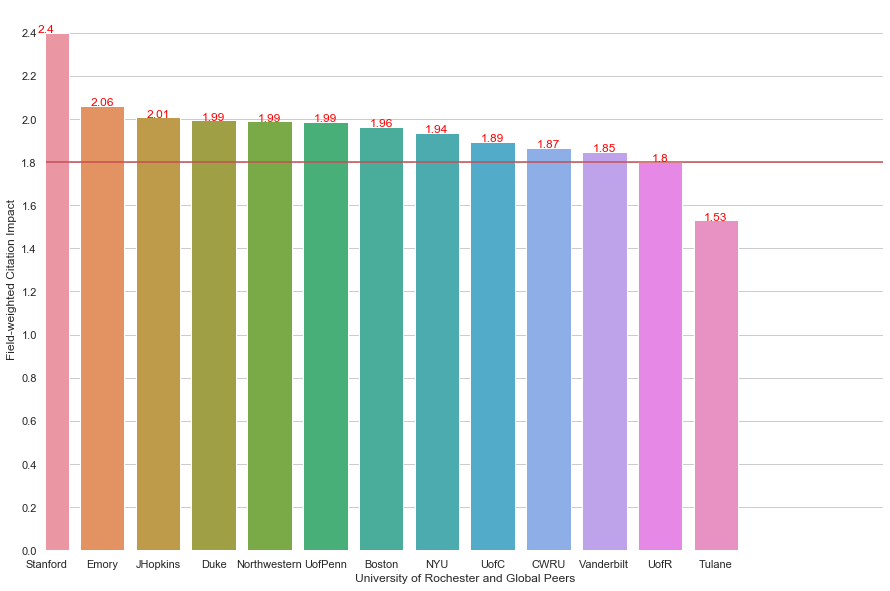

In [238]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))
g=sns.barplot(x=UR_Peer_FWCI.UniAbbr, y=UR_Peer_FWCI.AVERAGE_FWCI, data=UR_Peer_FWCI)
plt.axhline(1.802, ls='-', color='r')

show_values_on_bars_1(g , 'v' , 0.5)

#ax.text(Gall.UniAbbr, Gall.Top10_Total,color='black', ha="center")

# Add a legend and informative axis label
#ax.legend(ncol=12, loc="upper right", frameon=True)
plt.yticks(np.arange(0, 2.5, step=0.2))
ax.set(xlim=(0, 15),
       xlabel="University of Rochester and Global Peers", ylabel="Field-weighted Citation Impact")
sns.despine(left=True, bottom=True)

# Comparatory analysis:
# top publication output and highly cited publications

In [19]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PubTopJournalPercentile"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PubTopJournalPercentile


In [2]:
import pandas as pd
import numpy as np

In [20]:
A_PP=pd.read_csv('THE_ALLUNI_PP.csv')

In [21]:
USA_PP=A_PP[A_PP.countryCode=='USA']

In [22]:
USA_PP=USA_PP.drop_duplicates()

In [32]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\research_performance_Profile"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\research_performance_Profile


In [33]:
UR_peer=pd.read_csv('UR_GloPeers_Research_Performance_Profile.csv')

In [34]:
chuck=[]
for name in UR_peer.institution_name:
    chuck.append(USA_PP[USA_PP.institution_name==name])

In [35]:
UR_Peers_PP=pd.concat(chuck, ignore_index=True)

In [36]:
UR_Peers_PP

,country,countryCode,institution_id,link,institution_name,metricType,t1_2014,t1_2015,t1_2016,t1_2017,...,t25_2014,t25_2015,t25_2016,t25_2017,t25_2018,t25_percent2014,t25_percent2015,t25_percent2016,t25_percent2017,t25_percent2018
0,United States,USA,508219,{'@href': 'https://api.elsevier.com/analytics/...,Stanford University,PublicationsInTopJournalPercentiles,954.0,1016.0,1073.0,1027.0,...,8211.0,8963.0,8819.0,9276.0,9716.0,75.164780,76.541420,74.535164,75.279980,74.755710
1,United States,USA,508094,{'@href': 'https://api.elsevier.com/analytics/...,Johns Hopkins University,PublicationsInTopJournalPercentiles,615.0,610.0,754.0,796.0,...,8211.0,8685.0,8866.0,9088.0,9362.0,73.608246,73.921190,72.672130,71.921490,71.226420
2,United States,USA,508331,{'@href': 'https://api.elsevier.com/analytics/...,University of Pennsylvania,PublicationsInTopJournalPercentiles,693.0,719.0,777.0,701.0,...,7190.0,7286.0,7455.0,7541.0,8363.0,73.150880,72.678310,71.641365,70.635070,70.389700
3,United States,USA,508166,{'@href': 'https://api.elsevier.com/analytics/...,New York University,PublicationsInTopJournalPercentiles,475.0,492.0,509.0,495.0,...,5484.0,5704.0,5969.0,6262.0,6624.0,69.373820,68.582420,67.097570,67.449370,65.851470
4,United States,USA,508053,{'@href': 'https://api.elsevier.com/analytics/...,Duke University,PublicationsInTopJournalPercentiles,541.0,508.0,563.0,543.0,...,5910.0,5894.0,5863.0,5972.0,6376.0,75.885980,74.054530,73.077410,71.908485,72.347670
5,United States,USA,508270,{'@href': 'https://api.elsevier.com/analytics/...,University of Chicago,PublicationsInTopJournalPercentiles,582.0,535.0,569.0,515.0,...,5553.0,5666.0,5705.0,5613.0,5999.0,75.142080,74.425330,74.100530,73.190765,74.043450
6,United States,USA,508175,{'@href': 'https://api.elsevier.com/analytics/...,Northwestern University,PublicationsInTopJournalPercentiles,511.0,526.0,621.0,527.0,...,5070.0,5210.0,5301.0,5606.0,5733.0,74.177030,74.280014,73.594340,73.840890,73.368310
7,United States,USA,508363,{'@href': 'https://api.elsevier.com/analytics/...,Vanderbilt University,PublicationsInTopJournalPercentiles,295.0,339.0,320.0,316.0,...,3876.0,3917.0,4054.0,4218.0,4354.0,73.772360,73.310875,71.612785,72.486680,70.877420
8,United States,USA,508059,{'@href': 'https://api.elsevier.com/analytics/...,Emory University,PublicationsInTopJournalPercentiles,277.0,348.0,318.0,348.0,...,3967.0,3923.0,3854.0,3975.0,4143.0,73.708660,72.246780,68.907560,67.407160,68.186310
9,United States,USA,508013,{'@href': 'https://api.elsevier.com/analytics/...,Boston University,PublicationsInTopJournalPercentiles,309.0,320.0,365.0,351.0,...,3576.0,3668.0,3775.0,3967.0,4141.0,74.006620,74.311190,74.077705,73.503800,72.853620


In [38]:
UR_Peers_top1=UR_Peers_PP.loc[:][['institution_name','t1_2014','t1_2015','t1_2016','t1_2017','t1_2018']]

In [39]:
UR_Peers_top10=UR_Peers_PP.loc[:][['institution_name','t10_2014','t10_2015','t10_2016','t10_2017','t10_2018']]

In [40]:
UR_Peers_top1['top1_all']=UR_Peers_top1.sum(axis=1)

In [41]:
UR_Peers_top10['top10_all']=UR_Peers_top10.sum(axis=1)

In [42]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ScholarlyOutput"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ScholarlyOutput


In [43]:
ALL_so=pd.read_csv('THE_ALLUNI_SO.csv')

In [45]:
USA_so=ALL_so[ALL_so.countryCode=='USA']

In [49]:
chuck=[]
for name in UR_Peers_PP.institution_name:
    chuck.append(USA_so[USA_so.institution_name==name])
UR_Peers_SO=pd.concat(chuck, ignore_index=True)    

In [52]:
UR_Peers_SO=UR_Peers_SO.drop_duplicates()

In [53]:
UR_Peers_SO['Total_PUBLS']=UR_Peers_SO.sum(axis=1)

In [60]:
O=UR_Peers_SO.loc[:][['institution_name','Total_PUBLS']]

In [61]:
P=UR_Peers_top1.loc[:][['institution_name','top1_all']]

In [62]:
Q=UR_Peers_top10.loc[:][['institution_name','top10_all']]

In [63]:
part1=O.join(P.set_index('institution_name'), on='institution_name')

In [64]:
part2=part1.join(Q.set_index('institution_name'), on='institution_name')

In [65]:
part2

,institution_name,Total_PUBLS,top1_all,top10_all
0,Stanford University,577302,5095.0,30140.0
1,Johns Hopkins University,574103,3467.0,26670.0
2,University of Pennsylvania,566904,3589.0,23969.0
3,New York University,558900,2469.0,18246.0
5,Duke University,553164,2633.0,19183.0
6,University of Chicago,552365,2750.0,18983.0
7,Northwestern University,548490,2788.0,17567.0
9,Vanderbilt University,539419,1605.0,12180.0
10,Emory University,538845,1565.0,12107.0
11,Boston University,536886,1714.0,12080.0


In [66]:
part2['remaining_90%']=part2.Total_PUBLS-part2.top1_all-part2.top10_all

In [67]:
part2

,institution_name,Total_PUBLS,top1_all,top10_all,remaining_90%
0,Stanford University,577302,5095.0,30140.0,542067.0
1,Johns Hopkins University,574103,3467.0,26670.0,543966.0
2,University of Pennsylvania,566904,3589.0,23969.0,539346.0
3,New York University,558900,2469.0,18246.0,538185.0
5,Duke University,553164,2633.0,19183.0,531348.0
6,University of Chicago,552365,2750.0,18983.0,530632.0
7,Northwestern University,548490,2788.0,17567.0,528135.0
9,Vanderbilt University,539419,1605.0,12180.0,525634.0
10,Emory University,538845,1565.0,12107.0,525173.0
11,Boston University,536886,1714.0,12080.0,523092.0


In [70]:
part2['Abbr']=['Stanford','JohnsHopkins','UofPenn','NYU','Duke','UofChicago','Northwestern','Vanderbilt','Emory','Boston','CWRU','UofR','Tulane']

In [71]:
part2

,institution_name,Total_PUBLS,top1_all,top10_all,remaining_90%,Abbr
0,Stanford University,577302,5095.0,30140.0,542067.0,Stanford
1,Johns Hopkins University,574103,3467.0,26670.0,543966.0,JohnsHopkins
2,University of Pennsylvania,566904,3589.0,23969.0,539346.0,UofPenn
3,New York University,558900,2469.0,18246.0,538185.0,NYU
5,Duke University,553164,2633.0,19183.0,531348.0,Duke
6,University of Chicago,552365,2750.0,18983.0,530632.0,UofChicago
7,Northwestern University,548490,2788.0,17567.0,528135.0,Northwestern
9,Vanderbilt University,539419,1605.0,12180.0,525634.0,Vanderbilt
10,Emory University,538845,1565.0,12107.0,525173.0,Emory
11,Boston University,536886,1714.0,12080.0,523092.0,Boston


In [84]:
A=part2[['Abbr','remaining_90%']]

In [95]:
A.reset_index(inplace=True)

In [86]:
B=part2[['Abbr','top10_all']]

In [99]:
B

,Abbr,top10_all
0,Stanford,30140.0
1,JohnsHopkins,26670.0
2,UofPenn,23969.0
3,NYU,18246.0
5,Duke,19183.0
6,UofChicago,18983.0
7,Northwestern,17567.0
9,Vanderbilt,12180.0
10,Emory,12107.0
11,Boston,12080.0


In [87]:
C=part2[['Abbr','top1_all']]

In [101]:
len(C.Abbr)

13

In [98]:
def show_values_on_bars(axs, h_v="v", space=0.8):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center", color='red') 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left", color='black')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Compare to our USA peers, our top 1% and top 10% highly cited 
# publications is relatively low

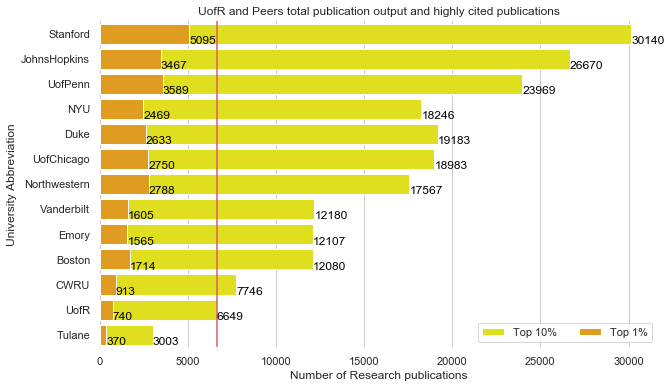

In [174]:
# Plot the crashes where alcohol was involved
# Plot the crashes where alcohol was involved
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 6))
sns.set_color_codes()
g=sns.barplot(x='top10_all',y='Abbr',data=B,
            label="Top 10%", color="yellow")
sns.set_color_codes("muted")
g=sns.barplot(x='top1_all', y='Abbr', data=C,
            label="Top 1%", color="orange")

plt.axvline(6649, ls='-', color='r')

ax.legend(ncol=2, loc="lower right", frameon=True)
#plt.xticks(np.arange(0,3000, step=100))
ax.set(xlabel='Number of Research publications', ylabel="University Abbreviation",
       title="UofR and Peers total publication output and highly cited publications")
sns.despine(left=True, bottom=True)

show_values_on_bars(g, "h", 2)

# Use all THE University ids to get Topic Cluster ids

In [175]:
url='https://api.elsevier.com/analytics/scival/topic/metrics/institutionId/{}?topicId={}&metricTypes=ScholarlyOutput&yearRange=5yrs'

In [176]:
import requests
import json
import pandas as pd
import numpy as np

In [177]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PercPublsCited"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PercPublsCited


In [178]:
ALL_Uids=pd.read_csv("THEUNI_CITEDPUBLS.csv")

In [182]:
ALL_Uids=ALL_Uids.iloc[:,:3]

In [184]:
USA_Uids=ALL_Uids[ALL_Uids.countryCode=='USA']

In [186]:
USA_Uids.reset_index(inplace=True, drop=True)

In [189]:
USA_Uids.head() # these are the USA university ids we'll use in API
len(USA_Uids) # 165 universities

165

In [191]:
inst_ids=USA_Uids

In [ ]:
# get topic ids

In [ ]:
# THE

In [216]:
url='https://api.elsevier.com/analytics/scival/subjectArea/classificationType/THE?'

In [197]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data


In [198]:
import time
from time import sleep

In [214]:
time.sleep(1)

subjectAreas_name=[]
subjectAreas_id=[]
subjectAreas_uri=[]
classificationType=[]
classificationName=[]


resp = requests.get(url, headers={'Accept':'application/json',
                             'X-ELS-APIKey': "d3794058e2b24417b5dfd0ef8990e2dc"})
parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
result=json.loads(parsed)
result["subjectAreas"][0]['children'][0]

{'classificationType': 'ASJC',
 'id': 1000,
 'link': {'@href': 'https://api.elsevier.com/analytics/scival/subjectArea/1000?classificationType=ASJC&apiKey=d3794058e2b24417b5dfd0ef8990e2dc&httpAccept=application/json',
  '@ref': 'self',
  '@type': 'application/json'},
 'name': 'Multidisciplinary',
 'uri': 'Class/ASJC/Code/1000'}

In [204]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\THE Code"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\THE Code


In [235]:
subjectAreas_name=[]
subjectAreas_id=[]
subjectAreas_uri=[]
classificationType=[]
classificationName=[]

resp = requests.get(url, headers={'Accept':'application/json',
                             'X-ELS-APIKey': "d3794058e2b24417b5dfd0ef8990e2dc"})
parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
result=json.loads(parsed)
#if 'children' in result['subjectAreas'][0]:
#    if len(result['subjectAreas']) >=1:
#        if "name" in result["subjectAreas"][0]['children'][0]:
#    subjectAreas_name.append(result["subjectAreas"][0]['children'][0]["name"])
#subjectAreas_name
#result
result

{'link': {'@href': 'https://api.elsevier.com/analytics/scival/subjectArea/classificationType/THE?apiKey=d3794058e2b24417b5dfd0ef8990e2dc&httpAccept=application/json',
  '@ref': 'self',
  '@type': 'application/json'},
 'subjectAreas': [{'classificationName': 'Times Higher Education',
   'classificationType': 'THE',
   'id': 32,
   'link': {'@href': 'https://api.elsevier.com/analytics/scival/subjectArea/32?classificationType=THE&apiKey=d3794058e2b24417b5dfd0ef8990e2dc&httpAccept=application/json',
    '@ref': 'self',
    '@type': 'application/json'},
   'name': 'Life Sciences',
   'uri': 'Class/THE/Code/32'},
  {'classificationName': 'Times Higher Education',
   'classificationType': 'THE',
   'id': 33,
   'link': {'@href': 'https://api.elsevier.com/analytics/scival/subjectArea/33?classificationType=THE&apiKey=d3794058e2b24417b5dfd0ef8990e2dc&httpAccept=application/json',
    '@ref': 'self',
    '@type': 'application/json'},
   'name': 'Arts and Humanities',
   'uri': 'Class/THE/Code/33'

In [244]:
subjectAreas_name=[]
subjectAreas_id=[]
subjectAreas_uri=[]
classificationType=[]
classificationName=[]

resp = requests.get(url, headers={'Accept':'application/json',
                             'X-ELS-APIKey': "d3794058e2b24417b5dfd0ef8990e2dc"})
parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
result=json.loads(parsed)
DF=pd.DataFrame.from_dict(result['subjectAreas'])
DF.to_csv("THE_Classification_Code.csv", index=False)

In [192]:
# ASJC

In [429]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code


In [ ]:
https://api.elsevier.com/analytics/scival/subjectArea/classificationType/ASJC?

In [434]:
url='https://api.elsevier.com/analytics/scival/subjectArea/classificationType/ASJC?'

In [439]:
classificationType=[]
classification_id=[]
link=[]
name=[]
uri=[]

resp = requests.get(url, headers={'Accept':'application/json',
                             'X-ELS-APIKey': "ba88a424c653ea37282b6a4cdf423a1d"})
parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
result=json.loads(parsed)
with open("ASJC.text", "a") as output:
    json.dump(result, output)

In [440]:
with open("ASJC.json") as json_file:
    result=json.load(json_file)
result['subjectAreas'][0]['children'][0]

{'link': {'@ref': 'self',
  '@href': 'https://api.elsevier.com/analytics/scival/subjectArea/1000?classificationType=ASJC&apiKey=ba88a424c653ea37282b6a4cdf423a1d&httpAccept=application/json',
  '@type': 'application/json'},
 'name': 'Multidisciplinary',
 'id': 1000,
 'uri': 'Class/ASJC/Code/1000',
 'classificationType': 'ASJC'}

In [261]:
# ASJC code result from earlier data

In [265]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code


In [271]:
with open("ASJC.json") as output:
    data=json.load(output)

In [442]:
with open("ASJC.json") as json_file:
    result=json.load(json_file)
len(result['subjectAreas'])

27

In [277]:
name=[]
Acode=[]
uri=[]
classificationType=[]

for i in range(0,len(data['subjectAreas'])):
    name.append(data['subjectAreas'][i]['children'][0]['name'])
    Acode.append(data['subjectAreas'][i]['children'][0]['id'])
    uri.append(data['subjectAreas'][i]['children'][0]['uri'])
    classificationType.append(data['subjectAreas'][i]['children'][0]['classificationType'])
DF=pd.DataFrame({'name':name,
                'ASJC_Code': Acode,
                'uri':uri,
                'classificationType':classificationType})
DF.to_csv("NEW_ASJC.csv", index=False)

In [339]:
url='https://api.elsevier.com/analytics/scival/topic/metrics/institutionId/508335?topicId={}&metricTypes=ScholarlyOutput&yearRange=5yrs'

In [281]:
for item in inst_ids.institution_id[:2]: # test
    print(item)

508092
508021


In [349]:
pwd

'C:\\Users\\jchen148\\THE Rankings\\Report to Jane\\OK Files\\OUtput Data\\ASJC Code'

In [351]:
with open("ASJC.json") as output:
    topic_id=json.load(output)

In [354]:
ASJC_Code=pd.read_csv("NEW_ASJC.csv")

In [355]:
ASJC_Code.head()

,name,ASJC_Code,uri,classificationType
0,Multidisciplinary,1000,Class/ASJC/Code/1000,ASJC
1,General Agricultural and Biological Sciences,1100,Class/ASJC/Code/1100,ASJC
2,General Arts and Humanities,1200,Class/ASJC/Code/1200,ASJC
3,"General Biochemistry,Genetics and Molecular Bi...",1300,Class/ASJC/Code/1300,ASJC
4,"General Business,Management and Accounting",1400,Class/ASJC/Code/1400,ASJC


In [368]:
topic_id=ASJC_Code['ASJC_Code']
topic_id[:2]

0    1000
1    1100
Name: ASJC_Code, dtype: int64

In [285]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code


In [443]:
# got all the ASJC code

In [453]:
# https://github.com/dhimmel/scopus/blob/master/data/asjc-codes.tsv 

url='https://raw.githubusercontent.com/dhimmel/scopus/master/data/asjc-codes.tsv'

In [454]:
ASJC=pd.read_csv(url, sep='\t')

In [505]:
ASJC.head()
ASJC.to_csv("ASJC_CODE_OK.csv", index=False)

In [456]:
len(ASJC.asjc_code)

334

In [457]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ScholarlyOutput"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ScholarlyOutput


In [458]:
All_SO=pd.read_csv("THE_ALLUNI_SO.csv")

In [462]:
UR_id=All_SO[All_SO.institution_name=='University of Rochester'].institution_id

In [463]:
UR_id

1259    508335
Name: institution_id, dtype: int64

In [369]:
for item in inst_ids.institution_id[20:22]:
    print(item)

508358
508166


In [374]:
UR_ins_id='508335'

In [466]:
UR_id

1259    508335
Name: institution_id, dtype: int64

# ScholarlyOutput Metric

In [521]:
url='https://api.elsevier.com/analytics/scival/topic/metrics/institutionId/508335?topicId={}&metricTypes=ScholarlyOutput&yearRange=5yrs'

In [469]:
for item in ASJC.asjc_code[:2]:
    print(url.format(item))

https://api.elsevier.com/analytics/scival/topic/metrics/institutionId/508335?topicId=1000&metricTypes=ScholarlyOutput&yearRange=5yrs
https://api.elsevier.com/analytics/scival/topic/metrics/institutionId/508335?topicId=1100&metricTypes=ScholarlyOutput&yearRange=5yrs


In [520]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code


In [491]:
for item in ASJC.asjc_code[:2]:
    resp = requests.get(url.format(item), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "ba88a424c653ea37282b6a4cdf423a1d"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
    result=json.loads(parsed)
result['results'][0]['topic']['id']

1100

In [522]:
sourcename=[]
lastUpdated=[]
source=[]
endyear=[]
startyear=[]
name=[]
link=[]
overallScholarlyOutput=[]
prominencePercentile=[]
scholarlyOutput=[]
uri=[]
Acode=[]

for item in ASJC.asjc_code[:2]:
    resp = requests.get(url.format(item), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "ba88a424c653ea37282b6a4cdf423a1d"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
    result=json.loads(parsed)
    if len(result['results']) >=1:
        sourcename.append(result['dataSource']["sourceName"])
        lastUpdated.append(result['dataSource']['lastUpdated'])
        source.append(result['dataSource'])
        endyear.append(result['dataSource']['metricEndYear'])
        startyear.append(result['dataSource']['metricStartYear'])
        link.append(result['link'])
        name.append(result['results'][0]['topic']['name'])
        overallScholarlyOutput.append(result['results'][0]['topic']['overallScholarlyOutput'])
        prominencePercentile.append(result['results'][0]['topic']['prominencePercentile'])
        scholarlyOutput.append(result['results'][0]['topic']['scholarlyOutput'])
        uri.append(result['results'][0]['topic']['uri'])
        Acode.append(result['results'][0]['topic']['id'])

s1=pd.Series(source, name="source")
s2=pd.Series(endyear, name="MetricEndYear")
s3=pd.Series(startyear, name="MetricStartYear")
s4=pd.Series(name, name="Topic")
s5=pd.Series(link, name="Link")
s6=pd.Series(overallScholarlyOutput, name="overallScholarlyOutput")
s7=pd.Series(prominencePercentile, name="prominencePercentile")
s8=pd.Series(scholarlyOutput, name="scholarlyOutput")
s9=pd.Series(uri, name="uri")
s10=pd.Series(Acode, name="ASJC Code")
s11=pd.Series(sourcename, name='sourcename')
s12=pd.Series(lastUpdated, name="lastUpdated")

DF=pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10, s11, s12], axis=1)
DF.to_csv("ASJC_UR_SO_1.csv", index=False)
#result['results']

# Combine all the subfiles

In [506]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code


In [509]:
filename="ASJC_UR_0113_{}.csv"

chuck=[]
for i in range(1, 4):
    chuck.append(pd.read_csv(filename.format(i)))
DF=pd.concat(chuck)

In [510]:
DF.head()

,source,MetricEndYear,MetricStartYear,Topic,Link,overallScholarlyOutput,prominencePercentile,scholarlyOutput,uri,ASJC Code
0,"{'lastUpdated': '2020-01-01', 'metricEndYear':...",2018,2014,Time; Time Perception; Temporal bisection,{'@href': 'https://api.elsevier.com/analytics/...,868,94.983770,1,Topic/1100,1100
1,"{'lastUpdated': '2020-01-01', 'metricEndYear':...",2018,2014,Coronavirus; Severe Acute Respiratory Syndrome...,{'@href': 'https://api.elsevier.com/analytics/...,151,85.623480,1,Topic/1101,1101
2,"{'lastUpdated': '2020-01-01', 'metricEndYear':...",2018,2014,"Breast Neoplasms; Receptor, Epidermal Growth F...",{'@href': 'https://api.elsevier.com/analytics/...,1247,99.154570,1,Topic/1107,1107
0,"{'lastUpdated': '2020-01-01', 'metricEndYear':...",2018,2014,Retinal Vein Occlusion; Macular Edema; Occlusi...,{'@href': 'https://api.elsevier.com/analytics/...,936,92.781470,3,Topic/1109,1109
1,"{'lastUpdated': '2020-01-01', 'metricEndYear':...",2018,2014,Transcranial Magnetic Stimulation; Depression;...,{'@href': 'https://api.elsevier.com/analytics/...,1065,98.628525,2,Topic/1111,1111


In [511]:
DF.to_csv("UR_ASJC_ScholarlyOutput.csv", index=False)

# CitationCount Metric

In [513]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code\ASJC Versus CitationCount"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code\ASJC Versus CitationCount


In [515]:
url='https://api.elsevier.com/analytics/scival/topic/metrics/institutionId/508335?topicId={}&metricTypes=CitationCount&yearRange=5yrs'

In [519]:
sourcename=[]
lastUpdated=[]
metricType=[]
metricvalue=[]
source=[]
endyear=[]
startyear=[]
name=[]
link=[]
prominencePercentile=[]
scholarlyOutput=[]
uri=[]
Acode=[]


for item in ASJC.asjc_code[100:]:
    resp = requests.get(url.format(item), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "ba88a424c653ea37282b6a4cdf423a1d"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
    result=json.loads(parsed)
    if len(result['results']) >=1:
        sourcename.append(result['dataSource']["sourceName"])
        lastUpdated.append(result['dataSource']["lastUpdated"])
        source.append(result['dataSource'])
        endyear.append(result['dataSource']['metricEndYear'])
        startyear.append(result['dataSource']['metricStartYear'])
        link.append(result['link'])
        if len(result['results'][0]["metrics"]) >=1:
            metricType.append(result['results'][0]["metrics"][0]["metricType"])
            metricvalue.append(result['results'][0]["metrics"][0]["value"])
        name.append(result['results'][0]['topic']['name'])
        overallScholarlyOutput.append(result['results'][0]['topic']['overallScholarlyOutput'])
        prominencePercentile.append(result['results'][0]['topic']['prominencePercentile'])
        scholarlyOutput.append(result['results'][0]['topic']['scholarlyOutput'])
        uri.append(result['results'][0]['topic']['uri'])
        Acode.append(result['results'][0]['topic']['id'])

s1=pd.Series(source, name="source")
s2=pd.Series(endyear, name="MetricEndYear")
s3=pd.Series(startyear, name="MetricStartYear")
s4=pd.Series(name, name="Topic")
s5=pd.Series(link, name="Link")
s6=pd.Series(metricvalue, name="CitationCount")
s7=pd.Series(prominencePercentile, name="prominencePercentile")
s8=pd.Series(scholarlyOutput, name="scholarlyOutput")
s9=pd.Series(uri, name="uri")
s10=pd.Series(Acode, name="ASJC Code")

DF=pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10], axis=1)
DF.to_csv("ASJC_UR_CC_3.csv", index=False)
#result['results']

In [4]:
pwd

'C:\\Users\\jchen148.UR\\Downloads'

In [5]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code\ASJCVersusCitationCount"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code\ASJCVersusCitationCount


In [6]:
import pandas as pd
import numpy as np

In [10]:
filename="ASJC_UR_CC_{}.csv"
chuck=[]
for i in range(1,3):
    chuck.append(pd.read_csv(filename.format(i)))
DF=pd.concat(chuck)

In [11]:
DF.head()

,source,MetricEndYear,MetricStartYear,Topic,Link,CitationCount,prominencePercentile,scholarlyOutput,uri,ASJC Code
0,"{'lastUpdated': '2020-01-01', 'metricEndYear':...",2018,2014,Time; Time Perception; Temporal bisection,{'@href': 'https://api.elsevier.com/analytics/...,19,94.983770,1,Topic/1100,1100
0,"{'lastUpdated': '2020-01-01', 'metricEndYear':...",2018,2014,Coronavirus; Severe Acute Respiratory Syndrome...,{'@href': 'https://api.elsevier.com/analytics/...,23,85.623480,1,Topic/1101,1101
1,"{'lastUpdated': '2020-01-01', 'metricEndYear':...",2018,2014,"Breast Neoplasms; Receptor, Epidermal Growth F...",{'@href': 'https://api.elsevier.com/analytics/...,4,99.154570,1,Topic/1107,1107
2,"{'lastUpdated': '2020-01-01', 'metricEndYear':...",2018,2014,Retinal Vein Occlusion; Macular Edema; Occlusi...,{'@href': 'https://api.elsevier.com/analytics/...,17,92.781470,3,Topic/1109,1109
3,"{'lastUpdated': '2020-01-01', 'metricEndYear':...",2018,2014,Transcranial Magnetic Stimulation; Depression;...,{'@href': 'https://api.elsevier.com/analytics/...,5,98.628525,2,Topic/1111,1111


In [12]:
DF.to_csv("UR_ASJC_CitationCount.csv", index=False)

# FieldWeightedCitationImpact

In [21]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code\FWCI"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code\FWCI


In [14]:
url='https://api.elsevier.com/analytics/scival/topic/metrics/institutionId/508335?topicId={}&metricTypes=FieldWeightedCitationImpact&yearRange=5yrs'


In [20]:
ASJC=pd.read_csv('Scopus_ASJC_CODE.csv')

In [23]:
import pandas as pd
import requests
import json
import numpy as np

In [26]:
sourcename=[]
lastUpdated=[]
metricType=[]
metricvalue=[]
source=[]
endyear=[]
startyear=[]
name=[]
link=[]
prominencePercentile=[]
scholarlyOutput=[]
uri=[]
Acode=[]


for item in ASJC.asjc_code[100:]:
    resp = requests.get(url.format(item), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "ba88a424c653ea37282b6a4cdf423a1d"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
    result=json.loads(parsed)
    if len(result['results']) >=1:
        sourcename.append(result['dataSource']["sourceName"])
        lastUpdated.append(result['dataSource']["lastUpdated"])
        source.append(result['dataSource'])
        endyear.append(result['dataSource']['metricEndYear'])
        startyear.append(result['dataSource']['metricStartYear'])
        link.append(result['link'])
        if len(result['results'][0]["metrics"]) >=1:
            metricType.append(result['results'][0]["metrics"][0]["metricType"])
            metricvalue.append(result['results'][0]["metrics"][0]["value"])
        name.append(result['results'][0]['topic']['name'])
#        overallScholarlyOutput.append(result['results'][0]['topic']['overallScholarlyOutput'])
        prominencePercentile.append(result['results'][0]['topic']['prominencePercentile'])
        scholarlyOutput.append(result['results'][0]['topic']['scholarlyOutput'])
        uri.append(result['results'][0]['topic']['uri'])
        Acode.append(result['results'][0]['topic']['id'])

s1=pd.Series(source, name="source")
s2=pd.Series(endyear, name="MetricEndYear")
s3=pd.Series(startyear, name="MetricStartYear")
s4=pd.Series(name, name="Topic")
s5=pd.Series(link, name="Link")
s6=pd.Series(metricvalue, name="FWCI")
s7=pd.Series(prominencePercentile, name="prominencePercentile")
s8=pd.Series(scholarlyOutput, name="scholarlyOutput")
s9=pd.Series(uri, name="uri")
s10=pd.Series(Acode, name="ASJC Code")

DF=pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10], axis=1)
DF.to_csv("ASJC_UR_FWCI_2.csv", index=False)
#result['results']

In [27]:
# combine the subfiles
data1=pd.read_csv("ASJC_UR_FWCI_1.csv")
data2=pd.read_csv("ASJC_UR_FWCI_2.csv")

In [28]:
data=pd.concat([data1,data2])

In [29]:
data.head()

,source,MetricEndYear,MetricStartYear,Topic,Link,FWCI,prominencePercentile,scholarlyOutput,uri,ASJC Code
0,"{'lastUpdated': '2020-01-01', 'metricEndYear':...",2018,2014,Time; Time Perception; Temporal bisection,{'@href': 'https://api.elsevier.com/analytics/...,2.724823,94.983770,1,Topic/1100,1100
1,"{'lastUpdated': '2020-01-01', 'metricEndYear':...",2018,2014,Coronavirus; Severe Acute Respiratory Syndrome...,{'@href': 'https://api.elsevier.com/analytics/...,2.451854,85.623480,1,Topic/1101,1101
2,"{'lastUpdated': '2020-01-01', 'metricEndYear':...",2018,2014,"Breast Neoplasms; Receptor, Epidermal Growth F...",{'@href': 'https://api.elsevier.com/analytics/...,0.641735,99.154570,1,Topic/1107,1107
3,"{'lastUpdated': '2020-01-01', 'metricEndYear':...",2018,2014,Retinal Vein Occlusion; Macular Edema; Occlusi...,{'@href': 'https://api.elsevier.com/analytics/...,1.022686,92.781470,3,Topic/1109,1109
4,"{'lastUpdated': '2020-01-01', 'metricEndYear':...",2018,2014,Transcranial Magnetic Stimulation; Depression;...,{'@href': 'https://api.elsevier.com/analytics/...,1.061104,98.628525,2,Topic/1111,1111


In [30]:
data.to_csv("UR_FWCI_Versus_ASJC.csv", index=False)

# PublicationShare

In [31]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code\TopCitedPublications"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code\TopCitedPublications


In [38]:
url="https://api.elsevier.com/analytics/scival/topic/metrics/institutionId/508335?topicId={}&metricTypes=PublicationShare&yearRange=5yrs"

In [42]:
for item in ASJC.asjc_code[:4]:
    print(item)

1000
1100
1101
1102


In [46]:
for item in ASJC.asjc_code[:6]:
    resp = requests.get(url.format(item), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "ba88a424c653ea37282b6a4cdf423a1d"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
    result=json.loads(parsed)
print(result)

{'dataSource': {'lastUpdated': '2020-01-01', 'metricEndYear': 2018, 'metricStartYear': 2014, 'sourceName': 'Scopus'}, 'link': {'@href': 'https://api.elsevier.com/analytics/scival/topic/metrics/institutionId/508335?topicId=1104&metricTypes=PublicationShare&yearRange=5yrs', '@ref': 'self', '@type': 'application/json'}, 'results': []}


In [48]:
sourcename=[]
lastUpdated=[]
link=[]
metricStartYear=[]
metricEndYear=[]
metricType=[]
metricvalue=[]
topic=[]
Acode=[]
uri=[]
prominencePercentile=[]
scholarlyOutput=[]
overallScholarlyOutput=[]

for item in ASJC.asjc_code[100:]:
    resp = requests.get(url.format(item), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "ba88a424c653ea37282b6a4cdf423a1d"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
    result=json.loads(parsed)
    if len(result['results']) >=1:
        sourcename.append(result['dataSource']["sourceName"])
        lastUpdated.append(result['dataSource']["lastUpdated"])
        source.append(result['dataSource'])
        endyear.append(result['dataSource']['metricEndYear'])
        startyear.append(result['dataSource']['metricStartYear'])
        link.append(result['link'])
        if len(result['results'][0]["metrics"]) >=1:
            metricType.append(result['results'][0]["metrics"][0]["metricType"])
            metricvalue.append(result['results'][0]["metrics"][0]["value"])
        for i in range(0, len(result['results'][0]['topic']['name'])):    
            name.append(result['results'][0]['topic']['name'])
#        overallScholarlyOutput.append(result['results'][0]['topic']['overallScholarlyOutput'])
        prominencePercentile.append(result['results'][0]['topic']['prominencePercentile'])
        scholarlyOutput.append(result['results'][0]['topic']['scholarlyOutput'])
        overallScholarlyOutput.append(result['results'][0]['topic']['overallScholarlyOutput'])
        uri.append(result['results'][0]['topic']['uri'])
        Acode.append(result['results'][0]['topic']['id'])

s1=pd.Series(sourcename, name="source")
s2=pd.Series(endyear, name="MetricEndYear")
s3=pd.Series(startyear, name="MetricStartYear")
s4=pd.Series(name, name="Topic")
s5=pd.Series(link, name="Link")
s6=pd.Series(metricvalue, name="PublicationShare")
s7=pd.Series(prominencePercentile, name="prominencePercentile")
s8=pd.Series(scholarlyOutput, name="scholarlyOutput")
s9=pd.Series(overallScholarlyOutput, name="overallScholarlyOutput")
s10=pd.Series(uri, name="uri")
s11=pd.Series(Acode, name="ASJC Code")
s12=pd.Series(lastUpdated, name="lastUpdated")

DF=pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10, s11, s12], axis=1)
DF.to_csv("ASJC_UR_PublicationShare_3.csv", index=False)





In [47]:
pwd

'C:\\Users\\jchen148\\THE Rankings\\Report to Jane\\OK Files\\OUtput Data\\ASJC Code\\TopCitedPublications'

In [49]:
# combine all the subfiles

data1=pd.read_csv("ASJC_UR_PublicationShare.csv")
data2=pd.read_csv("ASJC_UR_PublicationShare_2.csv")
data3=pd.read_csv("ASJC_UR_PublicationShare_3.csv")

In [50]:
alldata=pd.concat([data1, data2, data3])

In [51]:
alldata.head()

,source,MetricEndYear,MetricStartYear,Topic,Link,PublicationShare,prominencePercentile,scholarlyOutput,overallScholarlyOutput,uri,ASJC Code,lastUpdated
0,Scopus,2018.0,2014.0,Venous Thrombosis; Intracranial Thrombosis; Th...,{'@href': 'https://api.elsevier.com/analytics/...,0.115207,94.98377,1.0,868.0,Topic/1100,1100.0,2020-01-01
1,NaN,2018.0,2014.0,Osteogenesis Imperfecta; Bone and Bones; Mutation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2018.0,2014.0,"Glaucoma, Angle-Closure; Anterior Chamber; Gla...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2018.0,2014.0,Placebos; Placebo Effect; Placebo analgesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2018.0,2014.0,Myxoma; Heart Neoplasms; Atrial myxomas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
alldata=alldata.dropna()

In [57]:
alldata.head()
Pulbshare=alldata['PublicationShare']
ASJC_pubshare=alldata['ASJC Code']

In [61]:
Pulbshare.head()
ASJC_pubshare=ASJC_pubshare.astype('int')

In [62]:
# create a dataframe

publs_share_df=pd.DataFrame({'ASJC_Code':ASJC_pubshare, 'Publs_Share':Pulbshare})

In [65]:
publs_share_df.head()

,ASJC_Code,Publs_Share
0,1100,0.115207
0,1101,0.662252
1,1107,0.080192
2,1109,0.320513
3,1111,0.187793


In [68]:
publs_share_df['publs_share_top10']=publs_share_df.Publs_Share*10

In [69]:
publs_share_df.head()

,ASJC_Code,Publs_Share,publs_share_top10
0,1100,0.115207,1.152074
0,1101,0.662252,6.622516
1,1107,0.080192,0.801925
2,1109,0.320513,3.205128
3,1111,0.187793,1.877934


In [56]:
alldata.to_csv("UR_Publication_Share_Versus_ASJC.csv", index=False)

In [72]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code


In [73]:
data=pd.read_csv("Scopus_ASJC_CODE.csv")

In [74]:
data.head()

,asjc_code,asjc_description
0,1000,Multidisciplinary
1,1100,General Agricultural and Biological Sciences
2,1101,Agricultural and Biological Sciences (miscella...
3,1102,Agronomy and Crop Science
4,1103,Animal Science and Zoology


In [75]:
match=pd.merge(data, publs_share_df, left_on='asjc_code', right_on='ASJC_Code', how='inner')

In [76]:
match.head()

,asjc_code,asjc_description,ASJC_Code,Publs_Share,publs_share_top10
0,1100,General Agricultural and Biological Sciences,1100,0.115207,1.152074
1,1101,Agricultural and Biological Sciences (miscella...,1101,0.662252,6.622516
2,1107,Forestry,1107,0.080192,0.801925
3,1109,Insect Science,1109,0.320513,3.205128
4,1111,Soil Science,1111,0.187793,1.877934


In [77]:
publs_share_df['asjc_description']=match.asjc_description

In [106]:
publs_share_df.head()
publs_share_df=publs_share_df.sort_values(by='publs_share_top10', ascending=False)

In [111]:
publs_share_df.head()
publs_share_df.reset_index(inplace=True, drop=True)

In [148]:
len(publs_share_df)

102

In [154]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code\TopCitedPublications"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code\TopCitedPublications


In [155]:
publs_share_df.to_csv("UofR_PublicationShare_Versus_ASJC_Code_Sorted.csv")

In [128]:
publs_share_df.head(20)
publs_share_df.publs_share_top10=round(publs_share_df.publs_share_top10, 2)
#subset=publs_share_df[['publs_share_top10','asjc_description']]

In [146]:
publs_share_df_2=publs_share_df.iloc[:20,:]

In [147]:
publs_share_df_2

,ASJC_Code,Publs_Share,publs_share_top10,asjc_description
0,2614,3.406326,34.06,Accounting
1,3203,2.127660,21.28,Water Science and Technology
2,2912,2.000000,20.00,Industrial and Manufacturing Engineering
3,1314,1.824212,18.24,Molecular Medicine
4,3204,1.793722,17.94,General Immunology and Microbiology
5,2748,1.628664,16.29,Space and Planetary Science
6,2807,1.562500,15.62,"Renewable Energy, Sustainability and the Envir..."
7,2310,1.342975,13.43,Biotechnology
8,2400,1.319648,13.20,Endocrinology
9,2737,1.261034,12.61,Atmospheric Science


# UofR PublicationShare versus ASJC Code

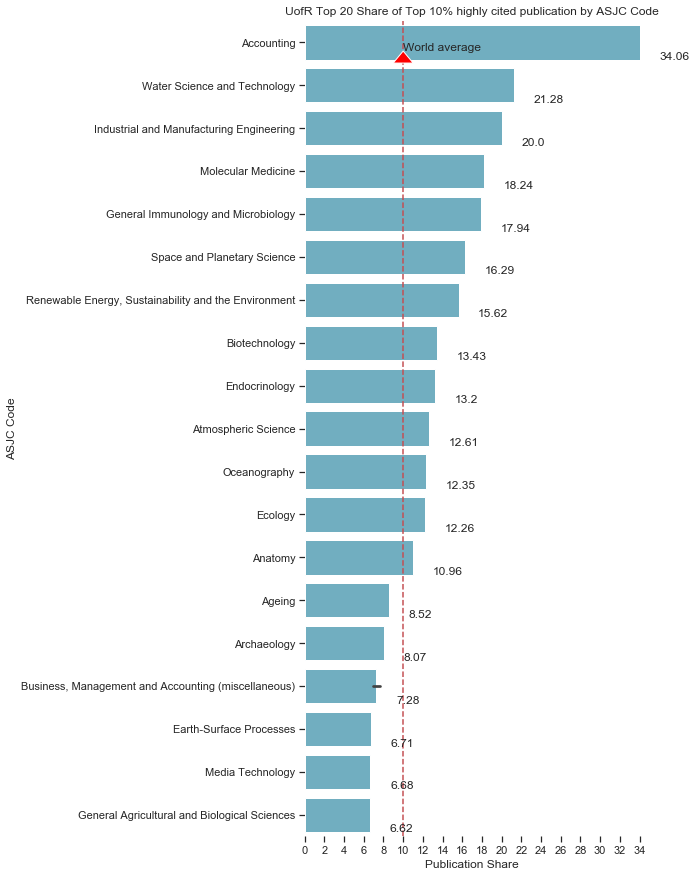

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
sns.set_style("ticks", {"xtick.major.size": 1, "ytick.major.size": 1})

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes()
g=sns.barplot(x='publs_share_top10', y='asjc_description', data=publs_share_df_2, color="c")
plt.axvline(10, ls='--', color='r')

plt.annotate('World average', xy=(10,0.2), arrowprops=dict(facecolor='red', shrink=0.05, headwidth=20, width=7))

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 10), ylabel="ASJC Code", xlabel='Publication Share')
plt.xticks(np.arange(0, 35, step=2))
sns.despine(left=True, bottom=True)
plt.title("UofR Top 20 Share of Top 10% highly cited publication by ASJC Code")
show_values_on_bars_1(g, "h", 2)
plt.show()

# Field-weighted citation impact by ASJC

In [159]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code\FWCI"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code\FWCI


In [160]:
data=pd.read_csv("UR_FWCI_Versus_ASJC.csv")

In [162]:
data=data[['ASJC Code','FWCI']]

In [163]:
data.head()

,ASJC Code,FWCI
0,1100,2.724823
1,1101,2.451854
2,1107,0.641735
3,1109,1.022686
4,1111,1.061104


In [164]:
ASJC.head()

,asjc_code,asjc_description
0,1000,Multidisciplinary
1,1100,General Agricultural and Biological Sciences
2,1101,Agricultural and Biological Sciences (miscella...
3,1102,Agronomy and Crop Science
4,1103,Animal Science and Zoology


In [165]:
match=pd.merge(data, ASJC, left_on='ASJC Code', right_on='asjc_code', how='inner')

In [166]:
match.head()

,ASJC Code,FWCI,asjc_code,asjc_description
0,1100,2.724823,1100,General Agricultural and Biological Sciences
1,1101,2.451854,1101,Agricultural and Biological Sciences (miscella...
2,1107,0.641735,1107,Forestry
3,1109,1.022686,1109,Insect Science
4,1111,1.061104,1111,Soil Science


In [167]:
data['asjc_description']=match.asjc_description

In [168]:
data.head()

,ASJC Code,FWCI,asjc_description
0,1100,2.724823,General Agricultural and Biological Sciences
1,1101,2.451854,Agricultural and Biological Sciences (miscella...
2,1107,0.641735,Forestry
3,1109,1.022686,Insect Science
4,1111,1.061104,Soil Science


In [170]:
data=data.sort_values(by='FWCI', ascending=False)

In [171]:
data.reset_index(inplace=True, drop=True)

In [172]:
data.head()

,ASJC Code,FWCI,asjc_description
0,2737,20.713076,Physiology (medical)
1,1310,5.753347,Endocrinology
2,2725,5.341298,Infectious Diseases
3,1204,3.674453,Archaeology
4,2915,3.504987,Nurse Assisting


In [175]:
data.FWCI=round(data.FWCI,2)

In [184]:
plotdata=data.head(50)

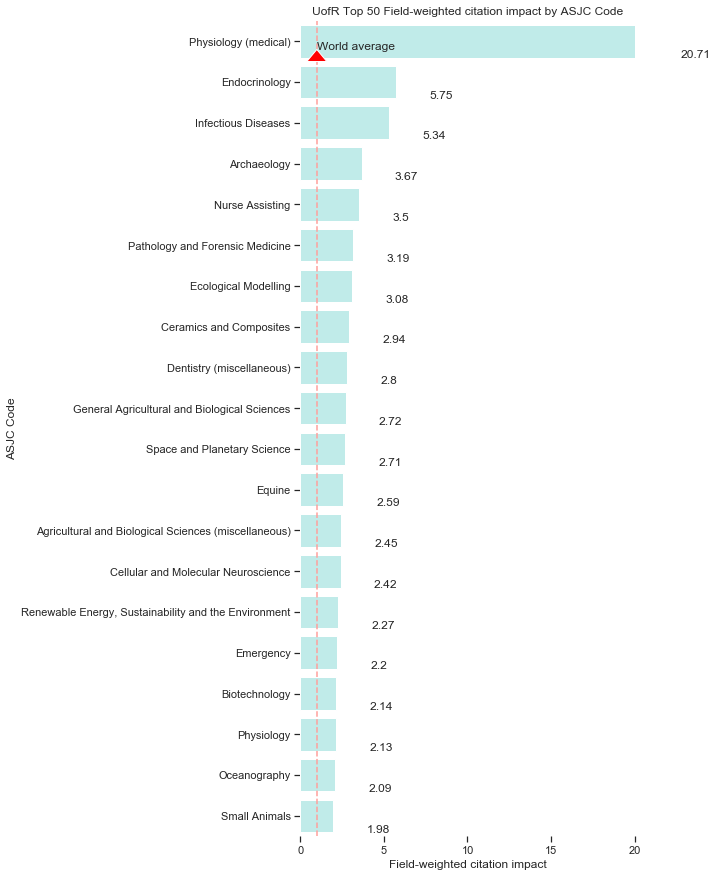

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
sns.set_style("ticks", {"xtick.major.size": 5, "ytick.major.size": 1})

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
g=sns.barplot(x='FWCI', y='asjc_description', data=plotdata, color="c")
plt.axvline(1.0, ls='--', color='r')

plt.annotate('World average', xy=(1.0,0.2), arrowprops=dict(facecolor='red', shrink=0.05, headwidth=20, width=7))

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 10), ylabel="ASJC Code", xlabel='Field-weighted citation impact')
plt.xticks(np.arange(0, 25, step=5))
sns.despine(left=True, bottom=True)
plt.title("UofR Top 50 Field-weighted citation impact by ASJC Code")
show_values_on_bars_1(g, "h", 2)
plt.show()

# UofR publication output by ASJC

In [195]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code\ASJC Versus ScholarlyOutput"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code\ASJC Versus ScholarlyOutput


In [221]:
data=pd.read_csv("UR_ASJC_ScholarlyOutput.csv")

In [222]:
data=data[['ASJC Code','OverallScholarlyOutput']]

In [223]:
data.head()

,ASJC Code,OverallScholarlyOutput
0,1100,868
1,1101,151
2,1107,1247
3,1109,936
4,1111,1065


In [224]:
match=pd.merge(data, ASJC, left_on='ASJC Code', right_on='asjc_code', how='inner')

In [225]:
data['asjc_description']=match.asjc_description

In [226]:
data.head()

,ASJC Code,OverallScholarlyOutput,asjc_description
0,1100,868,General Agricultural and Biological Sciences
1,1101,151,Agricultural and Biological Sciences (miscella...
2,1107,1247,Forestry
3,1109,936,Insect Science
4,1111,1065,Soil Science


In [227]:
data=data.sort_values(by='OverallScholarlyOutput', ascending=False)

In [229]:
data.reset_index(inplace=True, drop=True)

In [218]:
data=data

In [230]:
data.tail()

,ASJC Code,OverallScholarlyOutput,asjc_description
63,2503,386,Ceramics and Composites
64,1707,343,Computer Vision and Pattern Recognition
65,2312,323,Water Science and Technology
66,2602,298,Algebra and Number Theory
67,1101,151,Agricultural and Biological Sciences (miscella...


In [232]:
data2=data.iloc[:50,:]

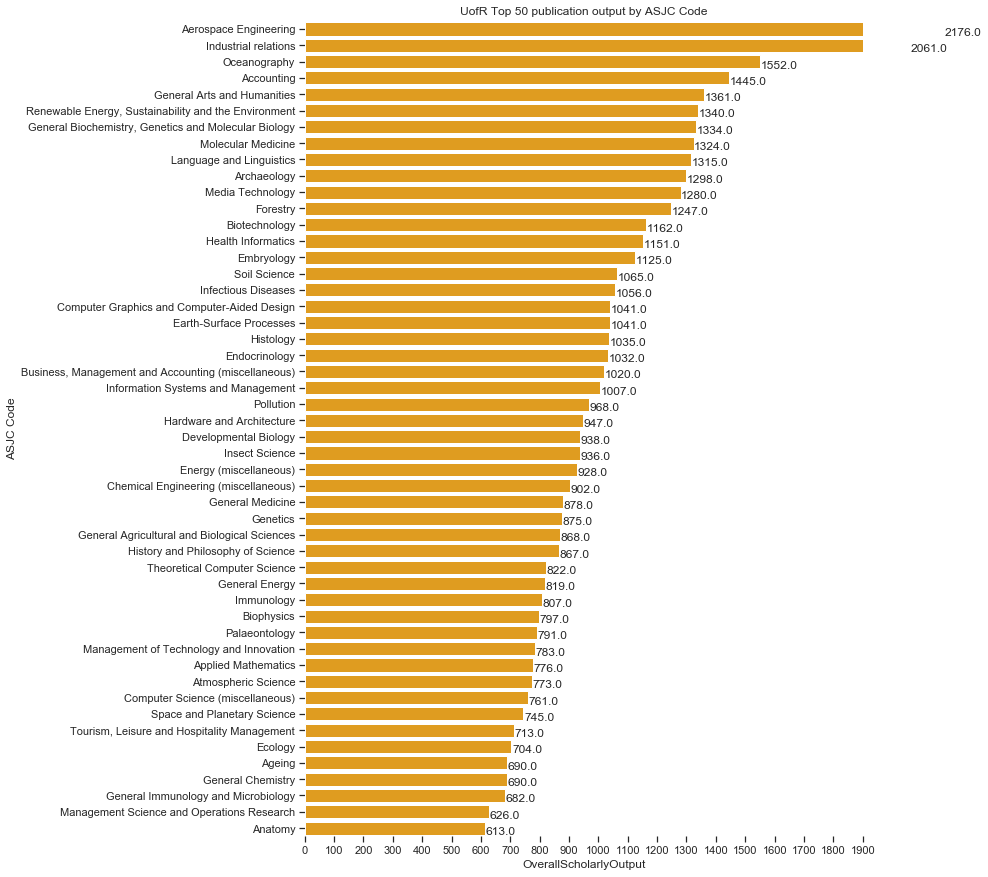

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
sns.set_style("ticks", {"xtick.major.size": 3, "ytick.major.size": 3})

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
g=sns.barplot(x='OverallScholarlyOutput', y='asjc_description', data=data2, color="orange")
#plt.axvline(1.0, ls='--', color='r')

#plt.annotate('World average', xy=(1.0,0.2), arrowprops=dict(facecolor='red', shrink=0.05, headwidth=20, width=7))

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 200), ylabel="ASJC Code", xlabel='OverallScholarlyOutput')
plt.xticks(np.arange(0, 2000 , step=100))
sns.despine(left=True, bottom=True)
plt.title("UofR Top 50 publication output by ASJC Code")
show_values_on_bars_1(g, "h", 2)
plt.show()

# UofR CitationCount Versus ASJC 

In [238]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code\ASJCVersusCitationCount"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code\ASJCVersusCitationCount


In [239]:
data=pd.read_csv("UR_ASJC_CitationCount.csv")

In [241]:
data=data[['ASJC Code','CitationCount']]

In [242]:
data.head()

,ASJC Code,CitationCount
0,1100,19
1,1101,23
2,1107,4
3,1109,17
4,1111,5


In [243]:
match=pd.merge(data, ASJC, left_on='ASJC Code', right_on='asjc_code', how='inner')

In [244]:
match.head()

,ASJC Code,CitationCount,asjc_code,asjc_description
0,1100,19,1100,General Agricultural and Biological Sciences
1,1101,23,1101,Agricultural and Biological Sciences (miscella...
2,1107,4,1107,Forestry
3,1109,17,1109,Insect Science
4,1111,5,1111,Soil Science


In [245]:
data['asjc_description']=match.asjc_description

In [246]:
data.head()

,ASJC Code,CitationCount,asjc_description
0,1100,19,General Agricultural and Biological Sciences
1,1101,23,Agricultural and Biological Sciences (miscella...
2,1107,4,Forestry
3,1109,17,Insect Science
4,1111,5,Soil Science


In [247]:
data=data.sort_values(by='CitationCount', ascending=False)

In [248]:
data.reset_index(inplace=True, drop=True)

In [253]:
data.tail()

,ASJC Code,CitationCount,asjc_description
32,1313,2,Molecular Medicine
33,1200,2,General Arts and Humanities
34,1902,1,Atmospheric Science
35,1401,1,"Business, Management and Accounting (miscellan..."
36,1302,1,Ageing


In [250]:
len(data)

37

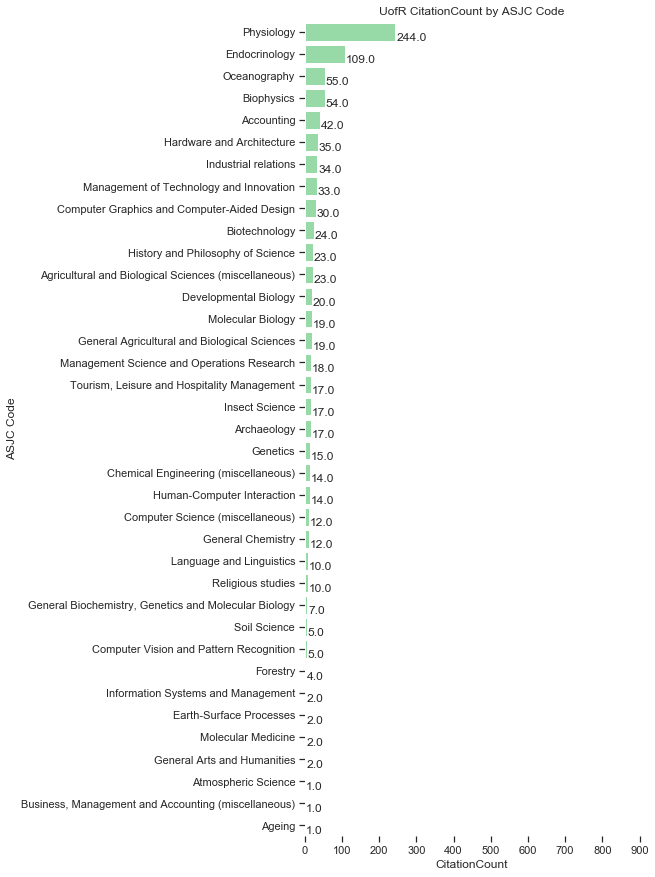

In [259]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
sns.set_style("ticks", {"xtick.major.size": 3, "ytick.major.size": 3})

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
g=sns.barplot(x='CitationCount', y='asjc_description', data=data, color="g")
#plt.axvline(1.0, ls='--', color='r')

#plt.annotate('World average', xy=(1.0,0.2), arrowprops=dict(facecolor='red', shrink=0.05, headwidth=20, width=7))

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 5), ylabel="ASJC Code", xlabel='CitationCount')
plt.xticks(np.arange(0, 1000 , step=100))
sns.despine(left=True, bottom=True)
plt.title("UofR CitationCount by ASJC Code")
show_values_on_bars_1(g, "h", 2)
plt.show()

In [428]:
source=[]
endyear=[]
startyear=[]
name=[]

for tid in topic_id[:2]:
    resp = requests.get(url.format(tid), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
    result=json.loads(parsed)
#result
    source.append(result['dataSource'])
    endyear.append(result['dataSource']['metricEndYear'])
    startyear.append(result['dataSource']['metricStartYear'])
    name.append(result['dataSource']['sourceName'])

Data_title=pd.DataFrame({'dataSource': source,
                        'metricEndYear':endyear,
                        'metricStartYear':startyear,
                        'sourceName':name})

Data_title.to_csv("ASJC_Data_Title.csv", index=False)

In [396]:
td=[]
metricType=[]
metricvalue=[]
link=[]
name=[]
ACode=[]
uri=[]
prominencePercentile=[]
scholarlyOutput=[]
overallScholarlyOutput=[]


for tid in topic_id[20:]:
    resp = requests.get(url.format(tid), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
    result=json.loads(parsed)
    with open("THE_UNI_ASJC_after20.json", "w") as json_file:
         json.dump(resp.json(), json_file)
#result
    td.append(tid)
    if result['results'] is None:
        metricType.append('')
        metricvalue.append('')
        link.append('')
        name.append('')
        ACode.append('')
        uri.append('')
        prominencePercentile.append('')
        scholarlyOutput.append('')
        overallScholarlyOutput.append('')
    else:
        if len(result['results']) >=1:
            if "metrics" in result['results'][0]:
                metricType.append(result['results'][0]["metrics"][0]["metricType"])
                metricvalue.append(result['results'][0]["metrics"][0]["value"])
            if "topic" in result['results'][0]:
                link.append(result['results'][0]["topic"]["link"])
                name.append(result['results'][0]["topic"]["name"])
                Acode.append(result['results'][0]["topic"]["id"])
                uri.append(result['results'][0]["topic"]["uri"])
                prominencePercentile.append(result['results'][0]["topic"]["prominencePercentile"])
                scholarlyOutput.append(result['results'][0]["topic"]["scholarlyOutput"])
                overallScholarlyOutput.append(result['results'][0]["topic"]["overallScholarlyOutput"])
                
s1=pd.Series(td, name='Topic_ID')
s2=pd.Series(metricType, name='metricType')
s3=pd.Series(metricvalue, name='metricvalue')
s4=pd.Series(link, name='link')
s5=pd.Series(name, name='name')
s6=pd.Series(Acode, name='ACode')
s7=pd.Series(uri, name='uri')
s8=pd.Series(prominencePercentile, name='prominencePercentile')
s9=pd.Series(scholarlyOutput, name='scholarlyOutput')
s10=pd.Series(overallScholarlyOutput, name='overallScholarlyOutput')

ASJC_20=pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10], axis=1)

ASJC_20.to_csv("ASJC_after20.csv", index=False)

#DF=pd.DataFrame({'Topic_ID':td,
#                 'metricType':metricType,
#                 'metricvalue':metricvalue,
#                 'link':link,
#                 'name':name,
#                 'ACode':ACode,
#                 'uri':uri,
#                 'prominencePercentile':prominencePercentile,
#                 'scholarlyOutput':scholarlyOutput,
#                 'overallScholarlyOutput':overallScholarlyOutput
#                })

#DF.to_csv("ASJC_TID20.csv", index=False)

#with open("THE_UNI_ASJC_after20.json", "w") as json_file:
#    json.dump(resp.json(), json_file)

In [398]:
UR_ASJC_1=pd.read_csv("ASJC_20.csv")

In [399]:
UR_ASJC_1.head()

,Topic_ID,metricType,metricvalue,link,name,ACode,uri,prominencePercentile,scholarlyOutput,overallScholarlyOutput
0,1000,ScholarlyOutput,1.0,{'@href': 'https://api.elsevier.com/analytics/...,Time; Time Perception; Temporal bisection,1100.0,Topic/1100,94.983770,1.0,868.0
1,1100,ScholarlyOutput,1.0,{'@href': 'https://api.elsevier.com/analytics/...,Intubation; Laryngoscopes; Video laryngoscopy,1200.0,Topic/1200,94.222880,1.0,1361.0
2,1200,ScholarlyOutput,2.0,{'@href': 'https://api.elsevier.com/analytics/...,Speech enhancement; Speech; Binary mask,1300.0,Topic/1300,95.479546,2.0,1334.0
3,1300,ScholarlyOutput,3.0,{'@href': 'https://api.elsevier.com/analytics/...,Acromegaly; Patients; Acromegalic patients,1600.0,Topic/1600,93.386840,3.0,690.0
4,1400,ScholarlyOutput,1.0,{'@href': 'https://api.elsevier.com/analytics/...,"Glaucoma, Angle-Closure; Anterior Chamber; Gla...",2100.0,Topic/2100,89.228570,1.0,819.0


In [400]:
UR_ASJC_2=pd.read_csv("ASJC_after20.csv")

In [401]:
UR_ASJC_2.head()

,Topic_ID,metricType,metricvalue,link,name,ACode,uri,prominencePercentile,scholarlyOutput,overallScholarlyOutput
0,3000.0,ScholarlyOutput,1.0,{'@href': 'https://api.elsevier.com/analytics/...,Staphylococcus aureus; Enterotoxins; Staphyloc...,1100,Topic/3100,90.867250,1.0,582.0
1,3100.0,ScholarlyOutput,2.0,{'@href': 'https://api.elsevier.com/analytics/...,Activities of Daily Living; Health; Healthy life,1200,Topic/3300,94.985855,2.0,725.0
2,3200.0,ScholarlyOutput,2.0,{'@href': 'https://api.elsevier.com/analytics/...,Stars; Distance; RRab stars,1300,Topic/3500,95.439890,2.0,520.0
3,3300.0,NaN,NaN,NaN,NaN,1600,NaN,NaN,NaN,NaN
4,3400.0,NaN,NaN,NaN,NaN,2100,NaN,NaN,NaN,NaN


In [403]:
del UR_ASJC_1['Topic_ID']

In [405]:
del UR_ASJC_1['ACode']

In [406]:
del UR_ASJC_2['Topic_ID']

In [407]:
del UR_ASJC_2['ACode']

In [409]:
UR_ASJC_1=UR_ASJC_1.dropna()

In [410]:
UR_ASJC_2=UR_ASJC_2.dropna()

In [412]:
UR_ASJC=pd.concat([UR_ASJC_1, UR_ASJC_2])

In [413]:
UR_ASJC.head()

,metricType,metricvalue,link,name,uri,prominencePercentile,scholarlyOutput,overallScholarlyOutput
0,ScholarlyOutput,1.0,{'@href': 'https://api.elsevier.com/analytics/...,Time; Time Perception; Temporal bisection,Topic/1100,94.983770,1.0,868.0
1,ScholarlyOutput,1.0,{'@href': 'https://api.elsevier.com/analytics/...,Intubation; Laryngoscopes; Video laryngoscopy,Topic/1200,94.222880,1.0,1361.0
2,ScholarlyOutput,2.0,{'@href': 'https://api.elsevier.com/analytics/...,Speech enhancement; Speech; Binary mask,Topic/1300,95.479546,2.0,1334.0
3,ScholarlyOutput,3.0,{'@href': 'https://api.elsevier.com/analytics/...,Acromegaly; Patients; Acromegalic patients,Topic/1600,93.386840,3.0,690.0
4,ScholarlyOutput,1.0,{'@href': 'https://api.elsevier.com/analytics/...,"Glaucoma, Angle-Closure; Anterior Chamber; Gla...",Topic/2100,89.228570,1.0,819.0


In [419]:
chuck=[]
for line in UR_ASJC.uri:
    chuck.append(str(line).split('/')[1])
UR_ASJC['ASJC_Code']=chuck

In [420]:
UR_ASJC.head()

,metricType,metricvalue,link,name,uri,prominencePercentile,scholarlyOutput,overallScholarlyOutput,ASJC_Code
0,ScholarlyOutput,1.0,{'@href': 'https://api.elsevier.com/analytics/...,Time; Time Perception; Temporal bisection,Topic/1100,94.983770,1.0,868.0,1100
1,ScholarlyOutput,1.0,{'@href': 'https://api.elsevier.com/analytics/...,Intubation; Laryngoscopes; Video laryngoscopy,Topic/1200,94.222880,1.0,1361.0,1200
2,ScholarlyOutput,2.0,{'@href': 'https://api.elsevier.com/analytics/...,Speech enhancement; Speech; Binary mask,Topic/1300,95.479546,2.0,1334.0,1300
3,ScholarlyOutput,3.0,{'@href': 'https://api.elsevier.com/analytics/...,Acromegaly; Patients; Acromegalic patients,Topic/1600,93.386840,3.0,690.0,1600
4,ScholarlyOutput,1.0,{'@href': 'https://api.elsevier.com/analytics/...,"Glaucoma, Angle-Closure; Anterior Chamber; Gla...",Topic/2100,89.228570,1.0,819.0,2100


In [421]:
UR_ASJC=UR_ASJC.loc[:][['ASJC_Code','metricType','name','link','uri','prominencePercentile','scholarlyOutput','overallScholarlyOutput']]

In [422]:
UR_ASJC

,ASJC_Code,metricType,name,link,uri,prominencePercentile,scholarlyOutput,overallScholarlyOutput
0,1100,ScholarlyOutput,Time; Time Perception; Temporal bisection,{'@href': 'https://api.elsevier.com/analytics/...,Topic/1100,94.983770,1.0,868.0
1,1200,ScholarlyOutput,Intubation; Laryngoscopes; Video laryngoscopy,{'@href': 'https://api.elsevier.com/analytics/...,Topic/1200,94.222880,1.0,1361.0
2,1300,ScholarlyOutput,Speech enhancement; Speech; Binary mask,{'@href': 'https://api.elsevier.com/analytics/...,Topic/1300,95.479546,2.0,1334.0
3,1600,ScholarlyOutput,Acromegaly; Patients; Acromegalic patients,{'@href': 'https://api.elsevier.com/analytics/...,Topic/1600,93.386840,3.0,690.0
4,2100,ScholarlyOutput,"Glaucoma, Angle-Closure; Anterior Chamber; Gla...",{'@href': 'https://api.elsevier.com/analytics/...,Topic/2100,89.228570,1.0,819.0
5,2400,ScholarlyOutput,Pharmaceutical Preparations; Electrocardiograp...,{'@href': 'https://api.elsevier.com/analytics/...,Topic/2400,93.968210,9.0,682.0
6,2700,ScholarlyOutput,Maximum likelihood estimation; Maximum likelih...,{'@href': 'https://api.elsevier.com/analytics/...,Topic/2700,89.025040,1.0,878.0
0,3100,ScholarlyOutput,Staphylococcus aureus; Enterotoxins; Staphyloc...,{'@href': 'https://api.elsevier.com/analytics/...,Topic/3100,90.867250,1.0,582.0
1,3300,ScholarlyOutput,Activities of Daily Living; Health; Healthy life,{'@href': 'https://api.elsevier.com/analytics/...,Topic/3300,94.985855,2.0,725.0
2,3500,ScholarlyOutput,Stars; Distance; RRab stars,{'@href': 'https://api.elsevier.com/analytics/...,Topic/3500,95.439890,2.0,520.0


In [423]:
UR_ASJC.to_csv("UR_ASJC_0110.csv", index=False)

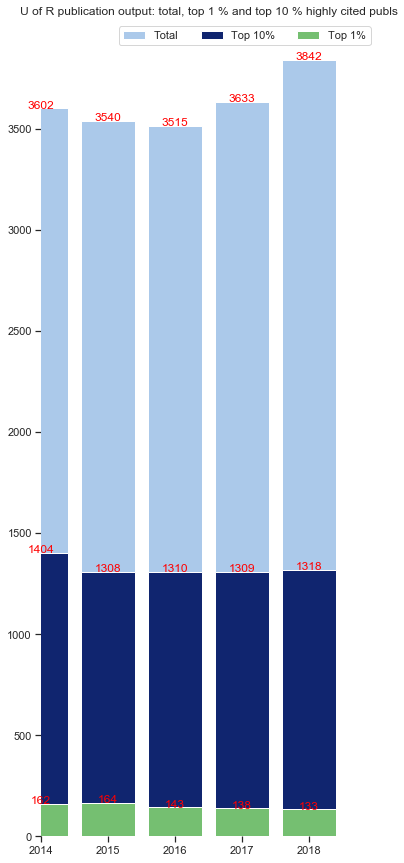

In [1024]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
sns.set_style("ticks", {"xtick.major.size": 10, "ytick.major.size": 8})

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
g=sns.barplot(data=A,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("dark")
g=sns.barplot(data=B,
            label="Top 10%", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
g=sns.barplot(data=C,
            label="Top 1%", color="g")

show_values_on_bars(g, "v", 0.8)

# Add a legend and informative axis label
plt.yticks(np.arange(0, 4000, step=500))
plt.xticks(np.arange(5), ('2014', '2015', '2016', '2017', '2018'))
ax.legend(ncol=3, loc="upper right", frameon=True)
ax.set(xlim=(0,5), ylabel="",
       title="U of R publication output: total, top 1 % and top 10 % highly cited publs")
sns.despine(left=True, bottom=True)

In [329]:

for item in inst_ids.institution_id[20:22]:
#    for tid in topic_id[20:100]:
    resp = requests.get(url.format(item), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
    result=json.loads(parsed)
result

{'dataSource': {'lastUpdated': '2020-01-01',
  'metricEndYear': 2018,
  'metricStartYear': 2014,
  'sourceName': 'Scopus'},
 'link': {'@href': 'https://api.elsevier.com/analytics/scival/topic/metrics/institutionId/508166?metricTypes=ScholarlyOutput&yearRange=5yrs',
  '@ref': 'self',
  '@type': 'application/json'},
 'results': [{'metrics': [{'metricType': 'ScholarlyOutput', 'value': 8}],
   'topic': {'id': 0,
    'link': {'@href': 'https://api.elsevier.com/analytics/scival/topic/0',
     '@ref': 'self',
     '@type': 'application/json'},
    'name': 'Solar cells; Fullerenes; Organic photovoltaics',
    'overallScholarlyOutput': 9500,
    'prominencePercentile': 99.98956,
    'scholarlyOutput': 8,
    'uri': 'Topic/0'}}]}

In [303]:
with open("THE_UNI_Versus_ASJC.json") as output:
    data=json.load(output)

In [330]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ASJC Code


In [341]:
url

'https://api.elsevier.com/analytics/scival/topic/metrics/institutionId/{}?topicId={}&metricTypes=ScholarlyOutput&yearRange=5yrs'

[]

In [346]:
for item in inst_ids.institution_id[:5]:
    for tid in topic_id:

In [336]:
inst_id=[]
topic_id=[]
metrics=[]
metrics_value=[]
link=[]
name=[]
Acode=[]
uri=[]
prominencePercentile=[]
scholarlyOutput=[]
overallScholarlyOutput=[]

for item in inst_ids.institution_id[:5]:
    for tid in topic_id[:5]:
        resp = requests.get(url.format(item, tid), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
        parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
        data=json.loads(parsed)
data

{'link': {'@ref': 'self',
  '@href': 'https://api.elsevier.com/analytics/scival/topic/metrics/institutionId/508021?topicId=1100&metricTypes=ScholarlyOutput&yearRange=5yrs',
  '@type': 'application/json'},
 'dataSource': {'sourceName': 'Scopus',
  'lastUpdated': '2020-01-01',
  'metricStartYear': 2014,
  'metricEndYear': 2018},
 'results': [{'metrics': [{'metricType': 'ScholarlyOutput', 'value': 2}],
   'topic': {'link': {'@ref': 'self',
     '@href': 'https://api.elsevier.com/analytics/scival/topic/1100',
     '@type': 'application/json'},
    'name': 'Time; Time Perception; Temporal bisection',
    'id': 1100,
    'uri': 'Topic/1100',
    'prominencePercentile': 94.98377,
    'scholarlyOutput': 2,
    'overallScholarlyOutput': 868}}]}

In [332]:
inst_id=[]
topic_id=[]
metrics=[]
metrics_value=[]
link=[]
name=[]
Acode=[]
uri=[]
prominencePercentile=[]
scholarlyOutput=[]
overallScholarlyOutput=[]

for item in inst_ids.institution_id[:5]:
    for tid in topic_id[:5]:
        resp = requests.get(url.format(item, tid), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
        parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
        data=json.loads(parsed)
        inst_id.append(item)
        topic_id.append(tid)
        link.append(data['link'])
        if len(data['results']) >=1:
            if 'metrics' in data['results'][0]:
                if len(data['results'][0]['metrics']) >=1:
                    metrics.append(data['results'][0]['metrics'][0]['metricType'])
                    metrics_value.append(data['results'][0]['metrics'][0]['value'])
            if 'topic' in data['results'][0]:
                if len(data['results'][0]['topic']) >=1:
                    name.append(data['results'][0]['topic']['name'])
                    Acode.append(data['results'][0]['topic']['id'])
                    uri.append(data['results'][0]['topic']['uri'])
                    prominencePercentile.append(data['results'][0]['topic']['prominencePercentile'])
                    scholarlyOutput.append(data['results'][0]['topic']['scholarlyOutput'])
                    overallScholarlyOutput.append(data['results'][0]['topic']['scholarlyOutput'])  
                    
s1=pd.Series(inst_id, name="inst_id")
s2=pd.Series(topic_id, name="topic_id")
s3=pd.Series(metrics, name="metrics")
s4=pd.Series(metrics_value, name="metrics_value")
s5=pd.Series(link, name="link")
s6=pd.Series(name, name="name")
s7=pd.Series(Acode, name="Acode")
s8=pd.Series(uri, name="uri")
s9=pd.Series(prominencePercentile, name="prominencePercentile")
s10=pd.Series(scholarlyOutput, name="scholarlyOutput")
s11=pd.Series(overallScholarlyOutput, name="overallScholarlyOutput")
        
DF=pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11], axis=1)
DF.to_csv("TEST.csv", index=False)
#with open("THE_UNI_Versus_ASJC_Test.json", 'w') as json_file:
#    json.dump(resp.json(), json_file)



In [325]:
inst_id=[]
topic_id=[]
metrics=[]
metrics_value=[]
link=[]
name=[]
Acode=[]
uri=[]
prominencePercentile=[]
scholarlyOutput=[]
overallScholarlyOutput=[]

data

{'link': {'@ref': 'self',
  '@href': 'https://api.elsevier.com/analytics/scival/topic/metrics/institutionId/508021?topicId=1100&metricTypes=ScholarlyOutput&yearRange=5yrs',
  '@type': 'application/json'},
 'dataSource': {'sourceName': 'Scopus',
  'lastUpdated': '2020-01-01',
  'metricStartYear': 2014,
  'metricEndYear': 2018},
 'results': [{'metrics': [{'metricType': 'ScholarlyOutput', 'value': 2}],
   'topic': {'link': {'@ref': 'self',
     '@href': 'https://api.elsevier.com/analytics/scival/topic/1100',
     '@type': 'application/json'},
    'name': 'Time; Time Perception; Temporal bisection',
    'id': 1100,
    'uri': 'Topic/1100',
    'prominencePercentile': 94.98377,
    'scholarlyOutput': 2,
    'overallScholarlyOutput': 868}}]}

# Comparatory analysis: research performance profile

In [239]:
UR_Peer_FWCI.institution_name

8                 Stanford University
3                    Emory University
6            Johns Hopkins University
2                     Duke University
4             Northwestern University
11         University of Pennsylvania
0                   Boston University
7                 New York University
10              University of Chicago
1     Case Western Reserve University
5               Vanderbilt University
12            University of Rochester
9                   Tulane University
Name: institution_name, dtype: object

In [240]:
so_data_USA.head()

,institution_name,2014,2015,2016,2017,2018,Total
0,"Jet Propulsion Laboratory, California Institut...",1913,1800,2181,2052,2200,10146
1,California Institute of Technology,4518,4347,4553,4567,4884,22869
2,Stanford University,12801,13656,13664,14233,14729,69083
3,Massachusetts Institute of Technology,9645,9957,10023,10191,10458,50274
4,Princeton University,4335,4629,4544,4635,4891,23034


In [800]:
chuck=[]

for name in UR_Peer_FWCI.institution_name:
    chuck.append(so_data_USA[so_data_USA.institution_name==name])

In [241]:
Ttl_publs_output=pd.concat(chuck, ignore_index=True)

In [243]:
Ttl_publs_output.head()

,country,countryCode,institution_id,link,institution_name,metricType,2014,2015,2016,2017,2018
0,United States,USA,508013,{'@href': 'https://api.elsevier.com/analytics/...,Boston University,FieldWeightedCitationImpact,2.102325,2.017788,2.082099,1.699757,1.916557
1,United States,USA,508032,{'@href': 'https://api.elsevier.com/analytics/...,Case Western Reserve University,FieldWeightedCitationImpact,1.785904,1.952037,1.955858,1.773011,1.861512
2,United States,USA,508053,{'@href': 'https://api.elsevier.com/analytics/...,Duke University,FieldWeightedCitationImpact,2.060966,2.188656,1.971610,1.903780,1.848280
3,United States,USA,508059,{'@href': 'https://api.elsevier.com/analytics/...,Emory University,FieldWeightedCitationImpact,1.999690,2.186228,2.209265,1.948478,1.967104
4,United States,USA,508175,{'@href': 'https://api.elsevier.com/analytics/...,Northwestern University,FieldWeightedCitationImpact,1.814437,2.036129,2.104611,2.028618,1.968102


In [244]:
Ttl_publs_output['Total']=Ttl_publs_output.sum(axis=1)

In [245]:
A=Ttl_publs_output[['institution_name','Total']]

In [246]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PercPublsCited"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PercPublsCited


In [247]:
ALL_PP=pd.read_csv("THEUNI_CITEDPUBLS.csv")

In [248]:
ALL_PP.head()

,country,countryCode,institution_id,link,institution_name,metricType,2014,2015,2016,2017,2018,percent2014,percent2015,percent2016,percent2017,percent2018
0,United Kingdom,GBR,315091,{'@href': 'https://api.elsevier.com/analytics/...,University of Oxford,CitedPublications,10893.0,11679.0,11798.0,11474.0,10570.0,86.555420,85.53537,84.115210,78.56213,70.69761
1,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",CitedPublications,1514.0,1451.0,1722.0,1588.0,1406.0,79.142710,80.61111,78.954605,77.38792,63.90909
2,United States,USA,508021,{'@href': 'https://api.elsevier.com/analytics/...,California Institute of Technology,CitedPublications,3879.0,3770.0,3914.0,3779.0,3487.0,85.856575,86.72648,85.965300,82.74578,71.39640
3,United Kingdom,GBR,315068,{'@href': 'https://api.elsevier.com/analytics/...,University of Cambridge,CitedPublications,9116.0,9238.0,9558.0,9125.0,8418.0,88.060280,86.17537,84.330330,79.49991,71.42372
4,United States,USA,508219,{'@href': 'https://api.elsevier.com/analytics/...,Stanford University,CitedPublications,11156.0,11846.0,11699.0,11642.0,10731.0,87.149445,86.74575,85.619150,81.79583,72.85627


In [249]:
ALL_PP.tail()

,country,countryCode,institution_id,link,institution_name,metricType,2014,2015,2016,2017,2018,percent2014,percent2015,percent2016,percent2017,percent2018
1263,Saudi Arabia,SAU,703099,{'@href': 'https://api.elsevier.com/analytics/...,Imam Abdulrahman Bin Faisal University,CitedPublications,296.0,305.0,364.0,384.0,560.0,79.78437,75.495056,79.302826,66.435990,59.447987
1264,Turkey,TUR,705124,{'@href': 'https://api.elsevier.com/analytics/...,Istanbul Medipol University,CitedPublications,203.0,293.0,295.0,262.0,207.0,78.07692,72.524750,70.743410,62.679430,47.260273
1265,Georgia,GEO,204001,{'@href': 'https://api.elsevier.com/analytics/...,Ivane Javakhishvili Tbilisi State University,CitedPublications,295.0,347.0,383.0,342.0,366.0,65.84821,68.441810,66.034485,65.391970,60.098522
1266,United States,USA,508335,{'@href': 'https://api.elsevier.com/analytics/...,University of Rochester,CitedPublications,3011.0,2939.0,2919.0,2795.0,2649.0,83.59245,83.022600,83.044090,76.912490,68.948460
1267,United States,USA,508059,{'@href': 'https://api.elsevier.com/analytics/...,Emory University,CitedPublications,5206.0,5230.0,5187.0,5126.0,4687.0,88.08799,87.810610,84.977066,80.992256,72.252200


In [250]:
US_PP=ALL_PP[ALL_PP.countryCode=='USA']

In [251]:
chuck=[]

for name in UR_Peer_FWCI.institution_name:
    chuck.append(US_PP[US_PP.institution_name==name])

In [252]:
UR_Peer_PP=pd.concat(chuck, ignore_index=True)

In [253]:
UR_Peer_PP=UR_Peer_PP[['institution_name','percent2014','percent2015','percent2016','percent2017','percent2018']]

In [254]:
UR_Peer_PP=UR_Peer_PP.drop_duplicates()

In [255]:
UR_Peer_PP.shape[0]

13

In [256]:
UR_Peer_PP.loc[:]['UniAbbr']=abb

In [257]:
UR_Peer_PP.loc[:]['Mean_%PubCited']=UR_Peer_PP.iloc[:,1:5].mean(axis=1)

In [258]:
UR_Peer_PP

,institution_name,percent2014,percent2015,percent2016,percent2017,percent2018
0,Stanford University,87.149445,86.745750,85.619150,81.795830,72.856270
1,Emory University,88.087990,87.810610,84.977066,80.992256,72.252200
2,Johns Hopkins University,89.002870,87.677800,86.510290,82.894350,73.282555
3,Duke University,88.075410,86.854250,85.007920,81.594154,71.465890
4,Northwestern University,86.777405,86.313380,85.312300,82.407074,71.779500
6,University of Pennsylvania,87.413540,85.737160,83.930275,80.257805,69.561550
7,Boston University,86.645850,87.164610,84.995610,80.863884,71.050520
8,New York University,85.079050,83.887920,81.683710,77.177086,66.417710
10,University of Chicago,84.766730,82.955670,83.135560,78.535040,71.705900
11,Case Western Reserve University,84.712010,83.535610,83.017590,77.285620,67.933495


In [259]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PercPublsCited"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PercPublsCited


In [261]:
UR_Peer_PP['Mean_%PubCited']=UR_Peer_PP.mean(axis=1)

In [262]:
UR_Peer_PP=UR_Peer_PP.sort_values(by='Mean_%PubCited', ascending=False)

In [263]:
UR_Peer_PP.reset_index(inplace=True, drop=True)

In [264]:
C=UR_Peer_PP[['institution_name','Mean_%PubCited']]

In [265]:
UR_Peer_PP.to_csv("UofR_Global_Peers_Cited_Publs.csv", index=False)

In [836]:
# Top 1 % cited


In [266]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PubTopJournalPercentile"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PubTopJournalPercentile


In [267]:
Top1All=pd.read_csv("THE_ALLUNI_PP.csv")

In [268]:
Top1All.columns

Index(['country', 'countryCode', 'institution_id', 'link', 'institution_name',
       'metricType', 't1_2014', 't1_2015', 't1_2016', 't1_2017', 't1_2018',
       't1_percent2014', 't1_percent2015', 't1_percent2016', 't1_percent2017',
       't1_percent2018', 't5_2014', 't5_2015', 't5_2016', 't5_2017', 't5_2018',
       't5_percent2014', 't5_percent2015', 't5_percent2016', 't5_percent2017',
       't5_percent2018', 't10_2014', 't10_2015', 't10_2016', 't10_2017',
       't10_2018', 't10_percent2014', 't10_percent2015', 't10_percent2016',
       't10_percent2017', 't10_percent2018', 't25_2014', 't25_2015',
       't25_2016', 't25_2017', 't25_2018', 't25_percent2014',
       't25_percent2015', 't25_percent2016', 't25_percent2017',
       't25_percent2018'],
      dtype='object')

In [269]:
Top1All.tail()

,country,countryCode,institution_id,link,institution_name,metricType,t1_2014,t1_2015,t1_2016,t1_2017,...,t25_2014,t25_2015,t25_2016,t25_2017,t25_2018,t25_percent2014,t25_percent2015,t25_percent2016,t25_percent2017,t25_percent2018
1265,Saudi Arabia,SAU,703099,{'@href': 'https://api.elsevier.com/analytics/...,Imam Abdulrahman Bin Faisal University,PublicationsInTopJournalPercentiles,1.0,2.0,5.0,6.0,...,87.0,103.0,140.0,198.0,353.0,26.605505,29.428572,34.567900,38.521400,40.762123
1266,Turkey,TUR,705124,{'@href': 'https://api.elsevier.com/analytics/...,Istanbul Medipol University,PublicationsInTopJournalPercentiles,3.0,2.0,2.0,5.0,...,67.0,106.0,77.0,99.0,90.0,27.800830,29.041096,20.810812,27.049181,25.210085
1267,Georgia,GEO,204001,{'@href': 'https://api.elsevier.com/analytics/...,Ivane Javakhishvili Tbilisi State University,PublicationsInTopJournalPercentiles,1.0,1.0,2.0,2.0,...,205.0,241.0,278.0,266.0,335.0,50.368546,53.200882,52.751423,55.416668,58.566433
1268,United States,USA,508335,{'@href': 'https://api.elsevier.com/analytics/...,University of Rochester,PublicationsInTopJournalPercentiles,162.0,164.0,143.0,138.0,...,2163.0,2125.0,2131.0,2130.0,2309.0,70.364340,69.331154,67.436710,66.645805,66.522610
1269,United States,USA,508059,{'@href': 'https://api.elsevier.com/analytics/...,Emory University,PublicationsInTopJournalPercentiles,277.0,348.0,318.0,348.0,...,3967.0,3923.0,3854.0,3975.0,4143.0,73.708660,72.246780,68.907560,67.407160,68.186310


In [270]:
Top1=Top1All[['institution_name','t1_percent2014','t1_percent2015','t1_percent2016','t1_percent2017','t1_percent2018']]

In [271]:
Top1=Top1.drop_duplicates()

In [272]:
Top1['Total_Top1']=Top1[['institution_name','t1_percent2014','t1_percent2015','t1_percent2016','t1_percent2017','t1_percent2018']].mean(axis=1)

In [273]:
Top1.head()

,institution_name,t1_percent2014,t1_percent2015,t1_percent2016,t1_percent2017,t1_percent2018,Total_Top1
0,University of Oxford,6.250000,7.244391,7.178117,6.104996,6.456400,6.646781
1,"Jet Propulsion Laboratory, California Institut...",4.939920,5.694445,4.605993,3.953229,6.402915,5.119300
4,California Institute of Technology,7.905651,6.580714,6.523930,6.254635,6.737181,6.800422
5,University of Cambridge,7.298050,7.159152,7.903886,7.334815,6.474752,7.234131
6,Stanford University,8.733065,8.676345,9.068627,8.334686,7.886435,8.539832


In [274]:
chuck=[]

for name in UR_Peer_FWCI.institution_name:
    chuck.append(Top1[Top1.institution_name==name])

In [275]:
UR_PEER_Top1=pd.concat(chuck, ignore_index=True)

In [276]:
UR_PEER_Top1=UR_PEER_Top1.sort_values(by='Total_Top1', ascending=False)

In [277]:
UR_PEER_Top1.reset_index(inplace=True, drop=True)

In [278]:
D=UR_PEER_Top1[['institution_name','Total_Top1']] # top1%

In [279]:
# top 10%

Top10=Top1All[['institution_name','t10_percent2014','t10_percent2015','t10_percent2016','t10_percent2017','t10_percent2018']]


In [280]:
Top10=Top10.drop_duplicates()

In [281]:
Top10['Total_Top10']=Top10[['institution_name','t10_percent2014','t10_percent2015','t10_percent2016','t10_percent2017','t10_percent2018']].mean(axis=1)

In [282]:
Top10.head()

,institution_name,t10_percent2014,t10_percent2015,t10_percent2016,t10_percent2017,t10_percent2018,Total_Top10
0,University of Oxford,48.004738,49.169380,47.268753,47.715576,46.048240,47.641337
1,"Jet Propulsion Laboratory, California Institut...",30.373833,33.541668,38.512764,38.251670,35.346176,35.205222
4,California Institute of Technology,44.297565,42.412033,51.662468,47.119900,45.228786,46.144150
5,University of Cambridge,48.022285,49.646930,50.010223,49.757526,47.258140,48.939021
6,Stanford University,50.878800,51.818962,50.490196,50.584324,48.526580,50.459772


In [283]:
Top10.tail()

,institution_name,t10_percent2014,t10_percent2015,t10_percent2016,t10_percent2017,t10_percent2018,Total_Top10
1258,Imam Abdulrahman Bin Faisal University,8.562691,9.142857,16.543210,14.007781,17.205542,13.092416
1259,Istanbul Medipol University,9.128631,8.767123,8.108108,12.841530,12.885155,10.346109
1260,Ivane Javakhishvili Tbilisi State University,33.906630,27.814570,35.294117,46.041668,47.727272,38.156851
1261,University of Rochester,45.673390,42.675365,41.455696,40.957447,37.971764,41.746732
1269,Emory University,44.797474,45.930020,41.981050,41.783960,39.335090,42.765519


In [284]:
chuck=[]

for name in UR_Peer_FWCI.institution_name:
    chuck.append(Top10[Top10.institution_name==name])

In [285]:
UR_PEER_Top10=pd.concat(chuck, ignore_index=True)

In [286]:
UR_PEER_Top10=UR_PEER_Top10.sort_values(by='Total_Top10', ascending=False)

In [287]:
UR_PEER_Top10.reset_index(inplace=True, drop=True)

In [288]:
E=UR_PEER_Top10[['institution_name','Total_Top10']]

In [301]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ScholarlyOutput"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ScholarlyOutput


In [303]:
# filter publication data for UR global peeer

In [305]:
so_data_USA.head()

,institution_name,2014,2015,2016,2017,2018,Total
0,"Jet Propulsion Laboratory, California Institut...",1913,1800,2181,2052,2200,10146
1,California Institute of Technology,4518,4347,4553,4567,4884,22869
2,Stanford University,12801,13656,13664,14233,14729,69083
3,Massachusetts Institute of Technology,9645,9957,10023,10191,10458,50274
4,Princeton University,4335,4629,4544,4635,4891,23034


In [306]:
chuck=[]

for name in UR_Peer_FWCI.institution_name:
    chuck.append(so_data_USA[so_data_USA.institution_name==name])

In [307]:
A=pd.concat(chuck, ignore_index=True)

In [308]:
A=A.drop_duplicates()

In [310]:
A=A.sort_values(by='Total', ascending=False)

In [311]:
A.head()

,institution_name,2014,2015,2016,2017,2018,Total
0,Stanford University,12801,13656,13664,14233,14729,69083
2,Johns Hopkins University,12185,12936,13173,13668,14047,66009
6,University of Pennsylvania,10988,11239,11531,11792,13023,58573
8,New York University,9108,9707,10073,10599,11247,50734
3,Duke University,8646,8885,8838,9171,9571,45111


In [319]:
A=A.iloc[:,[0,-1]]

In [320]:
A.reset_index(inplace=True, drop=True)

In [321]:
A.head()

,institution_name,Total
0,Stanford University,69083
1,Johns Hopkins University,66009
2,University of Pennsylvania,58573
3,New York University,50734
4,Duke University,45111


In [313]:
len(A)

13

In [312]:
C.head()

,institution_name,Mean_%PubCited
0,Johns Hopkins University,83.873573
1,Stanford University,82.833289
2,Emory University,82.824024
3,Duke University,82.599525
4,Northwestern University,82.517932


In [314]:
len(C)

13

In [315]:
D.head()

,institution_name,Total_Top1
0,Stanford University,8.539832
1,Northwestern University,7.651071
2,University of Chicago,7.156997
3,University of Pennsylvania,6.827791
4,Boston University,6.607170


In [317]:
len(E)

13

In [322]:
part1=A.join(C.set_index('institution_name'), on='institution_name')

In [323]:
part2=part1.join(D.set_index('institution_name'), on='institution_name')

In [324]:
part3=part2.join(E.set_index('institution_name'), on='institution_name')

In [325]:
part3

,institution_name,Total,Mean_%PubCited,Total_Top1,Total_Top10
0,Stanford University,69083,82.833289,8.539832,50.459772
1,Johns Hopkins University,66009,83.873573,5.689941,43.892943
2,University of Pennsylvania,58573,81.380066,6.827791,45.489412
3,New York University,50734,78.849095,5.585733,41.123320
4,Duke University,45111,82.599525,6.461731,46.996039
5,University of Chicago,44095,80.219780,7.156997,49.374273
6,Northwestern University,40315,82.517932,7.651071,48.214202
7,Vanderbilt University,31056,81.448279,5.699216,43.224036
8,Emory University,30786,82.824024,5.530431,42.765519
9,Boston University,28873,82.144095,6.607170,46.571934


In [326]:
B=UR_Peer_FWCI[['institution_name','AVERAGE_FWCI']]

In [327]:
B.head()

,institution_name,AVERAGE_FWCI
8,Stanford University,2.4008
3,Emory University,2.0622
6,Johns Hopkins University,2.0071
2,Duke University,1.9947
4,Northwestern University,1.9904


In [328]:
part4=part3.join(B.set_index('institution_name'), on='institution_name')

In [329]:
part4.sort_values(by='Total', ascending=False)

,institution_name,Total,Mean_%PubCited,Total_Top1,Total_Top10,AVERAGE_FWCI
0,Stanford University,69083,82.833289,8.539832,50.459772,2.4008
1,Johns Hopkins University,66009,83.873573,5.689941,43.892943,2.0071
2,University of Pennsylvania,58573,81.380066,6.827791,45.489412,1.9863
3,New York University,50734,78.849095,5.585733,41.123320,1.9356
4,Duke University,45111,82.599525,6.461731,46.996039,1.9947
5,University of Chicago,44095,80.219780,7.156997,49.374273,1.8937
6,Northwestern University,40315,82.517932,7.651071,48.214202,1.9904
7,Vanderbilt University,31056,81.448279,5.699216,43.224036,1.8476
8,Emory University,30786,82.824024,5.530431,42.765519,2.0622
9,Boston University,28873,82.144095,6.607170,46.571934,1.9637


In [330]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\research_performance_Profile"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\research_performance_Profile


In [331]:
part4.to_csv('UR_GloPeers_Research_Performance_Profile.csv', index=False)

# THE USA 163 Universities Distribution Plot 

# From the distribution plot below, 
# we can see we are above 75% of the other USA Universities 
# in publications from 2014 to 2018.

# However, we can see Q3 is very close to the mean, 
# which is the green line. This is a right-skewed distribution.

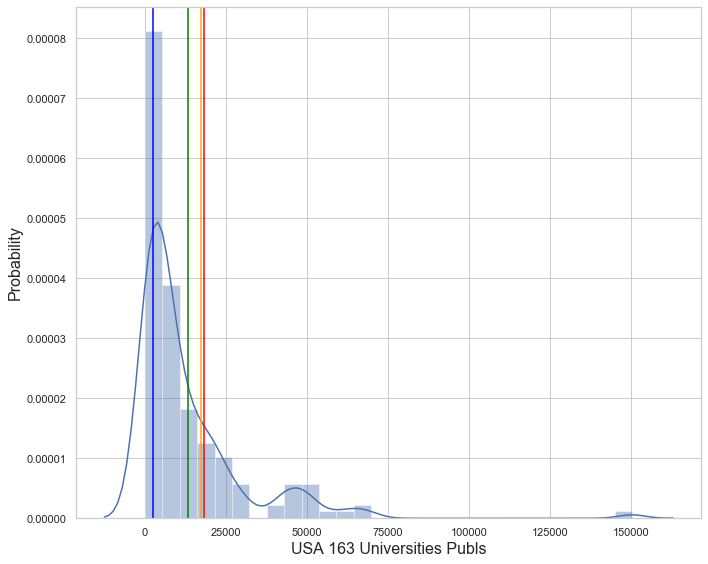

In [1110]:
import pandas as pd
fig, ax = plt.subplots(figsize=(10,8))
x = pd.Series(so_data_USA['Total'], name="USA Universities Publs") # 163 universities
ax = sns.distplot(x)

ax.set_xlabel("USA 163 Universities Publs",fontsize=16)
ax.set_ylabel("Probability",fontsize=16)
plt.axvline(18132, color='red') # this is where U of R
plt.axvline(np.mean(so_data_USA['Total']), color='green') # this is the mean, 175882.56
plt.axvline(np.percentile(so_data_USA['Total'], 25.0), color='blue') # Q1
plt.axvline(np.percentile(so_data_USA['Total'], 75.0), color='orange') # Q3
#plt.legend()
plt.tight_layout()

In [354]:
so_data_USA=so_data_USA.reset_index()

In [355]:
URpp=so_data_USA[so_data_USA.institution_name=='University of Rochester']
URpp

,institution_name,2014,2015,2016,2017,2018
162,University of Rochester,3602,3540,3515,3633,3842


In [356]:
URpp=URpp.set_index('institution_name')

In [368]:
URpp.agg('sum')

2014    3602
2015    3540
2016    3515
2017    3633
2018    3842
dtype: int64

In [340]:
inputdata=pd.DataFrame(data.iloc[:,:6], columns=['2014','2015','2016','2017','2018'])

In [341]:
inputdata.head()

,2014,2015,2016,2017,2018
institution_name,,,,,
University of Rochester,3602,3540,3515,3633,3842


In [342]:
inputdata.reset_index(drop=True, inplace=True)

In [214]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(2)

inst_country=[]
inst_cc=[]
inst_id=[]
inst_link=[]
inst_name=[]
metricType=[]
threshold=[]
t1_value2014=[]
t1_value2015=[]
t1_value2016=[]
t1_value2017=[]
t1_value2018=[]
t1_percentage2014=[]
t1_percentage2015=[]
t1_percentage2016=[]
t1_percentage2017=[]
t1_percentage2018=[]
t5_value2014=[]
t5_value2015=[]
t5_value2016=[]
t5_value2017=[]
t5_value2018=[]
t5_percentage2014=[]
t5_percentage2015=[]
t5_percentage2016=[]
t5_percentage2017=[]
t5_percentage2018=[]
t10_value2014=[]
t10_value2015=[]
t10_value2016=[]
t10_value2017=[]
t10_value2018=[]
t10_percentage2014=[]
t10_percentage2015=[]
t10_percentage2016=[]
t10_percentage2017=[]
t10_percentage2018=[]
t25_value2014=[]
t25_value2015=[]
t25_value2016=[]
t25_value2017=[]
t25_value2018=[]
t25_percentage2014=[]
t25_percentage2015=[]
t25_percentage2016=[]
t25_percentage2017=[]
t25_percentage2018=[]



for line in data['University id'][50:75]:
    url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=PublicationsInTopJournalPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'
 #   print(url.format(line))
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "d3794058e2b24417b5dfd0ef8990e2dc"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    with open("THE_UNI_ID_METRIC_ALL.json", 'w') as jsonfile:
#        json.dump(resp.json(), jsonfile)
#    print(parsed)
#    data.update(a_dict)
    result=json.loads(parsed)
    if 'results' in result:
        if len(result['results'])>=1:
            if 'institution' in result['results'][0]:
#                if 'country' in result['results'][0]['institution']:
                inst_country.append(result['results'][0]['institution']['country'])
#            if 'countryCode' in result['results'][0]['institution']:
                inst_cc.append(result['results'][0]['institution']['countryCode'])
#            if 'id' in result['results'][0]['institution']:
                inst_id.append(result['results'][0]['institution']['id'])
#            if 'link' in result['results'][0]['institution']:
                inst_link.append(result['results'][0]['institution']['link'])
#            if 'name' in result['results'][0]['institution']:
                inst_name.append(result['results'][0]['institution']['name'])
            if 'metrics' in result['results'][0]:
#            if len(result['results'][0]['metrics'])>=1:
                if 'metricType' in result['results'][0]['metrics'][0]:
                    metricType.append(result['results'][0]['metrics'][0]['metricType'])
                if 'values' in result['results'][0]['metrics'][0]:
#                    print(result['results'][0]['metrics'][0]['values'][1]['threshold'])
                    for i in range(0, len(result['results'][0]['metrics'][0]['values'])):
                        threshold.append(result['results'][0]['metrics'][0]['values'][i]['threshold'])
                        if 'valueByYear' in result['results'][0]['metrics'][0]['values'][i]:
#                        if i ==0:
                            if '2014' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                                t1_value2014.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                                t1_value2015.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                                t1_value2016.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                                t1_value2017.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                                t1_value2018.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2018'])
#                        if i ==1:
                            if '2014' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_value2014.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_value2015.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_value2016.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_value2017.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_value2018.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2018'])
                                
#                        if i ==2:
                            if '2014' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                                t10_value2014.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                                t10_value2015.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                                t10_value2016.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                                t10_value2017.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                                t10_value2018.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2018'])
                                
#                        if i ==3:
                            if '2014' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                                t25_value2014.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                                t25_value2015.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                                t25_value2016.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                                t25_value2017.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                                t25_value2018.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2018'])
                                
                        if 'percentageByYear' in result['results'][0]['metrics'][0]['values'][i]:
#                        if i ==0:
                            if '2014' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                                t1_percentage2014.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                                t1_percentage2015.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                                t1_percentage2016.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                                t1_percentage2017.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                                t1_percentage2018.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2018'])
                                
#                        if i ==1:
                            if '2014' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_percentage2014.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_percentage2015.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_percentage2016.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_percentage2017.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_percentage2018.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2018'])
                                
#                        if i ==2:                                
                            if '2014' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                                t10_percentage2014.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                                t10_percentage2015.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                                t10_percentage2016.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                                t10_percentage2017.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                                t10_percentage2018.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2018'])
                                
#                        if i ==3:                                
                            if '2014' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                                t25_percentage2014.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                                t25_percentage2015.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                                t25_percentage2016.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                                t25_percentage2017.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                                t25_percentage2018.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2018'])
#                    else:
#                        t1_value2014.append('')
#                        t1_value2015.append('')
#                        t1_value2016.append('')
#                        t1_value2017.append('')
#                        t1_value2018.append('')
#                        t1_percentage2014.append('')
#                        t1_percentage2015.append('')
#                        t1_percentage2016.append('')
#                        t1_percentage2017.append('')
#                        t1_percentage2018.append('')

#                    else:
#                        t1_value2014.append('')
#                        t1_value2015.append('')
#                        t1_value2016.append('')
#                        t1_value2017.append('')
#                        t1_value2018.append('')
#                        t1_percentage2014.append('')
#                        t1_percentage2015.append('')
#                        t1_percentage2016.append('')
#                        t1_percentage2017.append('')
#                        t1_percentage2018.append('')

#                    if 'threshold' in result['results'][0]['metrics'][0]['values']:
#                        threshold.append(result['results'][0]['metrics'][0]['values'][0]['threshold'])


s1=pd.Series(inst_country, name='country')
s2=pd.Series(inst_cc, name='countryCode')
s3=pd.Series(inst_id, name='institution_id')
s4=pd.Series(inst_link, name='link')
s5=pd.Series(inst_name, name='institution_name')
s6=pd.Series(metricType, name='metricType')
s7=pd.Series(threshold, name='threshold')
s8=pd.Series(t1_value2014, name='t1_2014')
s9=pd.Series(t1_value2015, name='t1_2015')
s10=pd.Series(t1_value2016, name='t1_2016')
s11=pd.Series(t1_value2017, name='t1_2017')
s12=pd.Series(t1_value2018, name='t1_2018')
s13=pd.Series(t1_percentage2014, name='t1_percent2014')
s14=pd.Series(t1_percentage2015, name='t1_percent2015')
s15=pd.Series(t1_percentage2016, name='t1_percent2016')
s16=pd.Series(t1_percentage2017, name='t1_percent2017')
s17=pd.Series(t1_percentage2018, name='t1_percent2018')
s18=pd.Series(t5_value2014, name='t5_2014')
s19=pd.Series(t5_value2015, name='t5_2015')
s20=pd.Series(t5_value2016, name='t5_2016')
s21=pd.Series(t5_value2017, name='t5_2017')
s22=pd.Series(t5_value2018, name='t5_2018')
s23=pd.Series(t5_percentage2014, name='t5_percent2014')
s24=pd.Series(t5_percentage2015, name='t5_percent2015')
s25=pd.Series(t5_percentage2016, name='t5_percent2016')
s26=pd.Series(t5_percentage2017, name='t5_percent2017')
s27=pd.Series(t5_percentage2018, name='t5_percent2018')
s28=pd.Series(t10_value2014, name='t10_2014')
s29=pd.Series(t10_value2015, name='t10_2015')
s30=pd.Series(t10_value2016, name='t10_2016')
s31=pd.Series(t10_value2017, name='t10_2017')
s32=pd.Series(t10_value2018, name='t10_2018')
s33=pd.Series(t10_percentage2014, name='t10_percent2014')
s34=pd.Series(t10_percentage2015, name='t10_percent2015')
s35=pd.Series(t10_percentage2016, name='t10_percent2016')
s36=pd.Series(t10_percentage2017, name='t10_percent2017')
s37=pd.Series(t10_percentage2018, name='t10_percent2018')
s38=pd.Series(t25_value2014, name='t25_2014')
s39=pd.Series(t25_value2015, name='t25_2015')
s40=pd.Series(t25_value2016, name='t25_2016')
s41=pd.Series(t25_value2017, name='t25_2017')
s42=pd.Series(t25_value2018, name='t25_2018')
s43=pd.Series(t25_percentage2014, name='t25_percent2014')
s44=pd.Series(t25_percentage2015, name='t25_percent2015')
s45=pd.Series(t25_percentage2016, name='t25_percent2016')
s46=pd.Series(t25_percentage2017, name='t25_percent2017')
s47=pd.Series(t25_percentage2018, name='t25_percent2018')


DF=pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16, s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,
             s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40, s41,s42,s43,s44,s45,s46,s47], axis=1)


DF.to_csv("THE_UNI_PublicationsInTopJournalPercentiles_ALL_3.csv", index=False)  # OK



#print(threshold)

In [103]:
for line in data['University id'][:2]:
    url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=ScholarlyOutput&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'
 #   print(url.format(line))
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "a464321ef5063d696ada17f8c159a44c"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    with open("THE_UNI_ID_METRIC_ALL.json", 'w') as jsonfile:
#        json.dump(resp.json(), jsonfile)
#    print(parsed)
#    data.update(a_dict)
    result=json.loads(parsed)
print(result['results'])

[{'institution': {'country': 'United States', 'countryCode': 'USA', 'id': 508092, 'link': {'@href': 'https://api.elsevier.com/analytics/scival/institution/508092?apiKey=a464321ef5063d696ada17f8c159a44c&httpAccept=application/json', '@ref': 'self', '@type': 'application/json'}, 'name': 'Jet Propulsion Laboratory, California Institute of Technology', 'uri': 'Institution/508092'}, 'metrics': [{'metricType': 'ScholarlyOutput', 'valueByYear': {'2014': 1913, '2015': 1800, '2016': 2181, '2017': 2052, '2018': 2200}}]}]


In [66]:
with open("THE_UNI_ID_METRIC_TEST.json") as outputfile:
    out=json.load(outputfile)

In [67]:
out

{'link': {'@ref': 'self',
  '@href': 'https://api.elsevier.com/analytics/scival/institution/metrics?journalImpactType=CiteScore&metricTypes=ScholarlyOutput&showAsFieldWeighted=false&apiKey=7afa707af961eb072a0133ceddcbc6f9&includeSelfCitations=false&yearRange=5yrs&httpAccept=application/json&byYear=true&institutionIds=508092&includedDocs=AllPublicationTypes',
  '@type': 'application/json'},
 'dataSource': {'sourceName': 'Scopus', 'lastUpdated': '2020-01-01'},
 'results': [{'metrics': [{'metricType': 'ScholarlyOutput',
     'valueByYear': {'2014': 1913,
      '2015': 1800,
      '2016': 2181,
      '2017': 2052,
      '2018': 2200}}],
   'institution': {'link': {'@ref': 'self',
     '@href': 'https://api.elsevier.com/analytics/scival/institution/508092?apiKey=7afa707af961eb072a0133ceddcbc6f9&httpAccept=application/json',
     '@type': 'application/json'},
    'name': 'Jet Propulsion Laboratory, California Institute of Technology',
    'id': 508092,
    'uri': 'Institution/508092',
    'c

In [86]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(2)

university_name=[]
university_id=[]
country=[]
countryCode=[]
df=pd.DataFrame()

for line in want_3[:4]:
#    query = "name(school)"
    url= """https://api.elsevier.com/metrics/institution/search?query=name({})&start=0&count=2&limit=10&cursor=*"""
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
#    data.update(a_dict)
    result=json.loads(parsed)
#    data=parsed[1]
#    print(result)
    data=result['results']
    print(data)
#    if (data[0]['country'] is not None):

[{'country': 'United Kingdom', 'countryCode': 'GBR', 'id': 315091, 'link': {'@href': 'https://api.elsevier.com/analytics/scival/institution/315091?apiKey=dcfb521197bf15867d12c3c86c46c69b&httpAccept=application/json', '@ref': 'self', '@type': 'application/json'}, 'name': 'University of Oxford', 'uri': 'Institution/315091'}]
[{'country': 'United States', 'countryCode': 'USA', 'id': 508092, 'link': {'@href': 'https://api.elsevier.com/analytics/scival/institution/508092?apiKey=dcfb521197bf15867d12c3c86c46c69b&httpAccept=application/json', '@ref': 'self', '@type': 'application/json'}, 'name': 'Jet Propulsion Laboratory, California Institute of Technology', 'uri': 'Institution/508092'}, {'country': 'United States', 'countryCode': 'USA', 'id': 508021, 'link': {'@href': 'https://api.elsevier.com/analytics/scival/institution/508021?apiKey=dcfb521197bf15867d12c3c86c46c69b&httpAccept=application/json', '@ref': 'self', '@type': 'application/json'}, 'name': 'California Institute of Technology', 'ur

In [3]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane"

C:\Users\jchen148\THE Rankings\Report to Jane


In [97]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(0.1)

university_name=[]
university_id=[]
country=[]
countryCode=[]
df=pd.DataFrame()

for line in want_3[:10]:
#    query = "name(school)"
    url= "https://api.elsevier.com/metrics/institution/search?query=name({})&start=0&count=25&limit=25&cursor=*"
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
    result=json.loads(parsed)
    data=result['results']
    for i in data:
        if i is not None:
#    if data[0] is not None:        
            countries=i['country']
            unames=i['name']
            uids=i['id']
            codes=i['countryCode'] 
            if (countries is not None):
                country.append(countries)
            else:
                country.append("")
            if (unames is not None):
                university_name.append(unames)
            else:
                university_name.append("")
            if (uids is not None):
                university_id.append(uids)
            else:
                university_id.append("")
            if (codes is not None):
                countryCode.append(codes)
            else:
                countryCode.append("")
            df=pd.DataFrame({'University Name':university_name, 'University id':university_id, 'Country':country, 'Country Code':countryCode})
            df.to_csv("THE_CountryCode_Result_1202.csv")
    
    

In [98]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(0.1)

university_name=[]
university_id=[]
country=[]
countryCode=[]
df=pd.DataFrame()

for line in want_3[10:20]:
#    query = "name(school)"
    url= "https://api.elsevier.com/metrics/institution/search?query=name({})&start=0&count=25&limit=25&cursor=*"
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
    result=json.loads(parsed)
    data=result['results']
    for i in data:
        if i is not None:
#    if data[0] is not None:        
            countries=i['country']
            unames=i['name']
            uids=i['id']
            codes=i['countryCode'] 
            if (countries is not None):
                country.append(countries)
            else:
                country.append("")
            if (unames is not None):
                university_name.append(unames)
            else:
                university_name.append("")
            if (uids is not None):
                university_id.append(uids)
            else:
                university_id.append("")
            if (codes is not None):
                countryCode.append(codes)
            else:
                countryCode.append("")
            df=pd.DataFrame({'University Name':university_name, 'University id':university_id, 'Country':country, 'Country Code':countryCode})
            df.to_csv("THE_CountryCode_Result_1202_2.csv")
    

In [100]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(0.1)

university_name=[]
university_id=[]
country=[]
countryCode=[]
df=pd.DataFrame()

for line in want_3[20:30]:
#    query = "name(school)"
    url= "https://api.elsevier.com/metrics/institution/search?query=name({})&start=0&count=25&limit=25&cursor=*"
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
    result=json.loads(parsed)
    data=result['results']
    for i in data:
        if i is not None:
#    if data[0] is not None:        
            countries=i['country']
            unames=i['name']
            uids=i['id']
            codes=i['countryCode'] 
            if (countries is not None):
                country.append(countries)
            else:
                country.append("")
            if (unames is not None):
                university_name.append(unames)
            else:
                university_name.append("")
            if (uids is not None):
                university_id.append(uids)
            else:
                university_id.append("")
            if (codes is not None):
                countryCode.append(codes)
            else:
                countryCode.append("")
            df=pd.DataFrame({'University Name':university_name, 'University id':university_id, 'Country':country, 'Country Code':countryCode})
            df.to_csv("THE_CountryCode_Result_1202_3.csv")
    

In [ ]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(0.1)

university_name=[]
university_id=[]
country=[]
countryCode=[]
df=pd.DataFrame()

for line in want_3[20:30]:
#    query = "name(school)"
    url= "https://api.elsevier.com/metrics/institution/search?query=name({})&start=0&count=25&limit=25&cursor=*"
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
    result=json.loads(parsed)
    data=result['results']
    for i in data:
        if i is not None:
#    if data[0] is not None:        
            countries=i['country']
            unames=i['name']
            uids=i['id']
            codes=i['countryCode'] 
            if (countries is not None):
                country.append(countries)
            else:
                country.append("")
            if (unames is not None):
                university_name.append(unames)
            else:
                university_name.append("")
            if (uids is not None):
                university_id.append(uids)
            else:
                university_id.append("")
            if (codes is not None):
                countryCode.append(codes)
            else:
                countryCode.append("")
            df=pd.DataFrame({'University Name':university_name, 'University id':university_id, 'Country':country, 'Country Code':countryCode})
            df.to_csv("THE_CountryCode_Result_1202_3.csv")

In [169]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(3)

university_name=[]
university_id=[]
country=[]
countryCode=[]
df=pd.DataFrame()

for line in want_3[75:]:
    line=re.sub('[^A-Za-z0-9]+',' ', line)
#    query = "name(school)"
    url= "https://api.elsevier.com/metrics/institution/search?query=name({})&start=0&count=25&limit=25&cursor=*"
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
#    try:
    parsed=json.dumps(resp.json(),
                       sort_keys=True,
                       indent=4, separators=(',', ': '))
    result=json.loads(parsed)
    data=result['results']
#    except ValueError:
#           pass
#            result=json.loads(parsed)
#            data=result['results']
    for i in data:
        if i is None:
            pass
        else:
#                    try:
#    if data[0] is not None:        
            countries=i['country']
            unames=i['name']
            uids=i['id']
            codes=i['countryCode'] 
            if (countries is not None):
                country.append(countries)
            else:
                country.append("")
            if (unames is not None):
                university_name.append(unames)
            else:
                university_name.append("")
            if (uids is not None):
                university_id.append(uids)
            else:
                university_id.append("")
            if (codes is not None):
                countryCode.append(codes)
            else:
                countryCode.append("")
#                    except (RuntimeError, TypeError, NameError,JSONDecodeError):
#                            pass
            df=pd.DataFrame({'University Name':university_name, 'University id':university_id, 'Country':country, 'Country Code':countryCode})
            df.to_csv("THE_CountryCode_Result_1202_12.csv")
#    except ValueError:
#        continue

In [153]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(3)

university_name=[]
university_id=[]
country=[]
countryCode=[]
df=pd.DataFrame()

for line in want_3[47:50]:
#    query = "name(school)"
    url= "https://api.elsevier.com/metrics/institution/search?query=name({})&start=0&count=25&limit=25&cursor=*"
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
    try:
        parsed=json.dumps(resp.json(),
                       sort_keys=True,
                       indent=4, separators=(',', ': '))
        result=json.loads(parsed)
        data=result['results']
        for i in data:
            if i is None:
                pass
            else:
                try:
#    if data[0] is not None:        
                    countries=i['country']
                    unames=i['name']
                    uids=i['id']
                    codes=i['countryCode'] 
                    if (countries is not None):
                        country.append(countries)
                    else:
                        country.append("")
                    if (unames is not None):
                        university_name.append(unames)
                    else:
                        university_name.append("")
                    if (uids is not None):
                        university_id.append(uids)
                    else:
                        university_id.append("")
                    if (codes is not None):
                        countryCode.append(codes)
                    else:
                        countryCode.append("")
                except (RuntimeError, TypeError, NameError,JSONDecodeError):
                        pass
                        df=pd.DataFrame({'University Name':university_name, 'University id':university_id, 'Country':country, 'Country Code':countryCode})
                        df.to_csv("THE_CountryCode_Result_1202_8.csv")
    except ValueError:
        continue
    

In [126]:
for line in want_3[38:40]:
    print(re.sub('[^A-Za-z0-9]+',' ', line))

North Carolina at Chapel Hill
Wageningen University Research


In [ ]:
for line in want_3[38:40]:
    line=re.sub('[^A-Za-z0-9]+',' ', line)
#    query = "name(school)"
    url= """https://api.elsevier.com/metrics/institution/search?query=name("{}")&start=0&count=25&limit=25&cursor=*"""
#    resp = requests.get(url.format(line), headers={'Accept':'application/json',
#                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})

In [137]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(3)

university_name=[]
university_id=[]
country=[]
countryCode=[]
df=pd.DataFrame()

for line in want_3[40:50]:
#    line=re.sub('[^A-Za-z0-9]+',' ', line)
#    query = "name(school)"
    url= """https://api.elsevier.com/metrics/institution/search?query=name("{}")&start=0&count=25&limit=25&cursor=*"""
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
    result=json.loads(parsed)
    data=result['results']
    for i in data:
        if i is not None:
#    if data[0] is not None:        
            countries=i['country']
            unames=i['name']
            uids=i['id']
            codes=i['countryCode'] 
            if (countries is not None):
                country.append(countries)
            else:
                country.append("")
            if (unames is not None):
                university_name.append(unames)
            else:
                university_name.append("")
            if (uids is not None):
                university_id.append(uids)
            else:
                university_id.append("")
            if (codes is not None):
                countryCode.append(codes)
            else:
                countryCode.append("")
            df=pd.DataFrame({'University Name':university_name, 'University id':university_id, 'Country':country, 'Country Code':countryCode})
            df.to_csv("THE_CountryCode_Result_1202_6.csv")
            
            

In [117]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(3)

university_name=[]
university_id=[]
country=[]
countryCode=[]
df=pd.DataFrame()

#for line in want_3[40:50]:
#    line=re.sub('[^A-Za-z0-9]+',' ', line)
#    query = "name(school)"
#name="University of Rochester"
url= """https://api.elsevier.com/metrics/institution/search?query=name(University%20of%20Rochester)&start=0&count=25&limit=25&cursor=*"""
resp = requests.get(url, headers={'Accept':'application/json',
                             'X-ELS-APIKey': "a464321ef5063d696ada17f8c159a44c"})
parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
result=json.loads(parsed)
data=result['results']
#print(data)
for i in data:
    if i is not None:
#    if data[0] is not None:        
        countries=i['country']
        unames=i['name']
        uids=i['id']
        codes=i['countryCode'] 
        if (countries is not None):
            country.append(countries)
        else:
            country.append("")
        if (unames is not None):
            university_name.append(unames)
        else:
            university_name.append("")
        if (uids is not None):
            university_id.append(uids)
        else:
            university_id.append("")
        if (codes is not None):
            countryCode.append(codes)
        else:
            countryCode.append("")
        df=pd.DataFrame({'University Name':university_name, 'University id':university_id, 'Country':country, 'Country Code':countryCode})
        df.to_csv("THE_CountryCode_Result_1202_13.csv")

In [110]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(3)

university_name=[]
university_id=[]
country=[]
countryCode=[]
df=pd.DataFrame()

#for line in want_3[40:50]:
#    line=re.sub('[^A-Za-z0-9]+',' ', line)
#    query = "name(school)"
name="University of Rochester"
url= """https://api.elsevier.com/metrics/institution/search?query=name("{}")&start=0&count=25&limit=25&cursor=*"""
resp = requests.get(url.format(name), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
result=json.loads(parsed)
data=result['results']
for i in data:
    if i is not None:
#    if data[0] is not None:        
        countries=i['country']
        unames=i['name']
        uids=i['id']
        codes=i['countryCode'] 
        if (countries is not None):
            country.append(countries)
        else:
            country.append("")
        if (unames is not None):
            university_name.append(unames)
        else:
            university_name.append("")
        if (uids is not None):
            university_id.append(uids)
        else:
            university_id.append("")
        if (codes is not None):
            countryCode.append(codes)
        else:
            countryCode.append("")
        df=pd.DataFrame({'University Name':university_name, 'University id':university_id, 'Country':country, 'Country Code':countryCode})
        df.to_csv("THE_CountryCode_Result_1202_13.csv")
            
            

# concatenate all files

In [22]:
link =r"C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_{}.csv"

for i in range(0, 12):
    i+=1
    print(link.format(i))

C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_1.csv
C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_2.csv
C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_3.csv
C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_4.csv
C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_5.csv
C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_6.csv
C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_7.csv
C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_8.csv
C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_9.csv
C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_10.csv
C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_11.csv
C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_12.csv


In [5]:
import pandas as pd

In [4]:
chucks=[]

filename='THE_CountryCode_Result_1202_{}.csv'
for i in range(0, 13):
    i+=1
    print(filename.format(i))
#    chucks.append(filename.format(i))

THE_CountryCode_Result_1202_1.csv
THE_CountryCode_Result_1202_2.csv
THE_CountryCode_Result_1202_3.csv
THE_CountryCode_Result_1202_4.csv
THE_CountryCode_Result_1202_5.csv
THE_CountryCode_Result_1202_6.csv
THE_CountryCode_Result_1202_7.csv
THE_CountryCode_Result_1202_8.csv
THE_CountryCode_Result_1202_9.csv
THE_CountryCode_Result_1202_10.csv
THE_CountryCode_Result_1202_11.csv
THE_CountryCode_Result_1202_12.csv
THE_CountryCode_Result_1202_13.csv


In [5]:
import pandas as pd

filename='THE_CountryCode_Result_1202_{}.csv'

chucks=[]
for i in range(0, 13):
    i+=1
    chucks.append(pd.read_csv(filename.format(i)))
    
namedata=pd.concat(chucks, ignore_index=True)

namedata.head()

,Unnamed: 0,University Name,University id,Country,Country Code
0,0,University of Oxford,315091,United Kingdom,GBR
1,1,"Jet Propulsion Laboratory, California Institut...",508092,United States,USA
2,2,California Institute of Technology,508021,United States,USA
3,3,University of Cambridge,315068,United Kingdom,GBR
4,4,Stanford University,508219,United States,USA


In [6]:
namedata.reset_index()

namedata2=namedata[:]

namedata2.head()

namedata2=namedata.iloc[:,1:] # delete the first column

namedata2.head()



,University Name,University id,Country,Country Code
0,University of Oxford,315091,United Kingdom,GBR
1,"Jet Propulsion Laboratory, California Institut...",508092,United States,USA
2,California Institute of Technology,508021,United States,USA
3,University of Cambridge,315068,United Kingdom,GBR
4,Stanford University,508219,United States,USA


In [137]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(3)

university_name=[]
university_id=[]
country=[]
countryCode=[]
df=pd.DataFrame()

for line in want_3[40:50]:
#    line=re.sub('[^A-Za-z0-9]+',' ', line)
#    query = "name(school)"
    url= """https://api.elsevier.com/metrics/institution/search?query=name("{}")&start=0&count=25&limit=25&cursor=*"""
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
    result=json.loads(parsed)
    data=result['results']
    for i in data:
        if i is not None:
#    if data[0] is not None:        
            countries=i['country']
            unames=i['name']
            uids=i['id']
            codes=i['countryCode'] 
            if (countries is not None):
                country.append(countries)
            else:
                country.append("")
            if (unames is not None):
                university_name.append(unames)
            else:
                university_name.append("")
            if (uids is not None):
                university_id.append(uids)
            else:
                university_id.append("")
            if (codes is not None):
                countryCode.append(codes)
            else:
                countryCode.append("")
            df=pd.DataFrame({'University Name':university_name, 'University id':university_id, 'Country':country, 'Country Code':countryCode})
            df.to_csv("THE_CountryCode_Result_1202_6.csv")
            
            

In [7]:
Uidlist=namedata2['University id']
Uidlist.head()

0    315091
1    508092
2    508021
3    315068
4    508219
Name: University id, dtype: int64

In [8]:
import requests
import requests_oauthlib
import pandas as pd
import numpy as np

In [ ]:
import time
time.sleep(2)


url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=CitationCount&CitationsPerPublication&CollaborationImpact&CitedPublications&FieldWeightedCitationImpact&ScholarlyOutput&PublicationsInTopJournalPercentiles&OutputsInTopCitationPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'


resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "a464321ef5063d696ada17f8c159a44c"})
parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
result=json.loads(parsed)





In [9]:
len(Uidlist)

1272

In [125]:
import requests
import requests_oauthlib
import json
import pandas as pd
import numpy as np

import time
time.sleep(2)

country=[]
countryCode=[]
Uid=[]
uname=[]
uri=[]
metric=[]
CitationCount2014=[]
CitationCount2015=[]
CitationCount2016=[]
CitationCount2017=[]
CitationCount2018=[]

url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=CitationCount&CitationsPerPublication&CollaborationImpact&CitedPublications&FieldWeightedCitationImpact&ScholarlyOutput&PublicationsInTopJournalPercentiles&OutputsInTopCitationPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'

for uid in Uidlist[1270:]:
#    print(url.format(uid))
    resp = requests.get(url.format(uid), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "a464321ef5063d696ada17f8c159a44c"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
    result=json.loads(parsed)
#    print(result)
    if 'results' not in result:
        pass
    else:
        if list(result['results']) is None:
            pass
        else:
#        if list(result['results'])[0] is None:
#            pass
#        else:
#        data=result['results']
            if len(list(result['results']))<1:
               pass
            else:
                if 'institution' not in list(result['results'])[0]:
                    pass
                else:
                    if 'country' in result['results'][0]['institution']:
                        country.append(result['results'][0]['institution']['country'])
                    else:
                        country.append("")
                    if 'countryCode' in result['results'][0]['institution']:
                        countryCode.append(result['results'][0]['institution']['countryCode'])
                    else:
                        countryCode.append("")
                    if 'id' in result['results'][0]['institution']:
                        Uid.append(result['results'][0]['institution']['id'])
                    else:
                        Uid.append("")
                    if 'name' in result['results'][0]['institution']:
                        uname.append(result['results'][0]['institution']['name'])
                    else:
                        uname.append("")
                    if 'uri' in result['results'][0]:
                        uri.append(result['results'][0]['institution']['uri'])
                    else:
                        uri.append("")
                if 'metrics' not in result['results'][0]:
                    pass
                else:
                    if 'metricType' not in result['results'][0]['metrics'][0]:
                        pass
                    else:
                        metric.append(result['results'][0]['metrics'][0]['metricType'])
                        if 'valueByYear' in result['results'][0]['metrics'][0]:
                            if '2014' in result['results'][0]['metrics'][0]['valueByYear']:
                                CitationCount2014.append(result['results'][0]['metrics'][0]['valueByYear']['2014'])
                            else:
                                CitationCount2014.append("")
                            if '2015' in result['results'][0]['metrics'][0]['valueByYear']:
                                CitationCount2015.append(result['results'][0]['metrics'][0]['valueByYear']['2015'])
                            else:
                                CitationCount2015.append("")
                            if '2016' in result['results'][0]['metrics'][0]['valueByYear']:
                                CitationCount2016.append(result['results'][0]['metrics'][0]['valueByYear']['2016'])
                            else:
                                CitationCount2016.append("")
                            if '2017' in result['results'][0]['metrics'][0]['valueByYear']:
                                CitationCount2017.append(result['results'][0]['metrics'][0]['valueByYear']['2017'])
                            else:
                                CitationCount2017.append("")
                            if '2018' in result['results'][0]['metrics'][0]['valueByYear']:
                                CitationCount2018.append(result['results'][0]['metrics'][0]['valueByYear']['2018'])
                            else:
                                CitationCount2018.append("")
                        else:
                            CitationCount2014.append("")
                            CitationCount2015.append("")
                            CitationCount2016.append("")
                            CitationCount2017.append("")
                            CitationCount2018.append("")
#            else:
#                metric.append("")
 
s1=pd.Series(country, name='Country')
s2=pd.Series(countryCode, name='CountryCode')
s3=pd.Series(Uid, name='Uid')
s4=pd.Series(uname, name='UniversityName')
s5=pd.Series(uri, name='uri')
s6=pd.Series(metric, name='metric')
s7=pd.Series(CitationCount2014, name='Citation2014')
s8=pd.Series(CitationCount2015, name='Citation2015')
s9=pd.Series(CitationCount2016, name='Citation2016')
s10=pd.Series(CitationCount2017, name='Citation2017')
s11=pd.Series(CitationCount2018, name='Citation2018')
    
Times_df=pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11], axis=1)
Times_df.to_csv("Times_11.csv",index=False)        
#    df=pd.DataFrame(pd.DataFrame(result['results'][0]['metrics']))
#    df.to_csv("1213_THE.csv", index=False)




# Save data dictionary

In [38]:
import requests
import requests_oauthlib
import json
import pandas as pd
import numpy as np

import time
time.sleep(2)

url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=CitationCount&CitationsPerPublication&CollaborationImpact&CitedPublications&FieldWeightedCitationImpact&ScholarlyOutput&PublicationsInTopJournalPercentiles&OutputsInTopCitationPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'

for uid in Uidlist[:5]:
#    print(url.format(uid))
    resp = requests.get(url.format(uid), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
#    parsed=json.dumps(resp.json(),
#                 sort_keys=True,
#                 indent=4, separators=(',', ': '))
#    print(parsed)
    #result=json.loads(parsed)
with open("Uni_Metric_Data_Dictionary_Test4.json", 'w') as jsonfile:
    json.dump(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '), fp=jsonfile)

In [49]:
import requests
import requests_oauthlib
import json
import pandas as pd
import numpy as np

import time
time.sleep(2)

url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=CitationCount&CitationsPerPublication&CollaborationImpact&CitedPublications&FieldWeightedCitationImpact&ScholarlyOutput&PublicationsInTopJournalPercentiles&OutputsInTopCitationPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'

for uid in Uidlist[:2]:
#    print(url.format(uid))
    resp = requests.get(url.format(uid), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
#    parsed = json.loads(resp.text)
#    print(parsed)
    result=json.loads(parsed)
    print(result)
#    with open("Uni_Metric_Data_Dictionary_2.txt", 'a') as text_file:
#         print(parsed, file=text_file)
#        json.dump(resp.json(),
#                 sort_keys=True,
#                 indent=4, separators=(',', ': '), fp=jsonfile)

{'dataSource': {'lastUpdated': '2019-12-11', 'sourceName': 'Scopus'}, 'link': {'@href': 'https://api.elsevier.com/analytics/scival/institution/metrics?showAsFieldWeighted=false&apiKey=dcfb521197bf15867d12c3c86c46c69b&FieldWeightedCitationImpact=&OutputsInTopCitationPercentiles=&yearRange=5yrs&institutionIds=315091&includedDocs=AllPublicationTypes&ScholarlyOutput=&journalImpactType=CiteScore&metricTypes=CitationCount&CollaborationImpact=&includeSelfCitations=false&httpAccept=application/json&byYear=true&CitedPublications=&PublicationsInTopJournalPercentiles=&CitationsPerPublication=', '@ref': 'self', '@type': 'application/json'}, 'results': [{'institution': {'country': 'United Kingdom', 'countryCode': 'GBR', 'id': 315091, 'link': {'@href': 'https://api.elsevier.com/analytics/scival/institution/315091?apiKey=dcfb521197bf15867d12c3c86c46c69b&httpAccept=application/json', '@ref': 'self', '@type': 'application/json'}, 'name': 'University of Oxford', 'uri': 'Institution/315091'}, 'metrics': 

In [24]:
import requests
import requests_oauthlib
import json
import pandas as pd
import numpy as np

import time
time.sleep(2)

url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=CitationCount&CitationsPerPublication&CollaborationImpact&CitedPublications&FieldWeightedCitationImpact&ScholarlyOutput&PublicationsInTopJournalPercentiles&OutputsInTopCitationPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'

for uid in Uidlist[25:]:
#    print(url.format(uid))
    resp = requests.get(url.format(uid), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
    #result=json.loads(parsed)
with open("Uni_Metric_Data_Dic_2.json", 'w') as jsonfile:
    json.dump(parsed, jsonfile)

In [125]:
import requests
import requests_oauthlib
import json
import pandas as pd
import numpy as np

import time
time.sleep(2)

country=[]
countryCode=[]
Uid=[]
uname=[]
uri=[]
metric=[]
CitationCount2014=[]
CitationCount2015=[]
CitationCount2016=[]
CitationCount2017=[]
CitationCount2018=[]

url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=CitationCount&CitationsPerPublication&CollaborationImpact&CitedPublications&FieldWeightedCitationImpact&ScholarlyOutput&PublicationsInTopJournalPercentiles&OutputsInTopCitationPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'

for uid in Uidlist[1270:]:
#    print(url.format(uid))
    resp = requests.get(url.format(uid), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "a464321ef5063d696ada17f8c159a44c"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
    result=json.loads(parsed)
#    print(result)
    if 'results' not in result:
        pass
    else:
        if list(result['results']) is None:
            pass
        else:
#        if list(result['results'])[0] is None:
#            pass
#        else:
#        data=result['results']
            if len(list(result['results']))<1:
               pass
            else:
                if 'institution' not in list(result['results'])[0]:
                    pass
                else:
                    if 'country' in result['results'][0]['institution']:
                        country.append(result['results'][0]['institution']['country'])
                    else:
                        country.append("")
                    if 'countryCode' in result['results'][0]['institution']:
                        countryCode.append(result['results'][0]['institution']['countryCode'])
                    else:
                        countryCode.append("")
                    if 'id' in result['results'][0]['institution']:
                        Uid.append(result['results'][0]['institution']['id'])
                    else:
                        Uid.append("")
                    if 'name' in result['results'][0]['institution']:
                        uname.append(result['results'][0]['institution']['name'])
                    else:
                        uname.append("")
                    if 'uri' in result['results'][0]:
                        uri.append(result['results'][0]['institution']['uri'])
                    else:
                        uri.append("")
                if 'metrics' not in result['results'][0]:
                    pass
                else:
                    if 'metricType' not in result['results'][0]['metrics'][0]:
                        pass
                    else:
                        metric.append(result['results'][0]['metrics'][0]['metricType'])
                        if 'valueByYear' in result['results'][0]['metrics'][0]:
                            if '2014' in result['results'][0]['metrics'][0]['valueByYear']:
                                CitationCount2014.append(result['results'][0]['metrics'][0]['valueByYear']['2014'])
                            else:
                                CitationCount2014.append("")
                            if '2015' in result['results'][0]['metrics'][0]['valueByYear']:
                                CitationCount2015.append(result['results'][0]['metrics'][0]['valueByYear']['2015'])
                            else:
                                CitationCount2015.append("")
                            if '2016' in result['results'][0]['metrics'][0]['valueByYear']:
                                CitationCount2016.append(result['results'][0]['metrics'][0]['valueByYear']['2016'])
                            else:
                                CitationCount2016.append("")
                            if '2017' in result['results'][0]['metrics'][0]['valueByYear']:
                                CitationCount2017.append(result['results'][0]['metrics'][0]['valueByYear']['2017'])
                            else:
                                CitationCount2017.append("")
                            if '2018' in result['results'][0]['metrics'][0]['valueByYear']:
                                CitationCount2018.append(result['results'][0]['metrics'][0]['valueByYear']['2018'])
                            else:
                                CitationCount2018.append("")
                        else:
                            CitationCount2014.append("")
                            CitationCount2015.append("")
                            CitationCount2016.append("")
                            CitationCount2017.append("")
                            CitationCount2018.append("")
#            else:
#                metric.append("")
 
s1=pd.Series(country, name='Country')
s2=pd.Series(countryCode, name='CountryCode')
s3=pd.Series(Uid, name='Uid')
s4=pd.Series(uname, name='UniversityName')
s5=pd.Series(uri, name='uri')
s6=pd.Series(metric, name='metric')
s7=pd.Series(CitationCount2014, name='Citation2014')
s8=pd.Series(CitationCount2015, name='Citation2015')
s9=pd.Series(CitationCount2016, name='Citation2016')
s10=pd.Series(CitationCount2017, name='Citation2017')
s11=pd.Series(CitationCount2018, name='Citation2018')
    
Times_df=pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11], axis=1)
Times_df.to_csv("Times_11.csv",index=False)        
#    df=pd.DataFrame(pd.DataFrame(result['results'][0]['metrics']))
#    df.to_csv("1213_THE.csv", index=False)




# Combine all subfiles

In [126]:
filename='Times_{}.csv'

for i in range(1,12):
    print(filename.format(i))

Times_1.csv
Times_2.csv
Times_3.csv
Times_4.csv
Times_5.csv
Times_6.csv
Times_7.csv
Times_8.csv
Times_9.csv
Times_10.csv
Times_11.csv


In [127]:
chuck=[]
for i in range(1,12):
    chuck.append(pd.read_csv(filename.format(i)))

total=pd.concat(chuck, ignore_index=True)    

total.head()

,Country,CountryCode,Uid,UniversityName,uri,metric,Citation2014,Citation2015,Citation2016,Citation2017,Citation2018
0,United Kingdom,GBR,315091,University of Oxford,NaN,CitationCount,355751.0,313129.0,238271.0,149907.0,75747.0
1,United States,USA,508092,"Jet Propulsion Laboratory, California Institut...",NaN,CitationCount,39797.0,30488.0,32933.0,18670.0,9264.0
2,United States,USA,508021,California Institute of Technology,NaN,CitationCount,129593.0,97259.0,90365.0,58679.0,29486.0
3,United Kingdom,GBR,315068,University of Cambridge,NaN,CitationCount,260407.0,236169.0,197754.0,127682.0,64830.0
4,United States,USA,508219,Stanford University,NaN,CitationCount,404346.0,363567.0,282005.0,194136.0,95069.0


In [128]:
del total['uri']

In [129]:
total.head()

total.to_csv("THE_Ranked_University_CitationCount_2014_2018.csv", index=False)

In [130]:
total.head()

,Country,CountryCode,Uid,UniversityName,metric,Citation2014,Citation2015,Citation2016,Citation2017,Citation2018
0,United Kingdom,GBR,315091,University of Oxford,CitationCount,355751.0,313129.0,238271.0,149907.0,75747.0
1,United States,USA,508092,"Jet Propulsion Laboratory, California Institut...",CitationCount,39797.0,30488.0,32933.0,18670.0,9264.0
2,United States,USA,508021,California Institute of Technology,CitationCount,129593.0,97259.0,90365.0,58679.0,29486.0
3,United Kingdom,GBR,315068,University of Cambridge,CitationCount,260407.0,236169.0,197754.0,127682.0,64830.0
4,United States,USA,508219,Stanford University,CitationCount,404346.0,363567.0,282005.0,194136.0,95069.0


In [132]:
ranked=total.sort_values(by='Citation2018', ascending=False)


ranked.to_csv("THE_Ranked_Universites_CitationCounts_2014_2018.csv", index=False)

In [135]:
ranked=ranked.drop_duplicates()
ranked.to_csv("Updated_THE_Ranked_Universites_CitationCounts_2014_2018.csv", index=False)

In [97]:
url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=CitationCount&CitationsPerPublication&CollaborationImpact&CitedPublications&FieldWeightedCitationImpact&ScholarlyOutput&PublicationsInTopJournalPercentiles&OutputsInTopCitationPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'

for uid in Uidlist[:1]:
#    print(url.format(uid))
    resp = requests.get(url.format(uid), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "a464321ef5063d696ada17f8c159a44c"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
    result=json.loads(parsed)
    print(result['results'][0])

{'institution': {'country': 'United Kingdom', 'countryCode': 'GBR', 'id': 315091, 'link': {'@href': 'https://api.elsevier.com/analytics/scival/institution/315091?apiKey=a464321ef5063d696ada17f8c159a44c&httpAccept=application/json', '@ref': 'self', '@type': 'application/json'}, 'name': 'University of Oxford', 'uri': 'Institution/315091'}, 'metrics': [{'metricType': 'CitationCount', 'valueByYear': {'2014': 355751, '2015': 313129, '2016': 238271, '2017': 149907, '2018': 75747}}]}


In [167]:

url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=CitationCount%2CCitedPublications%2CScholarlyOutput%2CPublicationsInTopJournalPercentiles%2COutputsInTopCitationPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&start=0&count=25&limit=25&cursor=*'

for uid in df_id['uid']:
#    query = "name(school)"
#    url= "https://api.elsevier.com/metrics/institution/search?name({})&start=0&count=2&limit=25&cursor=*"

    resp = requests.get(url.format(uid), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "a464321ef5063d696ada17f8c159a44c"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
    result=json.loads(parsed)
#    result=parsed[2]
    data=result['results']
#    print(data[0])
    for i in data:
#        print(i['metrics'][2]) # ScholarlyOutput
#        print(i['metrics'][0]) # CitationCount
#        print(i['metrics'][1]) # CitedPublications
#        print(i['metrics'][3]['impactType'])# impactType
        print(i['metrics'][3]) # CiteScore and PublicationsInTopJournalPercentiles
#        print(i['metrics'][3]['values'])
#        print(i['metrics'][3]['values'][0]['percentageByYear'])
#        print(i['metrics'][3]['values'][0]['valueByYear'])

{'impactType': 'CiteScore', 'metricType': 'PublicationsInTopJournalPercentiles', 'values': [{'percentageByYear': {'2014': 0.0, '2015': 0.0, '2016': 0.0, '2017': 0.0, '2018': 0.0}, 'threshold': 1, 'valueByYear': {'2014': 0, '2015': 0, '2016': 0, '2017': 0, '2018': 0}}, {'percentageByYear': {'2014': 20.0, '2015': 9.523809, '2016': 0.0, '2017': 11.764706, '2018': 22.222223}, 'threshold': 5, 'valueByYear': {'2014': 3, '2015': 2, '2016': 0, '2017': 2, '2018': 4}}, {'percentageByYear': {'2014': 26.666668, '2015': 14.285715, '2016': 13.636364, '2017': 35.294117, '2018': 27.777779}, 'threshold': 10, 'valueByYear': {'2014': 4, '2015': 3, '2016': 3, '2017': 6, '2018': 5}}, {'percentageByYear': {'2014': 46.666668, '2015': 33.333336, '2016': 22.727274, '2017': 41.17647, '2018': 61.11111}, 'threshold': 25, 'valueByYear': {'2014': 7, '2015': 7, '2016': 5, '2017': 7, '2018': 11}}]}
{'impactType': 'CiteScore', 'metricType': 'PublicationsInTopJournalPercentiles', 'values': [{'percentageByYear': {'2014'

In [11]:
import json

In [22]:

url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=CitationCount%2CCitedPublications%2CScholarlyOutput%2CPublicationsInTopJournalPercentiles%2COutputsInTopCitationPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&start=0&count=25&limit=25&cursor=*'

#for uid in df_id['uid']:
for item in Uidlist[100:]:
#    query = "name(school)"
#    url= "https://api.elsevier.com/metrics/institution/search?name({})&start=0&count=2&limit=25&cursor=*"

    resp = requests.get(url.format(item), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "ba88a424c653ea37282b6a4cdf423a1d"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
#    result=json.loads(parsed)
with open("Data_Dic_1218_6.txt", "a") as text_file:
    print(parsed, file=text_file)
#    result=parsed[2]

In [180]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(2)

country=[]
countryCode=[]
universityid=[]
uniname=[]
metricType=[]
percentage2014=[]
percentage2015=[]
percentage2016=[]
percentage2017=[]
percentage2018=[]
value2014=[]
value2015=[]
value2016=[]
value2017=[]
value2018=[]
ScholarlyOutput2014=[]
ScholarlyOutput2015=[]
ScholarlyOutput2016=[]
ScholarlyOutput2017=[]
ScholarlyOutput2018=[]
CitationCount2014=[]
CitationCount2015=[]
CitationCount2016=[]
CitationCount2017=[]
CitationCount2018=[]
CitedPublicationsValue2014=[]
CitedPublicationsValue2015=[]
CitedPublicationsValue2016=[]
CitedPublicationsValue2017=[]
CitedPublicationsValue2018=[]
CitedPublicationspercentage2014=[]
CitedPublicationspercentage2015=[]
CitedPublicationspercentage2016=[]
CitedPublicationspercentage2017=[]
CitedPublicationspercentage2018=[]
impactType=[]
CiteScorepercentage2014=[]
CiteScorepercentage2015=[]
CiteScorepercentage2016=[]
CiteScorepercentage2017=[]
CiteScorepercentage2018=[]
CiteScorevalue2014=[]
CiteScorevalue2015=[]
CiteScorevalue2016=[]
CiteScorevalue2017=[]
CiteScorevalue2018=[]
PublicationsInTopJournalPercentilespercentage2014=[]
PublicationsInTopJournalPercentilespercentage2015=[]
PublicationsInTopJournalPercentilespercentage2016=[]
PublicationsInTopJournalPercentilespercentage2017=[]
PublicationsInTopJournalPercentilespercentage2018=[]
PublicationsInTopJournalPercentilesvalue2014=[]
PublicationsInTopJournalPercentilesvalue2015=[]
PublicationsInTopJournalPercentilesvalue2016=[]
PublicationsInTopJournalPercentilesvalue2017=[]
PublicationsInTopJournalPercentilesvalue2018=[]

PublicationsInTopJournalPercentByYear2014=[]
PublicationsInTopJournalPercentByYear2015=[]
PublicationsInTopJournalPercentByYear2016=[]
PublicationsInTopJournalPercentByYear2017=[]
PublicationsInTopJournalPercentByYear2018=[]

url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=CitationCount%2CCitedPublications%2CScholarlyOutput%2CPublicationsInTopJournalPercentiles%2COutputsInTopCitationPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&start=0&count=25&limit=25&cursor=*'

#for uid in df_id['uid']:
for item in inputdata:
#    query = "name(school)"
#    url= "https://api.elsevier.com/metrics/institution/search?name({})&start=0&count=2&limit=25&cursor=*"

    resp = requests.get(url.format(item), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "a464321ef5063d696ada17f8c159a44c"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
    result=json.loads(parsed)
#    result=parsed[2]
    data=result['results']
#    print(data[0])
    for i in data:
        if i is None:
            pass
        else:
            if i['institution'] is None:
                pass
            else:
                if i['institution']['country'] is not None:
                    country.append(i['institution']['country'])
                else:
                    country.append("")
                if i['institution']['countryCode'] is not None:
                    countryCode.append(i['institution']['countryCode'])
                else:
                    countryCode.append("")
                if i['institution']['id'] is not None:
                    universityid.append(i['institution']['id'])
                else:
                    universityid.append("")
                if i['institution']['name'] is not None:
                    uniname.append(i['institution']['name'])
                else:
                    uniname.append("")
            if i['metrics'] is None:
                pass
            else:
                if i['metrics'][0] is None:
                    pass
                else:
                    if i['metrics'][0]['metricType'] is not None:
                        metricType.append(i['metrics'][0]['metricType'])
                    else:
                        metricType.append("")
                    if i['metrics'][0]['valueByYear'] is None:
                        pass
                    else:
                        if i['metrics'][0]['valueByYear']['2014'] is not None:
                            CitationCount2014.append(i['metrics'][0]['valueByYear']['2014'])
                        else:
                            CitationCount2014.append("")
                        if i['metrics'][0]['valueByYear']['2015'] is not None:
                            CitationCount2015.append(i['metrics'][0]['valueByYear']['2015'])
                        else:
                            CitationCount2015.append("")
                        if i['metrics'][0]['valueByYear']['2016'] is not None:
                            CitationCount2016.append(i['metrics'][0]['valueByYear']['2016'])
                        else:
                            CitationCount2016.append("")
                        if i['metrics'][0]['valueByYear']['2017'] is not None:
                            CitationCount2017.append(i['metrics'][0]['valueByYear']['2017'])
                        else:
                            CitationCount2017.append("")
                        if i['metrics'][0]['valueByYear']['2018'] is not None:
                            CitationCount2018.append(i['metrics'][0]['valueByYear']['2018'])
                        else:
                            CitationCount2018.append("")
                if i['metrics'][1] is None:
                    pass
                else:
                    if i['metrics'][1]['metricType'] is not None:
                        metricType.append(i['metrics'][1]['metricType'])
                    else:
                        metricType.append("")
                    if i['metrics'][1]['percentageByYear'] is None:
                        pass
                    else:                    
                        if i['metrics'][1]['percentageByYear']['2014'] is not None:
                            CitedPublicationspercentage2014.append(i['metrics'][1]['percentageByYear']['2014'])
                        else:
                            CitedPublicationspercentage2014.append("")
                        if i['metrics'][1]['percentageByYear']['2015'] is not None:
                            CitedPublicationspercentage2015.append(i['metrics'][1]['percentageByYear']['2015'])
                        else:
                            CitedPublicationspercentage2015.append("")
                        if i['metrics'][1]['percentageByYear']['2016'] is not None:
                            CitedPublicationspercentage2016.append(i['metrics'][1]['percentageByYear']['2016'])
                        else:
                            CitedPublicationspercentage2016.append("")
                        if i['metrics'][1]['percentageByYear']['2017'] is not None:
                            CitedPublicationspercentage2017.append(i['metrics'][1]['percentageByYear']['2017'])
                        else:
                            CitedPublicationspercentage2017.append("")
                        if i['metrics'][1]['percentageByYear']['2018'] is not None:
                            CitedPublicationspercentage2018.append(i['metrics'][1]['percentageByYear']['2018'])
                        else:
                            CitedPublicationspercentage2018.append("")
                    if i['metrics'][1]['valueByYear'] is None:
                        pass
                    else:
                        if i['metrics'][1]['valueByYear']['2014'] is not None:
                            CitedPublicationsValue2014.append(i['metrics'][1]['valueByYear']['2014'])
                        else:
                            CitedPublicationsValue2014.append("")
                        if i['metrics'][1]['valueByYear']['2015'] is not None:
                            CitedPublicationsValue2015.append(i['metrics'][1]['valueByYear']['2015'])
                        else:
                            CitedPublicationsValue2015.append("")
                        if i['metrics'][1]['valueByYear']['2016'] is not None:
                            CitedPublicationsValue2016.append(i['metrics'][1]['valueByYear']['2016'])
                        else:
                            CitedPublicationsValue2016.append("")
                        if i['metrics'][1]['valueByYear']['2017'] is not None:
                            CitedPublicationsValue2017.append(i['metrics'][1]['valueByYear']['2017'])
                        else:
                            CitedPublicationsValue2017.append("")
                        if i['metrics'][1]['valueByYear']['2018'] is not None:
                            CitedPublicationsValue2018.append(i['metrics'][1]['valueByYear']['2018'])
                        else:
                            CitedPublicationsValue2018.append("")
                if i['metrics'][2] is None:
                    pass
                else:
                    if i['metrics'][2]['metricType'] is not None:
                        metricType.append(i['metrics'][2]['metricType'])
#                        ScholarlyOutput2014.append(i['metrics'][2]['valueByYear']['2014'])
                    else:
                        metricType.append("")
                    if i['metrics'][2]['valueByYear'] is None:
                        pass
                    else:
                        if i['metrics'][2]['valueByYear']['2014'] is not None:
                            ScholarlyOutput2014.append(i['metrics'][2]['valueByYear']['2014'])
                        else:
                            ScholarlyOutput2014.append("")
                        if i['metrics'][2]['valueByYear']['2015'] is not None:
                            ScholarlyOutput2015.append(i['metrics'][2]['valueByYear']['2015'])
                        else:
                            ScholarlyOutput2015.append("")
                        if i['metrics'][2]['valueByYear']['2016'] is not None:
                            ScholarlyOutput2016.append(i['metrics'][2]['valueByYear']['2016'])
                        else:
                            ScholarlyOutput2016.append("")
                        if i['metrics'][2]['valueByYear']['2017'] is not None:
                            ScholarlyOutput2017.append(i['metrics'][2]['valueByYear']['2017'])
                        else:
                            ScholarlyOutput2017.append("")
                        if i['metrics'][2]['valueByYear']['2018'] is not None:
                            ScholarlyOutput2018.append(i['metrics'][2]['valueByYear']['2018'])
                        else:
                            ScholarlyOutput2018.append("")
                if i['metrics'][3] is None:
                    pass
                else:
                    if i['metrics'][3]['impactType'] is not None:
                        impactType.append(i['metrics'][3]['impactType'])
                    else:
                        impactType.append("")
                    if i['metrics'][3]['metricType'] is not None:
                        metricType.append(i['metrics'][3]['metricType'])
                    else:
                        metricType.append("")
                    if i['metrics'][3]['values'] is None:
                        pass
                    else:
                        if i['metrics'][3]['values'][0]['percentageByYear'] is None:
                            pass
                        else:
                            if i['metrics'][3]['values'][0]['percentageByYear']['2014'] is not None:
                                CiteScorepercentage2014.append(i['metrics'][3]['values'][0]['percentageByYear']['2014'])
                            else:
                                CiteScorepercentage2014.append("")
                            if i['metrics'][3]['values'][0]['percentageByYear']['2015'] is not None:
                                CiteScorepercentage2015.append(i['metrics'][3]['values'][0]['percentageByYear']['2015'])
                            else:
                                CiteScorepercentage2015.append("")
                            if i['metrics'][3]['values'][0]['percentageByYear']['2016'] is not None:
                                CiteScorepercentage2016.append(i['metrics'][3]['values'][0]['percentageByYear']['2016'])
                            else:
                                CiteScorepercentage2016.append("")
                            if i['metrics'][3]['values'][0]['percentageByYear']['2017'] is not None:
                                CiteScorepercentage2017.append(i['metrics'][3]['values'][0]['percentageByYear']['2017'])
                            else:
                                CiteScorepercentage2017.append("")
                            if i['metrics'][3]['values'][0]['percentageByYear']['2018'] is not None:
                                CiteScorepercentage2018.append(i['metrics'][3]['values'][0]['percentageByYear']['2018'])
                            else:
                                CiteScorepercentage2018.append("")
                        if i['metrics'][3]['values'][0]['percentageByYear'] is None:
                            pass
                        else:
                            if i['metrics'][3]['values'][0]['valueByYear']['2014'] is not None:
                                CiteScorevalue2014.append(i['metrics'][3]['values'][0]['valueByYear']['2014'])
                            else:
                                CiteScorevalue2014.append("")
                            if i['metrics'][3]['values'][0]['valueByYear']['2015'] is not None:
                                CiteScorevalue2015.append(i['metrics'][3]['values'][0]['valueByYear']['2015'])
                            else:
                                CiteScorevalue2015.append("")
                            if i['metrics'][3]['values'][0]['valueByYear']['2016'] is not None:
                                CiteScorevalue2016.append(i['metrics'][3]['values'][0]['valueByYear']['2016'])
                            else:
                                CiteScorevalue2016.append("")
                            if i['metrics'][3]['values'][0]['valueByYear']['2017'] is not None:
                                CiteScorevalue2017.append(i['metrics'][3]['values'][0]['valueByYear']['2017'])
                            else:
                                CiteScorevalue2017.append("")
                            if i['metrics'][3]['values'][0]['valueByYear']['2018'] is not None:
                                CiteScorevalue2018.append(i['metrics'][3]['values'][0]['valueByYear']['2018'])
                            else:
                                CiteScorevalue2018.append("")
                        
testfile= pd.DataFrame({'country': country, 'countryCode': countryCode, 'universityid':universityid,
                       'uniname':uniname, 'CitationCount2014':CitationCount2014,
                       'CitationCount2015':CitationCount2015, 'CitationCount2016':CitationCount2016,
                       'CitationCount2017':CitationCount2017, 'CitationCount2018':CitationCount2018,
                        'CitedPublicationspercentage2014':CitedPublicationspercentage2014,
                        'CitedPublicationspercentage2015':CitedPublicationspercentage2015,
                        'CitedPublicationspercentage2016':CitedPublicationspercentage2016,
                        'CitedPublicationspercentage2017':CitedPublicationspercentage2017,
                        'CitedPublicationspercentage2018':CitedPublicationspercentage2018,
                        'CitedPublicationsValue2014':CitedPublicationsValue2014,
                        'CitedPublicationsValue2015':CitedPublicationsValue2015,
                        'CitedPublicationsValue2016':CitedPublicationsValue2016,
                        'CitedPublicationsValue2017':CitedPublicationsValue2017,
                        'CitedPublicationsValue2018':CitedPublicationsValue2018,
                        'ScholarlyOutput2014':ScholarlyOutput2014, 'ScholarlyOutput2015':ScholarlyOutput2015,
                        'ScholarlyOutput2016': ScholarlyOutput2016, 'ScholarlyOutput2017':ScholarlyOutput2017,
                        'ScholarlyOutput2018':ScholarlyOutput2018,
                        'CiteScorepercentage2014':CiteScorepercentage2014,
                        'CiteScorepercentage2015':CiteScorepercentage2015,
                        'CiteScorepercentage2016':CiteScorepercentage2016,
                        'CiteScorepercentage2017':CiteScorepercentage2017,
                        'CiteScorepercentage2018':CiteScorepercentage2018,
                        'CiteScorevalue2014':CiteScorevalue2014,
                        'CiteScorevalue2015':CiteScorevalue2015,
                        'CiteScorevalue2016':CiteScorevalue2016,
                        'CiteScorevalue2017':CiteScorevalue2017,
                        'CiteScorevalue2018':CiteScorevalue2018})

testfile.to_csv("testfile_01.csv", index=False)

#    data_dict = data[0]['institution']
#    data_dict_2 = data[0]['institution']
#    df_file_2=pd.DataFrame(data_dict_2)
#    df_file_2.to_csv("File_3.csv", index=False)
#    data_df=pd.DataFrame(data=data_dict.value())
#    data_df.to_csv("File.csv", index=False)
#    print(data[0]['institution']['name'])
#    print(data[0]) # get 'MetricsType'
#    inst=data[0]['institution']
#    metrics=data[0]['metrics']
#    df_test = pd.DataFrame({'institution':inst, 'metrics':metrics})
#    df_test.to_csv("Test_Inst.csv", index=False)
#    df=pd.DataFrame(data[0]['metrics'][0])
#    df.to_csv("Test_MetricsType.csv", index=False)
#    metrics=result[1]['metrics']
    
#    print(data)
#    print(data)
#    df=pd.DataFrame(parsed)
#    df.to_csv("Test_DataFrame.csv", index=False)

In [141]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(2)

country=[]
countryCode=[]
universityid=[]
uniname=[]
metricType=[]
percentage2014=[]
percentage2015=[]
percentage2016=[]
percentage2017=[]
percentage2018=[]
value2014=[]
value2015=[]
value2016=[]
value2017=[]
value2018=[]
ScholarlyOutput2014=[]
ScholarlyOutput2015=[]
ScholarlyOutput2016=[]
ScholarlyOutput2017=[]
ScholarlyOutput2018=[]
CitationCount2014=[]
CitationCount2015=[]
CitationCount2016=[]
CitationCount2017=[]
CitationCount2018=[]
CitedPublicationsValue2014=[]
CitedPublicationsValue2015=[]
CitedPublicationsValue2016=[]
CitedPublicationsValue2017=[]
CitedPublicationsValue2018=[]
CitedPublicationspercentage2014=[]
CitedPublicationspercentage2015=[]
CitedPublicationspercentage2016=[]
CitedPublicationspercentage2017=[]
CitedPublicationspercentage2018=[]
impactType=[]
CiteScorepercentage2014=[]
CiteScorepercentage2015=[]
CiteScorepercentage2016=[]
CiteScorepercentage2017=[]
CiteScorepercentage2018=[]
CiteScorevalue2014=[]
CiteScorevalue2015=[]
CiteScorevalue2016=[]
CiteScorevalue2017=[]
CiteScorevalue2018=[]
PublicationsInTopJournalPercentilespercentage2014=[]
PublicationsInTopJournalPercentilespercentage2015=[]
PublicationsInTopJournalPercentilespercentage2016=[]
PublicationsInTopJournalPercentilespercentage2017=[]
PublicationsInTopJournalPercentilespercentage2018=[]
PublicationsInTopJournalPercentilesvalue2014=[]
PublicationsInTopJournalPercentilesvalue2015=[]
PublicationsInTopJournalPercentilesvalue2016=[]
PublicationsInTopJournalPercentilesvalue2017=[]
PublicationsInTopJournalPercentilesvalue2018=[]

PublicationsInTopJournalPercentByYear2014=[]
PublicationsInTopJournalPercentByYear2015=[]
PublicationsInTopJournalPercentByYear2016=[]
PublicationsInTopJournalPercentByYear2017=[]
PublicationsInTopJournalPercentByYear2018=[]

url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=CitationCount%2CCitedPublications%2CScholarlyOutput%2CPublicationsInTopJournalPercentiles%2COutputsInTopCitationPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&start=0&count=25&limit=25&cursor=*'

#for uid in df_id['uid']:
for item in Uidlist[100:]:
#    query = "name(school)"
#    url= "https://api.elsevier.com/metrics/institution/search?name({})&start=0&count=2&limit=25&cursor=*"

    resp = requests.get(url.format(item), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "a464321ef5063d696ada17f8c159a44c"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
    result=json.loads(parsed)
#    result=parsed[2]
    data=result['results']
#    print(data[0])
    for i in data:
        if i is None:
            pass
        else:
            if i['institution'] is None:
                pass
            else:
                if i['institution']['country'] is not None:
                    country.append(i['institution']['country'])
                else:
                    country.append("")
                if i['institution']['countryCode'] is not None:
                    countryCode.append(i['institution']['countryCode'])
                else:
                    countryCode.append("")
                if i['institution']['id'] is not None:
                    universityid.append(i['institution']['id'])
                else:
                    universityid.append("")
                if i['institution']['name'] is not None:
                    uniname.append(i['institution']['name'])
                else:
                    uniname.append("")
            if i['metrics'] is None:
                pass
            else:
                if i['metrics'][0] is None:
                    pass
                else:
                    if i['metrics'][0]['metricType'] is not None:
                        metricType.append(i['metrics'][0]['metricType'])
                    else:
                        metricType.append("")
                    if i['metrics'][0]['valueByYear'] is None:
                        pass
                    else:
                        if i['metrics'][0]['valueByYear']['2014'] is not None:
                            CitationCount2014.append(i['metrics'][0]['valueByYear']['2014'])
                        else:
                            CitationCount2014.append("")
                        if i['metrics'][0]['valueByYear']['2015'] is not None:
                            CitationCount2015.append(i['metrics'][0]['valueByYear']['2015'])
                        else:
                            CitationCount2015.append("")
                        if i['metrics'][0]['valueByYear']['2016'] is not None:
                            CitationCount2016.append(i['metrics'][0]['valueByYear']['2016'])
                        else:
                            CitationCount2016.append("")
                        if i['metrics'][0]['valueByYear']['2017'] is not None:
                            CitationCount2017.append(i['metrics'][0]['valueByYear']['2017'])
                        else:
                            CitationCount2017.append("")
                        if i['metrics'][0]['valueByYear']['2018'] is not None:
                            CitationCount2018.append(i['metrics'][0]['valueByYear']['2018'])
                        else:
                            CitationCount2018.append("")
                if i['metrics'][1] is None:
                    pass
                else:
                    if i['metrics'][1]['metricType'] is not None:
                        metricType.append(i['metrics'][1]['metricType'])
                    else:
                        metricType.append("")
                    if i['metrics'][1]['percentageByYear'] is None:
                        pass
                    else:                    
                        if i['metrics'][1]['percentageByYear']['2014'] is not None:
                            CitedPublicationspercentage2014.append(i['metrics'][1]['percentageByYear']['2014'])
                        else:
                            CitedPublicationspercentage2014.append("")
                        if i['metrics'][1]['percentageByYear']['2015'] is not None:
                            CitedPublicationspercentage2015.append(i['metrics'][1]['percentageByYear']['2015'])
                        else:
                            CitedPublicationspercentage2015.append("")
                        if i['metrics'][1]['percentageByYear']['2016'] is not None:
                            CitedPublicationspercentage2016.append(i['metrics'][1]['percentageByYear']['2016'])
                        else:
                            CitedPublicationspercentage2016.append("")
                        if i['metrics'][1]['percentageByYear']['2017'] is not None:
                            CitedPublicationspercentage2017.append(i['metrics'][1]['percentageByYear']['2017'])
                        else:
                            CitedPublicationspercentage2017.append("")
                        if i['metrics'][1]['percentageByYear']['2018'] is not None:
                            CitedPublicationspercentage2018.append(i['metrics'][1]['percentageByYear']['2018'])
                        else:
                            CitedPublicationspercentage2018.append("")
                    if i['metrics'][1]['valueByYear'] is None:
                        pass
                    else:
                        if i['metrics'][1]['valueByYear']['2014'] is not None:
                            CitedPublicationsValue2014.append(i['metrics'][1]['valueByYear']['2014'])
                        else:
                            CitedPublicationsValue2014.append("")
                        if i['metrics'][1]['valueByYear']['2015'] is not None:
                            CitedPublicationsValue2015.append(i['metrics'][1]['valueByYear']['2015'])
                        else:
                            CitedPublicationsValue2015.append("")
                        if i['metrics'][1]['valueByYear']['2016'] is not None:
                            CitedPublicationsValue2016.append(i['metrics'][1]['valueByYear']['2016'])
                        else:
                            CitedPublicationsValue2016.append("")
                        if i['metrics'][1]['valueByYear']['2017'] is not None:
                            CitedPublicationsValue2017.append(i['metrics'][1]['valueByYear']['2017'])
                        else:
                            CitedPublicationsValue2017.append("")
                        if i['metrics'][1]['valueByYear']['2018'] is not None:
                            CitedPublicationsValue2018.append(i['metrics'][1]['valueByYear']['2018'])
                        else:
                            CitedPublicationsValue2018.append("")
                if i['metrics'][2] is None:
                    pass
                else:
                    if i['metrics'][2]['metricType'] is not None:
                        metricType.append(i['metrics'][2]['metricType'])
#                        ScholarlyOutput2014.append(i['metrics'][2]['valueByYear']['2014'])
                    else:
                        metricType.append("")
                    if i['metrics'][2]['valueByYear'] is None:
                        pass
                    else:
                        if i['metrics'][2]['valueByYear']['2014'] is not None:
                            ScholarlyOutput2014.append(i['metrics'][2]['valueByYear']['2014'])
                        else:
                            ScholarlyOutput2014.append("")
                        if i['metrics'][2]['valueByYear']['2015'] is not None:
                            ScholarlyOutput2015.append(i['metrics'][2]['valueByYear']['2015'])
                        else:
                            ScholarlyOutput2015.append("")
                        if i['metrics'][2]['valueByYear']['2016'] is not None:
                            ScholarlyOutput2016.append(i['metrics'][2]['valueByYear']['2016'])
                        else:
                            ScholarlyOutput2016.append("")
                        if i['metrics'][2]['valueByYear']['2017'] is not None:
                            ScholarlyOutput2017.append(i['metrics'][2]['valueByYear']['2017'])
                        else:
                            ScholarlyOutput2017.append("")
                        if i['metrics'][2]['valueByYear']['2018'] is not None:
                            ScholarlyOutput2018.append(i['metrics'][2]['valueByYear']['2018'])
                        else:
                            ScholarlyOutput2018.append("")
                if i['metrics'][3] is None:
                    pass
                else:
                    if i['metrics'][3]['impactType'] is not None:
                        impactType.append(i['metrics'][3]['impactType'])
                    else:
                        impactType.append("")
                    if i['metrics'][3]['metricType'] is not None:
                        metricType.append(i['metrics'][3]['metricType'])
                    else:
                        metricType.append("")
                    if i['metrics'][3]['values'] is None:
                        pass
                    else:
                        if i['metrics'][3]['values'][0]['percentageByYear'] is None:
                            pass
                        else:
                            if i['metrics'][3]['values'][0]['percentageByYear']['2014'] is not None:
                                CiteScorepercentage2014.append(i['metrics'][3]['values'][0]['percentageByYear']['2014'])
                            else:
                                CiteScorepercentage2014.append("")
                            if i['metrics'][3]['values'][0]['percentageByYear']['2015'] is not None:
                                CiteScorepercentage2015.append(i['metrics'][3]['values'][0]['percentageByYear']['2015'])
                            else:
                                CiteScorepercentage2015.append("")
                            if i['metrics'][3]['values'][0]['percentageByYear']['2016'] is not None:
                                CiteScorepercentage2016.append(i['metrics'][3]['values'][0]['percentageByYear']['2016'])
                            else:
                                CiteScorepercentage2016.append("")
                            if i['metrics'][3]['values'][0]['percentageByYear']['2017'] is not None:
                                CiteScorepercentage2017.append(i['metrics'][3]['values'][0]['percentageByYear']['2017'])
                            else:
                                CiteScorepercentage2017.append("")
                            if i['metrics'][3]['values'][0]['percentageByYear']['2018'] is not None:
                                CiteScorepercentage2018.append(i['metrics'][3]['values'][0]['percentageByYear']['2018'])
                            else:
                                CiteScorepercentage2018.append("")
                        if i['metrics'][3]['values'][0]['percentageByYear'] is None:
                            pass
                        else:
                            if i['metrics'][3]['values'][0]['valueByYear']['2014'] is not None:
                                CiteScorevalue2014.append(i['metrics'][3]['values'][0]['valueByYear']['2014'])
                            else:
                                CiteScorevalue2014.append("")
                            if i['metrics'][3]['values'][0]['valueByYear']['2015'] is not None:
                                CiteScorevalue2015.append(i['metrics'][3]['values'][0]['valueByYear']['2015'])
                            else:
                                CiteScorevalue2015.append("")
                            if i['metrics'][3]['values'][0]['valueByYear']['2016'] is not None:
                                CiteScorevalue2016.append(i['metrics'][3]['values'][0]['valueByYear']['2016'])
                            else:
                                CiteScorevalue2016.append("")
                            if i['metrics'][3]['values'][0]['valueByYear']['2017'] is not None:
                                CiteScorevalue2017.append(i['metrics'][3]['values'][0]['valueByYear']['2017'])
                            else:
                                CiteScorevalue2017.append("")
                            if i['metrics'][3]['values'][0]['valueByYear']['2018'] is not None:
                                CiteScorevalue2018.append(i['metrics'][3]['values'][0]['valueByYear']['2018'])
                            else:
                                CiteScorevalue2018.append("")
                        
testfile= pd.DataFrame({'country': country, 'countryCode': countryCode, 'universityid':universityid,
                       'uniname':uniname, 'CitationCount2014':CitationCount2014,
                       'CitationCount2015':CitationCount2015, 'CitationCount2016':CitationCount2016,
                       'CitationCount2017':CitationCount2017, 'CitationCount2018':CitationCount2018,
                        'CitedPublicationspercentage2014':CitedPublicationspercentage2014,
                        'CitedPublicationspercentage2015':CitedPublicationspercentage2015,
                        'CitedPublicationspercentage2016':CitedPublicationspercentage2016,
                        'CitedPublicationspercentage2017':CitedPublicationspercentage2017,
                        'CitedPublicationspercentage2018':CitedPublicationspercentage2018,
                        'CitedPublicationsValue2014':CitedPublicationsValue2014,
                        'CitedPublicationsValue2015':CitedPublicationsValue2015,
                        'CitedPublicationsValue2016':CitedPublicationsValue2016,
                        'CitedPublicationsValue2017':CitedPublicationsValue2017,
                        'CitedPublicationsValue2018':CitedPublicationsValue2018,
                        'ScholarlyOutput2014':ScholarlyOutput2014, 'ScholarlyOutput2015':ScholarlyOutput2015,
                        'ScholarlyOutput2016': ScholarlyOutput2016, 'ScholarlyOutput2017':ScholarlyOutput2017,
                        'ScholarlyOutput2018':ScholarlyOutput2018,
                        'CiteScorepercentage2014':CiteScorepercentage2014,
                        'CiteScorepercentage2015':CiteScorepercentage2015,
                        'CiteScorepercentage2016':CiteScorepercentage2016,
                        'CiteScorepercentage2017':CiteScorepercentage2017,
                        'CiteScorepercentage2018':CiteScorepercentage2018,
                        'CiteScorevalue2014':CiteScorevalue2014,
                        'CiteScorevalue2015':CiteScorevalue2015,
                        'CiteScorevalue2016':CiteScorevalue2016,
                        'CiteScorevalue2017':CiteScorevalue2017,
                        'CiteScorevalue2018':CiteScorevalue2018})

testfile.to_csv("1213_THE_4.csv", index=False)

#    data_dict = data[0]['institution']
#    data_dict_2 = data[0]['institution']
#    df_file_2=pd.DataFrame(data_dict_2)
#    df_file_2.to_csv("File_3.csv", index=False)
#    data_df=pd.DataFrame(data=data_dict.value())
#    data_df.to_csv("File.csv", index=False)
#    print(data[0]['institution']['name'])
#    print(data[0]) # get 'MetricsType'
#    inst=data[0]['institution']
#    metrics=data[0]['metrics']
#    df_test = pd.DataFrame({'institution':inst, 'metrics':metrics})
#    df_test.to_csv("Test_Inst.csv", index=False)
#    df=pd.DataFrame(data[0]['metrics'][0])
#    df.to_csv("Test_MetricsType.csv", index=False)
#    metrics=result[1]['metrics']
    
#    print(data)
#    print(data)
#    df=pd.DataFrame(parsed)
#    df.to_csv("Test_DataFrame.csv", index=False)

In [185]:
chuck=[]


filename='1213_THE_{}.csv'

for i in range(1,5):
    chuck.append(pd.read_csv(filename.format(i)))

total_df2=pd.concat(chuck, ignore_index=True)

total_df2.head()

total_df2.to_csv("Updated_Uni_Metrics.csv", index=False)


In [170]:
chuck=[]


filename='1213_THE_{}.csv'

for i in range(1,5):
    chuck.append(pd.read_csv(filename.format(i)))

total_df=pd.concat(chuck, axis=1)

total_df.head()


changedtype=lambda x: int(x[:])

In [ ]:
total_df.universityid.fillna(0)

In [182]:
total_df.head()

,country,countryCode,universityid,uniname,CitationCount2014,CitationCount2015,CitationCount2016,CitationCount2017,CitationCount2018,CitedPublicationspercentage2014,...,CiteScorepercentage2014,CiteScorepercentage2015,CiteScorepercentage2016,CiteScorepercentage2017,CiteScorepercentage2018,CiteScorevalue2014,CiteScorevalue2015,CiteScorevalue2016,CiteScorevalue2017,CiteScorevalue2018
0,United Kingdom,GBR,315091.0,University of Oxford,355751.0,313129.0,238271.0,149907.0,75747.0,86.504585,...,3.975581,2.919932,3.363425,3.181687,3.027766,267.0,190.0,231.0,221.0,217.0
1,United States,USA,508092.0,"Jet Propulsion Laboratory, California Institut...",39797.0,30488.0,32933.0,18670.0,9264.0,78.933620,...,5.387561,4.998725,5.137615,4.487027,5.246510,408.0,392.0,420.0,377.0,481.0
2,United States,USA,508021.0,California Institute of Technology,129593.0,97259.0,90365.0,58679.0,29486.0,85.711120,...,7.383966,7.643185,6.673326,6.509327,6.352154,350.0,383.0,334.0,342.0,342.0
3,United Kingdom,GBR,315068.0,University of Cambridge,260407.0,236169.0,197754.0,127682.0,64830.0,87.955536,...,3.898226,3.769248,4.672479,4.187925,4.584467,167.0,164.0,209.0,197.0,219.0
4,United States,USA,508219.0,Stanford University,404346.0,363567.0,282005.0,194136.0,95069.0,87.081640,...,6.278291,5.832855,5.982447,5.228088,5.670861,319.0,305.0,334.0,306.0,347.0


In [183]:
total_df.to_csv("Updated_THE_Uni_Metrics.csv", index=False)

In [26]:
from sklearn.cluster import KMeans

In [11]:
import requests
url = "https://api.elsevier.com/metrics/institution/scopus_id/60027165?apiKey=dcfb521197bf15867d12c3c86c46c69b"
#url = "https://api.elsevier.com/content/abstract/scopus_id/60027165?apiKey=2bbd32fdfec9b9151f339032a08ebb48"
response = requests.get(url)
print(response.headers)


{'allow': 'GET', 'Content-Encoding': 'gzip', 'Content-Type': 'text/html;charset=utf-8', 'Date': 'Mon, 02 Dec 2019 14:27:06 GMT', 'Server': 'Apache-Coyote/1.1', 'vary': 'Origin', 'X-ELS-APIKey': 'dcfb521197bf15867d12c3c86c46c69b', 'X-ELS-ReqId': '2b019135-73a1-47b7-8d94-fff77411b069', 'X-ELS-ResourceVersion': 'default', 'X-ELS-Status': 'OK', 'X-ELS-TransId': 'b63300a0-fceb-4dfc-a491-2dc42b0d4bac', 'X-RateLimit-Limit': '5000', 'X-RateLimit-Remaining': '5000', 'X-RateLimit-Reset': '2019-12-09 02:27:06', 'Content-Length': '457', 'Connection': 'keep-alive'}


In [36]:
## read in all the spreadsheets

import pandas as pd

First_5 = pd.read_csv(r"C:\Users\jchen148\THE Rankings\THE_Uni_First5.csv", delimiter=",")
print(type(First_5))

Start_6 = pd.read_csv(r"C:\Users\jchen148\THE Rankings\THE_Uni_6.csv", delimiter=",")

Start_11 = pd.read_csv(r"C:\Users\jchen148\THE Rankings\THE_Uni_11.csv", delimiter=",")

Start_311 = pd.read_csv(r"C:\Users\jchen148\THE Rankings\THE_Uni_311.csv", delimiter=",")



combined_df =pd.concat([First_5,Start_6,Start_11,Start_311])




<class 'pandas.core.frame.DataFrame'>


In [25]:
cd "C:\Users\jchen148\THE Rankings\Json files"

C:\Users\jchen148\THE Rankings\Json files


In [27]:
import json

with open("Test_THE_Country", 'w') as fd:
    fd.write(json.dumps(data_loaded, sort_keys=True, indent=4, separators=(',', ': ')))    # both dicts in a list here


In [29]:
with open("Test_THE_Country", 'r') as fd:
    University_data=json.load(fd)

In [13]:
# University SciVal institution id
print(u_id)

['203212', '203166', '706710', '203440', '209064', '207019', '331008', '207104', '217090', '217079', '203025', '106002', '703199', '203225', '217051', '713713', '700301', '214002', '217076', '716263', '713788', '203079', '714057', '708677', '103003', '704027', '223001', '404008', '705889', '704863', '203133', '702814', '702810', '203099', '702068', '707431', '203197', '203460', '110013', '217037', '205005', '326005', '707792', '203220']


In [14]:
# countryCode

print(country)

['BWA', 'IND', 'KEN', 'ARE', 'ARE', 'CHN', 'SDN', 'IND', 'CHN', 'IND', 'ARE', 'TWN']
